In [1]:
import numpy as np
import matplotlib.pyplot as plt; 
import os
import pandas as pd
import csv

In [2]:
# Physical values
l_phys = 0.5
v_phys = 10.0
nu_phys = 2.5e-2

print('Characteristic len: {0}'.format(l_phys))
print('Characteristic vel: {0}'.format(v_phys))
print('Characteristic vis: {0}'.format(nu_phys))
print('Physical Re = ' + str(l_phys * v_phys / nu_phys))
print('---' * 10)


# Dimensionless values
L0 = l_phys / 1.
V0 = v_phys / 1.
nu_dim = nu_phys / (L0 * V0)

print('Dimensionless Re = ' + str(1. * 1. / nu_dim))
print('---' * 10)


Characteristic len: 0.5
Characteristic vel: 10.0
Characteristic vis: 0.025
Physical Re = 200.0
------------------------------
Dimensionless Re = 200.0
------------------------------


In [3]:
# LBM values
N = 100 # Number of cells on physical length l_phys
dx = 1./N
dt = dx**2
u_lbm = dt/dx * 1.
nu_lbm = dt/dx**2 * nu_dim

print('Time step dt = {0}'.format(dt))
print('Space step dx = {0}'.format(dx))
print('u_lbm = {0}'.format(u_lbm))
print('nu_lbm = {0}'.format(nu_lbm))
print('LBM Re = {0}'.format(N*u_lbm/ nu_lbm))
print('---' * 10)

Time step dt = 0.0001
Space step dx = 0.01
u_lbm = 0.01
nu_lbm = 0.005
LBM Re = 200.0
------------------------------


In [4]:
# Helper function for density computation
sumpop = lambda fin: np.sum(fin,axis=0) 

# Equilibrium distribution function
def equilibrium(rho, u):              
    cu   = 3.0 * np.dot(c, u.transpose(1, 0, 2))
    usqr = 3./ 2. * (u[0]**2 + u[1]**2)
    feq = np.zeros((q,nx,ny))
    for i in range(q): 
        feq[i,:,:] = rho*t[i]*(1.+cu[i]+0.5*cu[i]**2-usqr)
    return feq

# Set Up thrombus    
def form_tromb(obst, thr_radius):
    for x in range(cx-r-1, cx+r+1):
        for y in range(0,ny):
            if((x-cx)**2 + (y-cy)**2 < thr_radius**2):
                obst[x,y] = True

                
# For colorbar configurations
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Visualisation of modelig area
def contour_plot(time, val, points, val_name, x_min, x_max, y_min, y_max, thr_radius):
    fig = plt.figure(figsize = (12, 3))
    ax = plt.subplot(111)
    
    ax.set_xlabel(u'X-coord.', fontsize = 15)
    ax.set_ylabel(u'Y-coord.', fontsize = 15)
    
    x = np.arange(x_min, x_max)
    y = np.arange(y_min, y_max)
    
    val_tr = val.T[y_min:y_max, x_min:x_max]
    
    cont = plt.contourf(x, y, val_tr, cmap=plt.cm.jet) # np.arange(0.0, 0.08, 0.005)
    #cont = plt.contourf(x, y, val_tr, np.arange(0.0, 0.08, 0.005), cmap=plt.cm.jet)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.1)
    b = plt.colorbar(cont, orientation='vertical',cax=cax)
    
    obstacle = plt.Circle((cx, cy), thr_radius, color='k')
    ax.add_artist(obstacle)
    
    # print measurement points
    for pair in points:
        ax.plot(pair[0], pair[1], 'kx', mew=2, ms=5)
    plt.show()

    
    
def streamline_plot(time, v, points, x_min, x_max, y_min, y_max, thr_radius):
    fig = plt.figure(figsize = (12, 3))
    ax = plt.subplot(111)
    
    ax.set_xlabel(u'X-координата.', fontsize = 15)
    ax.set_ylabel(u'Y-координата.', fontsize = 15)
    
    x = np.arange(x_min, x_max)
    y = np.arange(y_min, y_max)
    
    vx = v[0].T[y_min:y_max,x_min:x_max]
    vy = v[1].T[y_min:y_max,x_min:x_max]
    
    strm = plt.streamplot(x, y, vx, vy, density = [0.6, 1], linewidth=2, color='#1f77b4')  
    
    obstacle = plt.Circle((cx, cy), thr_radius, color='k')
    ax.add_artist(obstacle)
    # print measurement points
    for pair in points:
        ax.plot(pair[0], pair[1], 'kx', mew=2, ms=5)
    #plt.savefig('strml_{0}.png'.format(time / dt))
    #plt.show()
    


#points = np.array([[0,1],[0,3],[0,5],[0,7],[0,10],[0,15],[0,20],[0,25],[0,30],[0,35],[0,40],[0,45],[0,49]])
points = np.array([[387,45],[387,36],[387,27],[387,18],[387,9],
                   [416,45],[416,36],[416,27],[416,18],[416,9],
                   [446,45],[446,36],[446,27],[446,18],[446,9],
                   [475,45],[475,36],[475,27],[475,18],[475,9],
                   [505,45],[505,36],[505,27],[505,18],[505,9],
                  ])

print('Mesurement points\n')
for i in range(len(points)):
    print('{0} : {1}'.format(i, points[i]))
print('---' * 10)
#print(type(top_x), type(cx))

Mesurement points

0 : [387  45]
1 : [387  36]
2 : [387  27]
3 : [387  18]
4 : [387   9]
5 : [416  45]
6 : [416  36]
7 : [416  27]
8 : [416  18]
9 : [416   9]
10 : [446  45]
11 : [446  36]
12 : [446  27]
13 : [446  18]
14 : [446   9]
15 : [475  45]
16 : [475  36]
17 : [475  27]
18 : [475  18]
19 : [475   9]
20 : [505  45]
21 : [505  36]
22 : [505  27]
23 : [505  18]
24 : [505   9]
------------------------------


In [16]:
for ple in range(20):# Modeling domain parameters
        # Physical values
        

       # Physical values
    l_phys = 0.5
    v_phys = 10.0
    nu_phys = 2.5e-2

    print('Characteristic len: {0}'.format(l_phys))
    print('Characteristic vel: {0}'.format(v_phys))
    print('Characteristic vis: {0}'.format(nu_phys))
    print('Physical Re = ' + str(l_phys * v_phys / nu_phys))
    print('---' * 10)


        # Dimensionless values
    L0 = l_phys / 1.
    V0 = v_phys / 1.
    nu_dim = nu_phys / (L0 * V0)

    print('Dimensionless Re = ' + str(1. * 1. / nu_dim))
    print('---' * 10)





            # LBM values
    N = 100 # Number of cells on physical length l_phys
    dx = 1./N
    dt = dx**2
    u_lbm = dt/dx * 1.
    nu_lbm = dt/dx**2 * nu_dim

    print('Time step dt = {0}'.format(dt))
    print('Space step dx = {0}'.format(dx))
    print('u_lbm = {0}'.format(u_lbm))
    print('nu_lbm = {0}'.format(nu_lbm))
    print('LBM Re = {0}'.format(N*u_lbm/ nu_lbm))
    print('---' * 10)



    # Modeling domain parameters
    nx = 1000; ny = 50;
    # Obstacle (thrombus) position and radius
    cx = 250 + 5*ple ; cy = 0; r = 8+2*ple;

    # Physical parameters of blood flow
    uLB = u_lbm
    nulb = nu_lbm; 
    Re = N * uLB / nulb

    # Relaxation parameter
    omega = 1.0 / (3.* nulb + 0.5);

    # Number of discrete velocities in model (D2Q9)
    q = 9 
    # Normal directions of velocities for D2Q9 velocity template
    c = np.array([(x,y) for x in [0, -1 ,1] for y in [0, -1, 1]]) 

    # Weights for further f equilibrium calculations
    t = 1./36. * np.ones(q)
    t[np.asarray([np.linalg.norm(ci) < 1.1 for ci in c])] = 1./9.; t[0] = 4./9.

    # Opposite directions of velocities for D2Q9 velocity template
    # Necessary for No-Slip boundary condidtions implementation (bounce-back)
    noslip = [c.tolist().index((-c[i]).tolist()) for i in range(q)] 

    i1 = np.arange(q)[np.asarray([ci[0] <  0  for ci in c])] # Unknown on right wall.
    i2 = np.arange(q)[np.asarray([ci[0] == 0  for ci in c])] # Vertical middle.
    i3 = np.arange(q)[np.asarray([ci[0] >  0  for ci in c])] # Unknown on left wall.

    print('Reynolds number = {0}'.format(Re))
    print('Domain size: [{0}x{1}]'.format(nx*dx,ny*dx))
    print('---' * 10)




            # Helper function for density computation
    sumpop = lambda fin: np.sum(fin,axis=0) 

    # Equilibrium distribution function
    def equilibrium(rho, u):              
        cu   = 3.0 * np.dot(c, u.transpose(1, 0, 2))
        usqr = 3./ 2. * (u[0]**2 + u[1]**2)
        feq = np.zeros((q,nx,ny))
        for i in range(q): 
            feq[i,:,:] = rho*t[i]*(1.+cu[i]+0.5*cu[i]**2-usqr)
        return feq

    # Set Up thrombus    
    def form_tromb(obst, thr_radius):
        for x in range(cx-r-1, cx+r+1):
            for y in range(0,ny):
                if((x-cx)**2 + (y-cy)**2 < thr_radius**2):
                    obst[x,y] = True



        # For colorbar configurations
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    # Visualisation of modelig area
    def contour_plot(time, val, points, val_name, x_min, x_max, y_min, y_max, thr_radius):
        #fig = plt.figure(figsize = (12, 3))
        ax = plt.subplot(111)

        ax.set_xlabel(u'X-координата.', fontsize = 15)
        ax.set_ylabel(u'Y-координата.', fontsize = 15)

        x = np.arange(x_min, x_max)
        y = np.arange(y_min, y_max)

        val_tr = val.T[y_min:y_max, x_min:x_max]

        cont = plt.contourf(x, y, val_tr, cmap=plt.cm.jet) # np.arange(0.0, 0.08, 0.005)
        #cont = plt.contourf(x, y, val_tr, np.arange(0.0, 0.08, 0.005), cmap=plt.cm.jet)

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        b = plt.colorbar(cont, orientation='vertical',cax=cax)

        obstacle = plt.Circle((cx, cy), thr_radius, color='k')
        ax.add_artist(obstacle)

        # print measurement points
        for pair in points:
            ax.plot(pair[0], pair[1], 'kx', mew=2, ms=5)
        plt.show()



    def streamline_plot(time, v, points, x_min, x_max, y_min, y_max, thr_radius):
        fig = plt.figure(figsize = (12, 3))
        ax = plt.subplot(111)

        ax.set_xlabel(u'X-координата.', fontsize = 15)
        ax.set_ylabel(u'Y-координата.', fontsize = 15)

        x = np.arange(x_min, x_max)
        y = np.arange(y_min, y_max)

        vx = v[0].T[y_min:y_max,x_min:x_max]
        vy = v[1].T[y_min:y_max,x_min:x_max]

        strm = plt.streamplot(x, y, vx, vy, density = [0.6, 1], linewidth=2, color='#1f77b4')  

        obstacle = plt.Circle((cx, cy), thr_radius, color='k')
        ax.add_artist(obstacle)
        # print measurement points
        for pair in points:
            ax.plot(pair[0], pair[1], 'kx', mew=2, ms=5)
        #plt.savefig('strml_{0}.png'.format(time / dt))
        #plt.show()



    #points = np.array([[0,1],[0,3],[0,5],[0,7],[0,10],[0,15],[0,20],[0,25],[0,30],[0,35],[0,40],[0,45],[0,49]])
    points = np.array([[387,45],[387,36],[387,27],[387,18],[387,9],
                       [416,45],[416,36],[416,27],[416,18],[416,9],
                       [446,45],[446,36],[446,27],[446,18],[446,9],
                       [475,45],[475,36],[475,27],[475,18],[475,9],
                       [505,45],[505,36],[505,27],[505,18],[505,9],
                      ])

    print('Mesurement points\n')
    for i in range(len(points)):
        print('{0} : {1}'.format(i, points[i]))
    print('---' * 10)
    #print(type(top_x), type(cx))
    
    
    
    
   

    # Create folder for output dataset storage
    out_folder = 'lbm_out_data'
    #out_file_train = os.path.join(out_folder, 'lbm_train_data1.csv' )
    out_file_test = os.path.join(out_folder, 'lbm_250-350_'+str(r)+'.csv' )
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)

    # Obtain thrombus status
    thrombus_staus = 0 # in case r <= 0.3*ny
    if r > 0.3*ny and r <= 0.6*ny:
        thrombus_staus = 1
    elif r > 0.6*ny:
        thrombus_staus = 2

    out_data = []

    print('Thrombus status: {0}'.format(thrombus_staus))
    print('---' * 10)

    
    
    import time
    %matplotlib inline
    # Number of iterations
    maxIter = 30001
    # Display launch parameters
    print('Launch parameters:')
    print('\tDomain size: [{0}x{1}]'.format(nx, ny))
    print('\tSpace step dx = {0}'.format(dx))
    print('\tTotal time: {0}'.format(maxIter * dt) + ' sec.')
    print('\tTime step dt = {0}'.format(dt))

    print('\tMaximum velocity = {0}'.format(u_lbm))
    print('\tBlood viscosity = {0}'.format(nu_lbm))
    print('\tReynolds number = {0}'.format(N*u_lbm/ nu_lbm))
    print('----'*10)
    #print(type(r), type(obstacle))


   # Main loop starts

    # Create obstacle
    obstacle = np.fromfunction(lambda x,y: x == -1, (nx,ny))
    # Obstacle on top and bottom boundary of modeling area
    obstacle[0:nx,0].fill(True)
    obstacle[0:nx,ny-1].fill(True)
    # Thrombus obstacle
    form_tromb(obstacle, r)

    # Input on left boundary - velocity
    vin = np.zeros((2,nx,ny))
    v_parabola_profile = np.array([uLB * np.sin(np.pi * y / (ny - 1) ) for y in range(0, ny)])
    vin[0,:,:] = v_parabola_profile

    feq = equilibrium(1.0, vin); 
    fin = feq.copy()
    # Initial distribution functions on right wall 
    # Leads to Low summary density fluctioations.
    f_last = fin[:,nx-1,:].copy()

    # Clear previous data and send trombus status
    out_data[:] = []
    out_data.append([thrombus_staus for i in range(len(points))])

    # Additional variables for PULSATILE BLOOD FLOW MODELING
    is_pulsative_blood_flow = True
    # -> Velocity change
    cur_vel_ampl = uLB
    max_vel_ampl = 2.*uLB
    vel_update_step = uLB/10.
    # Number of iterations after which we update velocity
    update_iter_count = 500
    # > 0 to increase velocity < 0 for decrease velocity
    is_increse_vel = 1.

    # Initial values for PULSATILE BLOOD FLOW
    pulsative_parabola_profile = v_parabola_profile.copy()
    feq_puls = f_last

    start_t = time.time()
    for cur_time in range(maxIter): 
        # Macroscopic parameters update

        if is_pulsative_blood_flow and cur_time % update_iter_count == 0:
            # Decision to increase or decrease velocity amplitude
            if cur_vel_ampl >= max_vel_ampl:
                is_increse_vel = -1.
            elif cur_vel_ampl <= uLB:
                is_increse_vel = 1.

            # Update amplitude of velocity and create appropriate parabolic profile
            cur_vel_ampl += is_increse_vel * vel_update_step
            pulsative_parabola_profile = np.array([cur_vel_ampl * np.sin(np.pi * y / (ny - 1) ) for y in range(0, ny)])

            # Calculate appropriate distribution functions on left wall
            v_par = np.zeros((2,1,ny))
            v_par[0,0,:] = pulsative_parabola_profile

            feq_puls = equilibrium(1.0, v_par)[:,0,:].copy()

        # Fix distribution function values on left wall
        if is_pulsative_blood_flow:
            fin[:,0,:] = feq_puls
        else:
            fin[:,0,:] = f_last

        # Fix distribution function values on right wall    
        fin[:,nx-1,:] = f_last
        rho = sumpop(fin)
        u = np.dot(c.transpose(), fin.transpose((1,0,2))) / rho

        # Left wall: Zou/He boundary condition. 
        # Here think about velocity
        if is_pulsative_blood_flow:
            u[0,0,:] = pulsative_parabola_profile.copy()
        else:
            u[0,0,:] = vin[0,0,:]

        rho[0,:] = 1./(1.-u[0,0,:]) * (sumpop(fin[i2,0,:])+2.*sumpop(fin[i1,0,:]))
        feq = equilibrium(rho,u)
        fin[i3,0,:] = fin[i1,0,:] + feq[i3,0,:] - fin[i1,0,:]

        # Collision step.
        fout = fin - omega * (fin - feq)

        # No-Slip boundary conditions
        for i in range(q): 
            fout[i,obstacle] = fin[noslip[i],obstacle]

        # Streaming
        for i in range(q):
            fin[i,:,:] = np.roll(np.roll(fout[i,:,:],c[i,0],axis=0),c[i,1],axis=1)

        # Data collecting
        if cur_time > 10000 and cur_time % 10 == 0:
            print('Current time: {0}'.format(cur_time * dt))
            #print('Total dencity = {0}'.format(np.sum(rho)))

            #v = np.sqrt(u[0]**2 + u[1]**2)

            # Visualization
            #if cur_time % 500 == 0:
                #streamline_plot(cur_time, u, points, cx-4*r, cx+7*r, 0, ny, r)
                #streamline_plot(cur_time, u, points, cx-4*r, cx+7*r, 0, ny, r)
                #contour_plot(time, v, points, 'vel', cx-4*r, cx+7*r, 0, ny, r)
                #contour_plot(time, v, points, 'vel', 0, nx, 0, ny, r)

            out_data.append([rho[pair[0], pair[1]] for pair in points])

    #plt.plot(np.arange(len(lol)), lol, color = 'C0')
    #plt.show()

    end_t = time.time()
    print('Elapsed time T = {0}'.format(end_t - start_t))

    # Write data for further NW calculations
    with open(out_file_test, 'a') as out:
        writer = csv.writer(out, delimiter =",", lineterminator='\n')
        for line in map(list, zip(*out_data)):
            writer.writerows([line])
    print('END')
    print(ple)

Characteristic len: 0.5
Characteristic vel: 10.0
Characteristic vis: 0.025
Physical Re = 200.0
------------------------------
Dimensionless Re = 200.0
------------------------------
Time step dt = 0.0001
Space step dx = 0.01
u_lbm = 0.01
nu_lbm = 0.005
LBM Re = 200.0
------------------------------
Reynolds number = 200.0
Domain size: [10.0x0.5]
------------------------------
Mesurement points

0 : [387  45]
1 : [387  36]
2 : [387  27]
3 : [387  18]
4 : [387   9]
5 : [416  45]
6 : [416  36]
7 : [416  27]
8 : [416  18]
9 : [416   9]
10 : [446  45]
11 : [446  36]
12 : [446  27]
13 : [446  18]
14 : [446   9]
15 : [475  45]
16 : [475  36]
17 : [475  27]
18 : [475  18]
19 : [475   9]
20 : [505  45]
21 : [505  36]
22 : [505  27]
23 : [505  18]
24 : [505   9]
------------------------------
Thrombus status: 0
------------------------------
Launch parameters:
	Domain size: [1000x50]
	Space step dx = 0.01
	Total time: 3.0001 sec.
	Time step dt = 0.0001
	Maximum velocity = 0.01
	Blood viscosity = 

Current time: 1.1260000000000001
Total dencity = 50087.36671193693
Current time: 1.127
Total dencity = 50087.68028631307
Current time: 1.1280000000000001
Total dencity = 50087.99026204382
Current time: 1.129
Total dencity = 50088.30146307993
Current time: 1.1300000000000001
Total dencity = 50088.616934047895
Current time: 1.131
Total dencity = 50088.93554822076
Current time: 1.1320000000000001
Total dencity = 50089.25299125499
Current time: 1.133
Total dencity = 50089.57190387753
Current time: 1.1340000000000001
Total dencity = 50089.891920915725
Current time: 1.135
Total dencity = 50090.21198579324
Current time: 1.1360000000000001
Total dencity = 50090.5297858747
Current time: 1.137
Total dencity = 50090.843637773556
Current time: 1.1380000000000001
Total dencity = 50091.15651216135
Current time: 1.139
Total dencity = 50091.471048885935
Current time: 1.1400000000000001
Total dencity = 50091.786647051864
Current time: 1.141
Total dencity = 50092.10353139991
Current time: 1.142000000000

Current time: 1.268
Total dencity = 50164.40369390748
Current time: 1.2690000000000001
Total dencity = 50165.18218493495
Current time: 1.27
Total dencity = 50165.958115088884
Current time: 1.2710000000000001
Total dencity = 50166.72886046794
Current time: 1.272
Total dencity = 50167.48703822139
Current time: 1.2730000000000001
Total dencity = 50168.220548500074
Current time: 1.274
Total dencity = 50168.92011085154
Current time: 1.2750000000000001
Total dencity = 50169.58985578714
Current time: 1.276
Total dencity = 50170.24678074286
Current time: 1.2770000000000001
Total dencity = 50170.90641342109
Current time: 1.278
Total dencity = 50171.57014764099
Current time: 1.2790000000000001
Total dencity = 50172.232244207684
Current time: 1.28
Total dencity = 50172.89071588865
Current time: 1.2810000000000001
Total dencity = 50173.548894761494
Current time: 1.282
Total dencity = 50174.20764386803
Current time: 1.2830000000000001
Total dencity = 50174.86497454106
Current time: 1.284
Total denc

Current time: 1.409
Total dencity = 50277.11420062426
Current time: 1.4100000000000001
Total dencity = 50278.06158366028
Current time: 1.411
Total dencity = 50279.00723904212
Current time: 1.4120000000000001
Total dencity = 50279.9520718187
Current time: 1.413
Total dencity = 50280.897396654436
Current time: 1.4140000000000001
Total dencity = 50281.84372296479
Current time: 1.415
Total dencity = 50282.79081756072
Current time: 1.4160000000000001
Total dencity = 50283.738385641656
Current time: 1.417
Total dencity = 50284.685729153825
Current time: 1.4180000000000001
Total dencity = 50285.631494950416
Current time: 1.419
Total dencity = 50286.57437027582
Current time: 1.4200000000000002
Total dencity = 50287.51319207222
Current time: 1.421
Total dencity = 50288.44448370833
Current time: 1.4220000000000002
Total dencity = 50289.3595671434
Current time: 1.423
Total dencity = 50290.24643936212
Current time: 1.4240000000000002
Total dencity = 50291.09896196409
Current time: 1.425
Total denc

Current time: 1.55
Total dencity = 50382.93459611881
Current time: 1.5510000000000002
Total dencity = 50383.1596843353
Current time: 1.552
Total dencity = 50383.378407320066
Current time: 1.5530000000000002
Total dencity = 50383.59412490046
Current time: 1.554
Total dencity = 50383.80888535168
Current time: 1.5550000000000002
Total dencity = 50384.02324326052
Current time: 1.556
Total dencity = 50384.23659199909
Current time: 1.5570000000000002
Total dencity = 50384.44835315557
Current time: 1.558
Total dencity = 50384.658538575924
Current time: 1.5590000000000002
Total dencity = 50384.867414526714
Current time: 1.56
Total dencity = 50385.0750742744
Current time: 1.5610000000000002
Total dencity = 50385.281689579104
Current time: 1.562
Total dencity = 50385.48805038424
Current time: 1.5630000000000002
Total dencity = 50385.69502753468
Current time: 1.564
Total dencity = 50385.90272249648
Current time: 1.5650000000000002
Total dencity = 50386.110763602024
Current time: 1.566
Total denci

Current time: 1.6900000000000002
Total dencity = 50355.788362839885
Current time: 1.691
Total dencity = 50355.34671586817
Current time: 1.6920000000000002
Total dencity = 50354.90276869326
Current time: 1.693
Total dencity = 50354.454870646536
Current time: 1.6940000000000002
Total dencity = 50354.00549583757
Current time: 1.695
Total dencity = 50353.55709800543
Current time: 1.6960000000000002
Total dencity = 50353.10984930889
Current time: 1.697
Total dencity = 50352.66218245548
Current time: 1.6980000000000002
Total dencity = 50352.21209996416
Current time: 1.699
Total dencity = 50351.758595318264
Current time: 1.7000000000000002
Total dencity = 50351.30079140467
Current time: 1.701
Total dencity = 50350.63688693861
Current time: 1.7020000000000002
Total dencity = 50349.966696511554
Current time: 1.703
Total dencity = 50349.292091352276
Current time: 1.7040000000000002
Total dencity = 50348.61548612456
Current time: 1.705
Total dencity = 50347.93913507635
Current time: 1.70600000000

Current time: 1.8290000000000002
Total dencity = 50260.61873884891
Current time: 1.83
Total dencity = 50259.86268986953
Current time: 1.8310000000000002
Total dencity = 50259.10545355965
Current time: 1.832
Total dencity = 50258.348316469295
Current time: 1.8330000000000002
Total dencity = 50257.592299412216
Current time: 1.834
Total dencity = 50256.83713664871
Current time: 1.8350000000000002
Total dencity = 50256.08576646341
Current time: 1.836
Total dencity = 50255.34015020745
Current time: 1.8370000000000002
Total dencity = 50254.59947532279
Current time: 1.838
Total dencity = 50253.85910303189
Current time: 1.8390000000000002
Total dencity = 50253.114537969595
Current time: 1.84
Total dencity = 50252.36805483513
Current time: 1.8410000000000002
Total dencity = 50251.62308615977
Current time: 1.842
Total dencity = 50250.87739036062
Current time: 1.8430000000000002
Total dencity = 50250.12870833435
Current time: 1.844
Total dencity = 50249.37921240823
Current time: 1.845000000000000

Current time: 1.967
Total dencity = 50142.7831647769
Current time: 1.9680000000000002
Total dencity = 50141.815995026365
Current time: 1.969
Total dencity = 50140.85154175984
Current time: 1.9700000000000002
Total dencity = 50139.89028502726
Current time: 1.971
Total dencity = 50138.93433079071
Current time: 1.9720000000000002
Total dencity = 50137.99076105876
Current time: 1.973
Total dencity = 50137.071343723284
Current time: 1.9740000000000002
Total dencity = 50136.185245163564
Current time: 1.975
Total dencity = 50135.32932888487
Current time: 1.9760000000000002
Total dencity = 50134.48820154477
Current time: 1.977
Total dencity = 50133.64624635275
Current time: 1.9780000000000002
Total dencity = 50132.80027317942
Current time: 1.979
Total dencity = 50131.95484771939
Current time: 1.9800000000000002
Total dencity = 50131.11271104788
Current time: 1.981
Total dencity = 50130.27154138894
Current time: 1.982
Total dencity = 50129.430944940075
Current time: 1.983
Total dencity = 50128.

Current time: 2.111
Total dencity = 50084.21558404809
Current time: 2.112
Total dencity = 50084.39693160682
Current time: 2.113
Total dencity = 50084.57693721753
Current time: 2.1140000000000003
Total dencity = 50084.75582440964
Current time: 2.115
Total dencity = 50084.93442297315
Current time: 2.116
Total dencity = 50085.11354573558
Current time: 2.117
Total dencity = 50085.29356321785
Current time: 2.118
Total dencity = 50085.47449123194
Current time: 2.119
Total dencity = 50085.65627726701
Current time: 2.12
Total dencity = 50085.8397290459
Current time: 2.121
Total dencity = 50086.02842434393
Current time: 2.122
Total dencity = 50086.230498378325
Current time: 2.123
Total dencity = 50086.45716384068
Current time: 2.124
Total dencity = 50086.71700574153
Current time: 2.125
Total dencity = 50087.00873746521
Current time: 2.126
Total dencity = 50087.31930641953
Current time: 2.1270000000000002
Total dencity = 50087.63293776835
Current time: 2.128
Total dencity = 50087.94302661247
Cur

Current time: 2.255
Total dencity = 50154.250839357665
Current time: 2.2560000000000002
Total dencity = 50155.027600097
Current time: 2.257
Total dencity = 50155.80387286411
Current time: 2.258
Total dencity = 50156.58082428301
Current time: 2.259
Total dencity = 50157.35858168231
Current time: 2.2600000000000002
Total dencity = 50158.1361167003
Current time: 2.261
Total dencity = 50158.912642251824
Current time: 2.262
Total dencity = 50159.6886129876
Current time: 2.263
Total dencity = 50160.46506387796
Current time: 2.2640000000000002
Total dencity = 50161.2424021814
Current time: 2.265
Total dencity = 50162.02051674434
Current time: 2.266
Total dencity = 50162.79957701949
Current time: 2.267
Total dencity = 50163.57950171301
Current time: 2.2680000000000002
Total dencity = 50164.359332111766
Current time: 2.269
Total dencity = 50165.13777233891
Current time: 2.27
Total dencity = 50165.91372212789
Current time: 2.271
Total dencity = 50166.68456135637
Current time: 2.2720000000000002


Current time: 2.398
Total dencity = 50266.93420181393
Current time: 2.399
Total dencity = 50267.709824299556
Current time: 2.4
Total dencity = 50268.48054339259
Current time: 2.4010000000000002
Total dencity = 50269.44637685374
Current time: 2.402
Total dencity = 50270.40683883683
Current time: 2.403
Total dencity = 50271.36337319595
Current time: 2.404
Total dencity = 50272.31838482745
Current time: 2.4050000000000002
Total dencity = 50273.272677519584
Current time: 2.406
Total dencity = 50274.225872166564
Current time: 2.407
Total dencity = 50275.177649608566
Current time: 2.408
Total dencity = 50276.12806229074
Current time: 2.4090000000000003
Total dencity = 50277.07715163895
Current time: 2.41
Total dencity = 50278.02457559653
Current time: 2.411
Total dencity = 50278.970261825256
Current time: 2.412
Total dencity = 50279.91511717238
Current time: 2.4130000000000003
Total dencity = 50280.86044934154
Current time: 2.414
Total dencity = 50281.80675840711
Current time: 2.415
Total de

Current time: 2.54
Total dencity = 50378.487646450856
Current time: 2.541
Total dencity = 50378.928203384276
Current time: 2.5420000000000003
Total dencity = 50379.3695584034
Current time: 2.543
Total dencity = 50379.813659177875
Current time: 2.544
Total dencity = 50380.25871348091
Current time: 2.545
Total dencity = 50380.702954083055
Current time: 2.5460000000000003
Total dencity = 50381.14635442284
Current time: 2.547
Total dencity = 50381.58933874857
Current time: 2.548
Total dencity = 50382.0314307973
Current time: 2.549
Total dencity = 50382.47036451731
Current time: 2.5500000000000003
Total dencity = 50382.90363858594
Current time: 2.551
Total dencity = 50383.12875512908
Current time: 2.552
Total dencity = 50383.34757452679
Current time: 2.553
Total dencity = 50383.56344916663
Current time: 2.5540000000000003
Total dencity = 50383.77839830804
Current time: 2.555
Total dencity = 50383.99294011399
Current time: 2.556
Total dencity = 50384.206440426984
Current time: 2.557
Total de

Current time: 2.682
Total dencity = 50359.31079204271
Current time: 2.6830000000000003
Total dencity = 50358.860170760214
Current time: 2.684
Total dencity = 50358.409518384266
Current time: 2.685
Total dencity = 50357.96149803073
Current time: 2.686
Total dencity = 50357.51879976995
Current time: 2.6870000000000003
Total dencity = 50357.081728445366
Current time: 2.688
Total dencity = 50356.64543501744
Current time: 2.689
Total dencity = 50356.205495313035
Current time: 2.69
Total dencity = 50355.76367402629
Current time: 2.6910000000000003
Total dencity = 50355.322069726615
Current time: 2.692
Total dencity = 50354.878130938
Current time: 2.693
Total dencity = 50354.43022112453
Current time: 2.694
Total dencity = 50353.980812919515
Current time: 2.6950000000000003
Total dencity = 50353.53235450803
Current time: 2.696
Total dencity = 50353.0850288032
Current time: 2.697
Total dencity = 50352.63728625369
Current time: 2.698
Total dencity = 50352.187145802185
Current time: 2.69900000000

Current time: 2.8240000000000003
Total dencity = 50264.39725495321
Current time: 2.825
Total dencity = 50263.63349267713
Current time: 2.826
Total dencity = 50262.87848941558
Current time: 2.827
Total dencity = 50262.11964447919
Current time: 2.8280000000000003
Total dencity = 50261.35829991178
Current time: 2.829
Total dencity = 50260.5986880992
Current time: 2.83
Total dencity = 50259.8425656671
Current time: 2.831
Total dencity = 50259.08528656143
Current time: 2.8320000000000003
Total dencity = 50258.32815882748
Current time: 2.833
Total dencity = 50257.57219406473
Current time: 2.834
Total dencity = 50256.81712874931
Current time: 2.835
Total dencity = 50256.06588718446
Current time: 2.8360000000000003
Total dencity = 50255.32041454661
Current time: 2.837
Total dencity = 50254.57988614847
Current time: 2.838
Total dencity = 50253.8396414383
Current time: 2.839
Total dencity = 50253.095174852184
Current time: 2.8400000000000003
Total dencity = 50252.34876251382
Current time: 2.841


Current time: 2.966
Total dencity = 50143.736135772386
Current time: 2.967
Total dencity = 50142.76734292858
Current time: 2.968
Total dencity = 50141.80028910217
Current time: 2.9690000000000003
Total dencity = 50140.83595716809
Current time: 2.97
Total dencity = 50139.874818162425
Current time: 2.971
Total dencity = 50138.9189718446
Current time: 2.972
Total dencity = 50137.975493579695
Current time: 2.9730000000000003
Total dencity = 50137.05614126721
Current time: 2.974
Total dencity = 50136.170070264336
Current time: 2.975
Total dencity = 50135.31413904785
Current time: 2.976
Total dencity = 50134.47296173136
Current time: 2.9770000000000003
Total dencity = 50133.63093248109
Current time: 2.978
Total dencity = 50132.78487881038
Current time: 2.979
Total dencity = 50131.9393760493
Current time: 2.98
Total dencity = 50131.09719410534
Current time: 2.9810000000000003
Total dencity = 50130.256017390515
Current time: 2.982
Total dencity = 50129.41546535721
Current time: 2.983
Total den

Current time: 1.088
Total dencity = 50082.809702085266
Current time: 1.089
Total dencity = 50082.730907374644
Current time: 1.09
Total dencity = 50082.65331502594
Current time: 1.091
Total dencity = 50082.579165025
Current time: 1.092
Total dencity = 50082.50703812637
Current time: 1.093
Total dencity = 50082.43843614632
Current time: 1.094
Total dencity = 50082.376346182384
Current time: 1.095
Total dencity = 50082.319346549346
Current time: 1.096
Total dencity = 50082.26386860008
Current time: 1.097
Total dencity = 50082.20943725086
Current time: 1.098
Total dencity = 50082.15766895414
Current time: 1.099
Total dencity = 50082.109450837976
Current time: 1.1
Total dencity = 50082.06505459352
Current time: 1.101
Total dencity = 50082.225168909776
Current time: 1.102
Total dencity = 50082.3909954684
Current time: 1.103
Total dencity = 50082.56116486374
Current time: 1.104
Total dencity = 50082.734445392845
Current time: 1.105
Total dencity = 50082.9092351012
Current time: 1.106
Total de

Current time: 1.232
Total dencity = 50140.2035305178
Current time: 1.233
Total dencity = 50140.760830059146
Current time: 1.234
Total dencity = 50141.317341170354
Current time: 1.235
Total dencity = 50141.8720149497
Current time: 1.236
Total dencity = 50142.42305781292
Current time: 1.237
Total dencity = 50142.9683599861
Current time: 1.238
Total dencity = 50143.50756596718
Current time: 1.239
Total dencity = 50144.04516874883
Current time: 1.24
Total dencity = 50144.58513127621
Current time: 1.241
Total dencity = 50145.126032253625
Current time: 1.242
Total dencity = 50145.66607667425
Current time: 1.243
Total dencity = 50146.20809398313
Current time: 1.244
Total dencity = 50146.75440004053
Current time: 1.245
Total dencity = 50147.3032695559
Current time: 1.246
Total dencity = 50147.85239933812
Current time: 1.247
Total dencity = 50148.401699435155
Current time: 1.248
Total dencity = 50148.952779959385
Current time: 1.249
Total dencity = 50149.507759384775
Current time: 1.25
Total de

Current time: 1.375
Total dencity = 50248.51905067487
Current time: 1.3760000000000001
Total dencity = 50249.312582501894
Current time: 1.377
Total dencity = 50250.10732347701
Current time: 1.3780000000000001
Total dencity = 50250.901867394416
Current time: 1.379
Total dencity = 50251.69324964606
Current time: 1.3800000000000001
Total dencity = 50252.48192094752
Current time: 1.381
Total dencity = 50253.273223442666
Current time: 1.3820000000000001
Total dencity = 50254.06616076077
Current time: 1.383
Total dencity = 50254.85842474953
Current time: 1.3840000000000001
Total dencity = 50255.64938053386
Current time: 1.385
Total dencity = 50256.43660052099
Current time: 1.3860000000000001
Total dencity = 50257.21890115044
Current time: 1.387
Total dencity = 50257.99443726443
Current time: 1.3880000000000001
Total dencity = 50258.76414321108
Current time: 1.389
Total dencity = 50259.53339403988
Current time: 1.3900000000000001
Total dencity = 50260.30572602955
Current time: 1.391
Total den

Current time: 1.516
Total dencity = 50366.19527875295
Current time: 1.5170000000000001
Total dencity = 50366.79243789602
Current time: 1.518
Total dencity = 50367.388446913414
Current time: 1.5190000000000001
Total dencity = 50367.981562143235
Current time: 1.52
Total dencity = 50368.568971001216
Current time: 1.5210000000000001
Total dencity = 50369.14530378702
Current time: 1.522
Total dencity = 50369.70154081709
Current time: 1.5230000000000001
Total dencity = 50370.227787191005
Current time: 1.524
Total dencity = 50370.72110697033
Current time: 1.5250000000000001
Total dencity = 50371.191515498904
Current time: 1.526
Total dencity = 50371.65472405057
Current time: 1.5270000000000001
Total dencity = 50372.119020641614
Current time: 1.528
Total dencity = 50372.5807112574
Current time: 1.5290000000000001
Total dencity = 50373.03787319726
Current time: 1.53
Total dencity = 50373.49210202468
Current time: 1.5310000000000001
Total dencity = 50373.948368511716
Current time: 1.532
Total de

Current time: 1.6560000000000001
Total dencity = 50372.41281119801
Current time: 1.657
Total dencity = 50371.85109664052
Current time: 1.6580000000000001
Total dencity = 50371.28811758236
Current time: 1.659
Total dencity = 50370.72153862835
Current time: 1.6600000000000001
Total dencity = 50370.15090996894
Current time: 1.661
Total dencity = 50369.57765537869
Current time: 1.6620000000000001
Total dencity = 50369.00406709735
Current time: 1.663
Total dencity = 50368.4319817762
Current time: 1.6640000000000001
Total dencity = 50367.86175592107
Current time: 1.665
Total dencity = 50367.29243287797
Current time: 1.6660000000000001
Total dencity = 50366.72275148858
Current time: 1.667
Total dencity = 50366.151890268644
Current time: 1.6680000000000001
Total dencity = 50365.57986666607
Current time: 1.669
Total dencity = 50365.00836474233
Current time: 1.6700000000000002
Total dencity = 50364.44189673933
Current time: 1.671
Total dencity = 50363.88823555305
Current time: 1.6720000000000002

Current time: 1.7950000000000002
Total dencity = 50288.0862175881
Current time: 1.796
Total dencity = 50287.43608860645
Current time: 1.7970000000000002
Total dencity = 50286.78506818977
Current time: 1.798
Total dencity = 50286.13093168949
Current time: 1.7990000000000002
Total dencity = 50285.47150215926
Current time: 1.8
Total dencity = 50284.806752940516
Current time: 1.8010000000000002
Total dencity = 50283.93801494365
Current time: 1.802
Total dencity = 50283.065910633726
Current time: 1.8030000000000002
Total dencity = 50282.191224066606
Current time: 1.804
Total dencity = 50281.3142890893
Current time: 1.8050000000000002
Total dencity = 50280.43615799235
Current time: 1.806
Total dencity = 50279.557095037315
Current time: 1.8070000000000002
Total dencity = 50278.67703770673
Current time: 1.808
Total dencity = 50277.79683604335
Current time: 1.8090000000000002
Total dencity = 50276.918066008955
Current time: 1.81
Total dencity = 50276.04171644358
Current time: 1.8110000000000002

Current time: 1.933
Total dencity = 50172.509623987404
Current time: 1.9340000000000002
Total dencity = 50171.698259692675
Current time: 1.935
Total dencity = 50170.89077769954
Current time: 1.9360000000000002
Total dencity = 50170.08861334182
Current time: 1.937
Total dencity = 50169.29336142675
Current time: 1.9380000000000002
Total dencity = 50168.503707539254
Current time: 1.939
Total dencity = 50167.71374577834
Current time: 1.9400000000000002
Total dencity = 50166.91961170113
Current time: 1.941
Total dencity = 50166.12363663829
Current time: 1.9420000000000002
Total dencity = 50165.32881376228
Current time: 1.943
Total dencity = 50164.53346294789
Current time: 1.9440000000000002
Total dencity = 50163.73549946538
Current time: 1.945
Total dencity = 50162.935879931756
Current time: 1.9460000000000002
Total dencity = 50162.13606007397
Current time: 1.947
Total dencity = 50161.33624705885
Current time: 1.9480000000000002
Total dencity = 50160.53651739986
Current time: 1.949
Total de

Current time: 2.075
Total dencity = 50083.65331350235
Current time: 2.076
Total dencity = 50083.57618238181
Current time: 2.077
Total dencity = 50083.50383710643
Current time: 2.0780000000000003
Total dencity = 50083.43038562793
Current time: 2.079
Total dencity = 50083.3587955442
Current time: 2.08
Total dencity = 50083.29045987569
Current time: 2.081
Total dencity = 50083.22351568119
Current time: 2.0820000000000003
Total dencity = 50083.15553037145
Current time: 2.083
Total dencity = 50083.08997813482
Current time: 2.084
Total dencity = 50083.026759686945
Current time: 2.085
Total dencity = 50082.96586667459
Current time: 2.0860000000000003
Total dencity = 50082.90476855581
Current time: 2.087
Total dencity = 50082.83777338269
Current time: 2.088
Total dencity = 50082.76319546264
Current time: 2.089
Total dencity = 50082.6843297251
Current time: 2.0900000000000003
Total dencity = 50082.60669612651
Current time: 2.091
Total dencity = 50082.53254000303
Current time: 2.092
Total dencit

Current time: 2.2190000000000003
Total dencity = 50132.42931104327
Current time: 2.22
Total dencity = 50133.10439757504
Current time: 2.221
Total dencity = 50133.774616240145
Current time: 2.222
Total dencity = 50134.432451827866
Current time: 2.2230000000000003
Total dencity = 50135.06719963876
Current time: 2.224
Total dencity = 50135.67039471063
Current time: 2.225
Total dencity = 50136.24426058891
Current time: 2.226
Total dencity = 50136.80298023002
Current time: 2.2270000000000003
Total dencity = 50137.361434305385
Current time: 2.228
Total dencity = 50137.923188782515
Current time: 2.229
Total dencity = 50138.48365340851
Current time: 2.23
Total dencity = 50139.04116899282
Current time: 2.2310000000000003
Total dencity = 50139.598450579804
Current time: 2.232
Total dencity = 50140.1571393595
Current time: 2.233
Total dencity = 50140.71428487108
Current time: 2.234
Total dencity = 50141.27067560231
Current time: 2.2350000000000003
Total dencity = 50141.82528869799
Current time: 2

Current time: 2.363
Total dencity = 50237.79905922133
Current time: 2.3640000000000003
Total dencity = 50238.71172935497
Current time: 2.365
Total dencity = 50239.62584888171
Current time: 2.366
Total dencity = 50240.541301753765
Current time: 2.367
Total dencity = 50241.45762324666
Current time: 2.3680000000000003
Total dencity = 50242.37377056552
Current time: 2.369
Total dencity = 50243.28813506902
Current time: 2.37
Total dencity = 50244.198438412954
Current time: 2.371
Total dencity = 50245.10059942764
Current time: 2.3720000000000003
Total dencity = 50245.98702723447
Current time: 2.373
Total dencity = 50246.84768480182
Current time: 2.374
Total dencity = 50247.67670175967
Current time: 2.375
Total dencity = 50248.480379959736
Current time: 2.3760000000000003
Total dencity = 50249.2738545811
Current time: 2.3770000000000002
Total dencity = 50250.06843910132
Current time: 2.378
Total dencity = 50250.862772979555
Current time: 2.379
Total dencity = 50251.65394959268
Current time: 2

Current time: 2.5060000000000002
Total dencity = 50360.188640663015
Current time: 2.507
Total dencity = 50360.793388093385
Current time: 2.508
Total dencity = 50361.39664741716
Current time: 2.5090000000000003
Total dencity = 50361.9969276712
Current time: 2.5100000000000002
Total dencity = 50362.59359699646
Current time: 2.511
Total dencity = 50363.18744144088
Current time: 2.512
Total dencity = 50363.7803121735
Current time: 2.513
Total dencity = 50364.37386239243
Current time: 2.5140000000000002
Total dencity = 50364.9688019347
Current time: 2.515
Total dencity = 50365.56506991412
Current time: 2.516
Total dencity = 50366.16218404718
Current time: 2.517
Total dencity = 50366.7594006212
Current time: 2.5180000000000002
Total dencity = 50367.35553954428
Current time: 2.519
Total dencity = 50367.94886974978
Current time: 2.52
Total dencity = 50368.536565868235
Current time: 2.521
Total dencity = 50369.11321193371
Current time: 2.5220000000000002
Total dencity = 50369.66972260167
Curren

Current time: 2.648
Total dencity = 50376.42193648246
Current time: 2.649
Total dencity = 50376.08250376765
Current time: 2.65
Total dencity = 50375.73979535267
Current time: 2.6510000000000002
Total dencity = 50375.19157474574
Current time: 2.652
Total dencity = 50374.63702445282
Current time: 2.653
Total dencity = 50374.077045781705
Current time: 2.654
Total dencity = 50373.513433876935
Current time: 2.6550000000000002
Total dencity = 50372.94926455099
Current time: 2.656
Total dencity = 50372.38653573448
Current time: 2.657
Total dencity = 50371.82480947597
Current time: 2.658
Total dencity = 50371.2617348883
Current time: 2.6590000000000003
Total dencity = 50370.69501962392
Current time: 2.66
Total dencity = 50370.12425240383
Current time: 2.661
Total dencity = 50369.55087777835
Current time: 2.662
Total dencity = 50368.977189465106
Current time: 2.6630000000000003
Total dencity = 50368.405018177524
Current time: 2.664
Total dencity = 50367.834721828396
Current time: 2.665
Total de

Current time: 2.79
Total dencity = 50291.294078373045
Current time: 2.791
Total dencity = 50290.64999491506
Current time: 2.7920000000000003
Total dencity = 50290.00661859845
Current time: 2.793
Total dencity = 50289.36195418783
Current time: 2.794
Total dencity = 50288.7140996964
Current time: 2.795
Total dencity = 50288.06427416927
Current time: 2.7960000000000003
Total dencity = 50287.41405911721
Current time: 2.797
Total dencity = 50286.76297023145
Current time: 2.798
Total dencity = 50286.10880359222
Current time: 2.799
Total dencity = 50285.44940602548
Current time: 2.8000000000000003
Total dencity = 50284.78477172557
Current time: 2.801
Total dencity = 50283.91623451777
Current time: 2.802
Total dencity = 50283.04438969704
Current time: 2.803
Total dencity = 50282.1699710976
Current time: 2.8040000000000003
Total dencity = 50281.293258537524
Current time: 2.805
Total dencity = 50280.41526237546
Current time: 2.806
Total dencity = 50279.53623138622
Current time: 2.807
Total denci

Current time: 2.932
Total dencity = 50173.30525910876
Current time: 2.9330000000000003
Total dencity = 50172.492132184074
Current time: 2.934
Total dencity = 50171.680941415514
Current time: 2.935
Total dencity = 50170.87366622115
Current time: 2.936
Total dencity = 50170.0717022644
Current time: 2.9370000000000003
Total dencity = 50169.27660590252
Current time: 2.938
Total dencity = 50168.48703267334
Current time: 2.939
Total dencity = 50167.69707298816
Current time: 2.94
Total dencity = 50166.902890329926
Current time: 2.9410000000000003
Total dencity = 50166.106848368305
Current time: 2.942
Total dencity = 50165.31195766557
Current time: 2.943
Total dencity = 50164.51654481031
Current time: 2.944
Total dencity = 50163.718523237934
Current time: 2.9450000000000003
Total dencity = 50162.918840606675
Current time: 2.946
Total dencity = 50162.11895654087
Current time: 2.947
Total dencity = 50161.31910171486
Current time: 2.948
Total dencity = 50160.51937870811
Current time: 2.9490000000

Current time: 1.0530000000000002
Total dencity = 50087.66044368125
Current time: 1.054
Total dencity = 50087.45158868962
Current time: 1.0550000000000002
Total dencity = 50087.24143724208
Current time: 1.056
Total dencity = 50087.02838974626
Current time: 1.0570000000000002
Total dencity = 50086.81352894872
Current time: 1.058
Total dencity = 50086.599096344566
Current time: 1.059
Total dencity = 50086.38630203532
Current time: 1.06
Total dencity = 50086.17586046494
Current time: 1.061
Total dencity = 50085.968861520996
Current time: 1.062
Total dencity = 50085.765534388025
Current time: 1.063
Total dencity = 50085.56445835168
Current time: 1.064
Total dencity = 50085.36363330491
Current time: 1.065
Total dencity = 50085.161832903825
Current time: 1.066
Total dencity = 50084.95871792774
Current time: 1.067
Total dencity = 50084.754386015215
Current time: 1.068
Total dencity = 50084.54967470951
Current time: 1.069
Total dencity = 50084.34618195121
Current time: 1.07
Total dencity = 5008

Current time: 1.196
Total dencity = 50117.47566139069
Current time: 1.197
Total dencity = 50117.9146442024
Current time: 1.198
Total dencity = 50118.35578313456
Current time: 1.199
Total dencity = 50118.802905566066
Current time: 1.2
Total dencity = 50119.25771862849
Current time: 1.201
Total dencity = 50119.918626713225
Current time: 1.202
Total dencity = 50120.58316820411
Current time: 1.203
Total dencity = 50121.24942687208
Current time: 1.204
Total dencity = 50121.91742640274
Current time: 1.205
Total dencity = 50122.58752974281
Current time: 1.206
Total dencity = 50123.260036327796
Current time: 1.207
Total dencity = 50123.934244133045
Current time: 1.208
Total dencity = 50124.60887100793
Current time: 1.209
Total dencity = 50125.283908541554
Current time: 1.21
Total dencity = 50125.959971591146
Current time: 1.211
Total dencity = 50126.6370251906
Current time: 1.212
Total dencity = 50127.31489102167
Current time: 1.213
Total dencity = 50127.993582095434
Current time: 1.214
Total 

Current time: 1.339
Total dencity = 50217.23087830662
Current time: 1.34
Total dencity = 50217.964517915105
Current time: 1.341
Total dencity = 50218.69868826424
Current time: 1.342
Total dencity = 50219.43473257155
Current time: 1.343
Total dencity = 50220.170668532395
Current time: 1.344
Total dencity = 50220.906616310494
Current time: 1.345
Total dencity = 50221.64446801004
Current time: 1.346
Total dencity = 50222.38338252649
Current time: 1.347
Total dencity = 50223.12134209297
Current time: 1.348
Total dencity = 50223.85949570806
Current time: 1.349
Total dencity = 50224.60030369943
Current time: 1.35
Total dencity = 50225.342234040225
Current time: 1.351
Total dencity = 50226.280914897754
Current time: 1.352
Total dencity = 50227.212071059716
Current time: 1.353
Total dencity = 50228.13597457417
Current time: 1.354
Total dencity = 50229.056796910394
Current time: 1.355
Total dencity = 50229.97857906931
Current time: 1.356
Total dencity = 50230.903084853286
Current time: 1.357
To

Current time: 1.481
Total dencity = 50340.199493366614
Current time: 1.482
Total dencity = 50341.040131136666
Current time: 1.483
Total dencity = 50341.88094948909
Current time: 1.484
Total dencity = 50342.721292512775
Current time: 1.485
Total dencity = 50343.55918585298
Current time: 1.486
Total dencity = 50344.39510961987
Current time: 1.487
Total dencity = 50345.228104177804
Current time: 1.488
Total dencity = 50346.055247664364
Current time: 1.489
Total dencity = 50346.87545419306
Current time: 1.49
Total dencity = 50347.69115583823
Current time: 1.491
Total dencity = 50348.50729222782
Current time: 1.492
Total dencity = 50349.325544010346
Current time: 1.493
Total dencity = 50350.1434734234
Current time: 1.494
Total dencity = 50350.96134982827
Current time: 1.495
Total dencity = 50351.78177825047
Current time: 1.496
Total dencity = 50352.604181127565
Current time: 1.497
Total dencity = 50353.42656200326
Current time: 1.498
Total dencity = 50354.24996494992
Current time: 1.499
Tot

Current time: 1.623
Total dencity = 50383.768183867374
Current time: 1.624
Total dencity = 50383.47733234065
Current time: 1.625
Total dencity = 50383.16595003047
Current time: 1.6260000000000001
Total dencity = 50382.8507306054
Current time: 1.627
Total dencity = 50382.5383431384
Current time: 1.6280000000000001
Total dencity = 50382.22448699555
Current time: 1.629
Total dencity = 50381.9055482595
Current time: 1.6300000000000001
Total dencity = 50381.58181500874
Current time: 1.631
Total dencity = 50381.25598661169
Current time: 1.6320000000000001
Total dencity = 50380.927308604274
Current time: 1.633
Total dencity = 50380.598586675835
Current time: 1.6340000000000001
Total dencity = 50380.26995584611
Current time: 1.635
Total dencity = 50379.94057605353
Current time: 1.6360000000000001
Total dencity = 50379.61174644744
Current time: 1.637
Total dencity = 50379.286430533604
Current time: 1.6380000000000001
Total dencity = 50378.96932298234
Current time: 1.639
Total dencity = 50378.66

Current time: 1.762
Total dencity = 50310.3508644011
Current time: 1.7630000000000001
Total dencity = 50309.57549210123
Current time: 1.764
Total dencity = 50308.80057178141
Current time: 1.7650000000000001
Total dencity = 50308.02553818249
Current time: 1.766
Total dencity = 50307.249499889345
Current time: 1.7670000000000001
Total dencity = 50306.471235027944
Current time: 1.768
Total dencity = 50305.690685977344
Current time: 1.7690000000000001
Total dencity = 50304.90990251253
Current time: 1.77
Total dencity = 50304.132914543006
Current time: 1.7710000000000001
Total dencity = 50303.36612218284
Current time: 1.772
Total dencity = 50302.61823123474
Current time: 1.7730000000000001
Total dencity = 50301.89750819439
Current time: 1.774
Total dencity = 50301.206042966536
Current time: 1.7750000000000001
Total dencity = 50300.53511428425
Current time: 1.776
Total dencity = 50299.870129013056
Current time: 1.7770000000000001
Total dencity = 50299.20204271509
Current time: 1.778
Total de

Current time: 1.9000000000000001
Total dencity = 50201.866741388345
Current time: 1.901
Total dencity = 50200.90350435342
Current time: 1.9020000000000001
Total dencity = 50199.947435401744
Current time: 1.903
Total dencity = 50198.99740806606
Current time: 1.9040000000000001
Total dencity = 50198.049361182566
Current time: 1.905
Total dencity = 50197.100130753395
Current time: 1.9060000000000001
Total dencity = 50196.148731532405
Current time: 1.907
Total dencity = 50195.19665814529
Current time: 1.9080000000000001
Total dencity = 50194.24621594553
Current time: 1.909
Total dencity = 50193.29825812908
Current time: 1.9100000000000001
Total dencity = 50192.35305183304
Current time: 1.911
Total dencity = 50191.411208912265
Current time: 1.9120000000000001
Total dencity = 50190.47264293751
Current time: 1.913
Total dencity = 50189.53586029069
Current time: 1.9140000000000001
Total dencity = 50188.59903197164
Current time: 1.915
Total dencity = 50187.66104137082
Current time: 1.9160000000

Current time: 2.04
Total dencity = 50092.56096894883
Current time: 2.041
Total dencity = 50092.13519449449
Current time: 2.0420000000000003
Total dencity = 50091.707913480626
Current time: 2.043
Total dencity = 50091.28093125943
Current time: 2.044
Total dencity = 50090.85369700183
Current time: 2.045
Total dencity = 50090.424210837395
Current time: 2.0460000000000003
Total dencity = 50089.99321318423
Current time: 2.047
Total dencity = 50089.562811599855
Current time: 2.048
Total dencity = 50089.13256554003
Current time: 2.049
Total dencity = 50088.70083522592
Current time: 2.0500000000000003
Total dencity = 50088.26932614756
Current time: 2.051
Total dencity = 50088.04277571956
Current time: 2.052
Total dencity = 50087.82501302989
Current time: 2.053
Total dencity = 50087.61373689976
Current time: 2.0540000000000003
Total dencity = 50087.40491556798
Current time: 2.055
Total dencity = 50087.19479364624
Current time: 2.056
Total dencity = 50086.98175140977
Current time: 2.057
Total de

Current time: 2.184
Total dencity = 50112.200347397054
Current time: 2.185
Total dencity = 50112.64806158759
Current time: 2.186
Total dencity = 50113.0944824605
Current time: 2.1870000000000003
Total dencity = 50113.53918421405
Current time: 2.188
Total dencity = 50113.97850120817
Current time: 2.189
Total dencity = 50114.41086685555
Current time: 2.19
Total dencity = 50114.83893534006
Current time: 2.1910000000000003
Total dencity = 50115.26644862805
Current time: 2.192
Total dencity = 50115.694825720064
Current time: 2.193
Total dencity = 50116.12364802229
Current time: 2.194
Total dencity = 50116.55435616131
Current time: 2.1950000000000003
Total dencity = 50116.988971831175
Current time: 2.196
Total dencity = 50117.42655816417
Current time: 2.197
Total dencity = 50117.86505602897
Current time: 2.198
Total dencity = 50118.30569978201
Current time: 2.1990000000000003
Total dencity = 50118.75239178982
Current time: 2.2
Total dencity = 50119.206909666456
Current time: 2.201
Total denc

Current time: 2.3280000000000003
Total dencity = 50208.90664660682
Current time: 2.329
Total dencity = 50209.666932266715
Current time: 2.33
Total dencity = 50210.422341420795
Current time: 2.331
Total dencity = 50211.17849739202
Current time: 2.3320000000000003
Total dencity = 50211.9362451563
Current time: 2.333
Total dencity = 50212.693512525
Current time: 2.334
Total dencity = 50213.45033115655
Current time: 2.335
Total dencity = 50214.204912251575
Current time: 2.3360000000000003
Total dencity = 50214.95734435475
Current time: 2.337
Total dencity = 50215.70717052925
Current time: 2.338
Total dencity = 50216.45144585241
Current time: 2.339
Total dencity = 50217.18929877103
Current time: 2.3400000000000003
Total dencity = 50217.923295423054
Current time: 2.341
Total dencity = 50218.65758419835
Current time: 2.342
Total dencity = 50219.39349768014
Current time: 2.343
Total dencity = 50220.12907770762
Current time: 2.3440000000000003
Total dencity = 50220.86450544801
Current time: 2.3

Current time: 2.471
Total dencity = 50331.496888121656
Current time: 2.472
Total dencity = 50332.434798521586
Current time: 2.4730000000000003
Total dencity = 50333.34464576073
Current time: 2.474
Total dencity = 50334.223879183
Current time: 2.475
Total dencity = 50335.08173110077
Current time: 2.476
Total dencity = 50335.933326372775
Current time: 2.4770000000000003
Total dencity = 50336.7871093077
Current time: 2.478
Total dencity = 50337.638500127185
Current time: 2.479
Total dencity = 50338.4834289347
Current time: 2.48
Total dencity = 50339.32274744384
Current time: 2.4810000000000003
Total dencity = 50340.162980134875
Current time: 2.482
Total dencity = 50341.003757631006
Current time: 2.483
Total dencity = 50341.84481199719
Current time: 2.484
Total dencity = 50342.68546033028
Current time: 2.4850000000000003
Total dencity = 50343.52371386378
Current time: 2.486
Total dencity = 50344.36002045899
Current time: 2.487
Total dencity = 50345.19340064573
Current time: 2.488
Total den

Current time: 2.6140000000000003
Total dencity = 50385.54456239303
Current time: 2.615
Total dencity = 50385.35908548968
Current time: 2.616
Total dencity = 50385.17361157774
Current time: 2.617
Total dencity = 50384.98787093201
Current time: 2.6180000000000003
Total dencity = 50384.801522324444
Current time: 2.619
Total dencity = 50384.61402999899
Current time: 2.62
Total dencity = 50384.42281013043
Current time: 2.621
Total dencity = 50384.220920100386
Current time: 2.6220000000000003
Total dencity = 50383.99683706561
Current time: 2.623
Total dencity = 50383.739665759334
Current time: 2.624
Total dencity = 50383.44871827811
Current time: 2.625
Total dencity = 50383.137109362746
Current time: 2.6260000000000003
Total dencity = 50382.821588916486
Current time: 2.6270000000000002
Total dencity = 50382.50888908332
Current time: 2.628
Total dencity = 50382.19480045015
Current time: 2.629
Total dencity = 50381.87572560883
Current time: 2.6300000000000003
Total dencity = 50381.551965827006

Current time: 2.7560000000000002
Total dencity = 50315.00562061328
Current time: 2.757
Total dencity = 50314.22359939583
Current time: 2.758
Total dencity = 50313.44186992913
Current time: 2.7590000000000003
Total dencity = 50312.66108763896
Current time: 2.7600000000000002
Total dencity = 50311.88119540781
Current time: 2.761
Total dencity = 50311.1027487184
Current time: 2.762
Total dencity = 50310.326130807625
Current time: 2.7630000000000003
Total dencity = 50309.55079714863
Current time: 2.7640000000000002
Total dencity = 50308.77595305453
Current time: 2.765
Total dencity = 50308.001028052364
Current time: 2.766
Total dencity = 50307.225147389225
Current time: 2.7670000000000003
Total dencity = 50306.44710396849
Current time: 2.7680000000000002
Total dencity = 50305.66683255995
Current time: 2.769
Total dencity = 50304.886349270535
Current time: 2.77
Total dencity = 50304.109631818916
Current time: 2.7710000000000004
Total dencity = 50303.34302410808
Current time: 2.7720000000000

Current time: 2.8970000000000002
Total dencity = 50204.151562808525
Current time: 2.898
Total dencity = 50203.384565228145
Current time: 2.899
Total dencity = 50202.615870772286
Current time: 2.9000000000000004
Total dencity = 50201.84735288814
Current time: 2.9010000000000002
Total dencity = 50200.88426367739
Current time: 2.902
Total dencity = 50199.92836230554
Current time: 2.903
Total dencity = 50198.97848443123
Current time: 2.9040000000000004
Total dencity = 50198.03052863573
Current time: 2.9050000000000002
Total dencity = 50197.08130224005
Current time: 2.906
Total dencity = 50196.12981838955
Current time: 2.907
Total dencity = 50195.17760445352
Current time: 2.908
Total dencity = 50194.22701991447
Current time: 2.9090000000000003
Total dencity = 50193.278967600774
Current time: 2.91
Total dencity = 50192.33373650746
Current time: 2.911
Total dencity = 50191.391929160774
Current time: 2.912
Total dencity = 50190.45343256375
Current time: 2.9130000000000003
Total dencity = 50189

Current time: 1.0190000000000001
Total dencity = 50102.095455203416
Current time: 1.02
Total dencity = 50101.50841627801
Current time: 1.0210000000000001
Total dencity = 50100.929468711605
Current time: 1.022
Total dencity = 50100.366037199194
Current time: 1.0230000000000001
Total dencity = 50099.82671719575
Current time: 1.024
Total dencity = 50099.31738607496
Current time: 1.0250000000000001
Total dencity = 50098.83523613454
Current time: 1.026
Total dencity = 50098.36862858441
Current time: 1.0270000000000001
Total dencity = 50097.90529564577
Current time: 1.028
Total dencity = 50097.44201435881
Current time: 1.0290000000000001
Total dencity = 50096.98246599854
Current time: 1.03
Total dencity = 50096.52871556222
Current time: 1.0310000000000001
Total dencity = 50096.07851939158
Current time: 1.032
Total dencity = 50095.62892429273
Current time: 1.0330000000000001
Total dencity = 50095.18107770397
Current time: 1.034
Total dencity = 50094.73415399763
Current time: 1.035000000000000

Current time: 1.1620000000000001
Total dencity = 50100.48854633962
Current time: 1.163
Total dencity = 50101.05813329379
Current time: 1.1640000000000001
Total dencity = 50101.62598510887
Current time: 1.165
Total dencity = 50102.192507290056
Current time: 1.1660000000000001
Total dencity = 50102.7590278556
Current time: 1.167
Total dencity = 50103.326276809516
Current time: 1.1680000000000001
Total dencity = 50103.89501162751
Current time: 1.169
Total dencity = 50104.4653933344
Current time: 1.1700000000000002
Total dencity = 50105.03505991203
Current time: 1.171
Total dencity = 50105.59926471367
Current time: 1.1720000000000002
Total dencity = 50106.15132231337
Current time: 1.173
Total dencity = 50106.682309636395
Current time: 1.1740000000000002
Total dencity = 50107.18430206312
Current time: 1.175
Total dencity = 50107.65821800086
Current time: 1.1760000000000002
Total dencity = 50108.11648421675
Current time: 1.177
Total dencity = 50108.57359527
Current time: 1.1780000000000002
T

Current time: 1.304
Total dencity = 50187.88563847147
Current time: 1.3050000000000002
Total dencity = 50188.756293569626
Current time: 1.306
Total dencity = 50189.63092503071
Current time: 1.3070000000000002
Total dencity = 50190.50950477342
Current time: 1.308
Total dencity = 50191.390117802206
Current time: 1.3090000000000002
Total dencity = 50192.27048005501
Current time: 1.31
Total dencity = 50193.14973263199
Current time: 1.3110000000000002
Total dencity = 50194.02801255993
Current time: 1.312
Total dencity = 50194.90553508286
Current time: 1.3130000000000002
Total dencity = 50195.781225879684
Current time: 1.314
Total dencity = 50196.653393345965
Current time: 1.3150000000000002
Total dencity = 50197.522155775536
Current time: 1.316
Total dencity = 50198.389700843
Current time: 1.3170000000000002
Total dencity = 50199.25848726305
Current time: 1.318
Total dencity = 50200.130048239254
Current time: 1.3190000000000002
Total dencity = 50201.003960418966
Current time: 1.32
Total den

Current time: 1.445
Total dencity = 50306.29329364684
Current time: 1.4460000000000002
Total dencity = 50307.07968741961
Current time: 1.447
Total dencity = 50307.86834260198
Current time: 1.4480000000000002
Total dencity = 50308.6571413655
Current time: 1.449
Total dencity = 50309.44666536288
Current time: 1.4500000000000002
Total dencity = 50310.23788998849
Current time: 1.451
Total dencity = 50311.230210836635
Current time: 1.4520000000000002
Total dencity = 50312.2183920579
Current time: 1.453
Total dencity = 50313.20059519912
Current time: 1.454
Total dencity = 50314.17960607956
Current time: 1.455
Total dencity = 50315.15891627533
Current time: 1.456
Total dencity = 50316.14065742817
Current time: 1.457
Total dencity = 50317.12403369458
Current time: 1.458
Total dencity = 50318.10645763952
Current time: 1.459
Total dencity = 50319.08594820004
Current time: 1.46
Total dencity = 50320.062647381055
Current time: 1.461
Total dencity = 50321.03761202031
Current time: 1.462
Total denci

Current time: 1.586
Total dencity = 50386.12307833372
Current time: 1.587
Total dencity = 50386.18166556366
Current time: 1.588
Total dencity = 50386.24609055258
Current time: 1.589
Total dencity = 50386.31989612032
Current time: 1.59
Total dencity = 50386.40240298083
Current time: 1.591
Total dencity = 50386.488014764225
Current time: 1.592
Total dencity = 50386.57043275396
Current time: 1.593
Total dencity = 50386.64840361704
Current time: 1.594
Total dencity = 50386.72469162438
Current time: 1.595
Total dencity = 50386.799075811825
Current time: 1.596
Total dencity = 50386.869230671364
Current time: 1.597
Total dencity = 50386.935575667274
Current time: 1.598
Total dencity = 50386.99942266677
Current time: 1.599
Total dencity = 50387.0590865454
Current time: 1.6
Total dencity = 50387.1106028556
Current time: 1.601
Total dencity = 50386.95067704533
Current time: 1.602
Total dencity = 50386.78251101383
Current time: 1.603
Total dencity = 50386.611269772606
Current time: 1.604
Total de

Current time: 1.727
Total dencity = 50331.47096911241
Current time: 1.728
Total dencity = 50330.89977036808
Current time: 1.729
Total dencity = 50330.332753171366
Current time: 1.73
Total dencity = 50329.77108895707
Current time: 1.731
Total dencity = 50329.211022583695
Current time: 1.732
Total dencity = 50328.652827102844
Current time: 1.733
Total dencity = 50328.09518997969
Current time: 1.734
Total dencity = 50327.5379831273
Current time: 1.735
Total dencity = 50326.981995554954
Current time: 1.736
Total dencity = 50326.42543364341
Current time: 1.737
Total dencity = 50325.867977514165
Current time: 1.738
Total dencity = 50325.31261250351
Current time: 1.739
Total dencity = 50324.76473377536
Current time: 1.74
Total dencity = 50324.22712593282
Current time: 1.741
Total dencity = 50323.695671020134
Current time: 1.742
Total dencity = 50323.16320280024
Current time: 1.743
Total dencity = 50322.628639800554
Current time: 1.744
Total dencity = 50322.09522472616
Current time: 1.745
Tota

Current time: 1.867
Total dencity = 50227.62429455259
Current time: 1.868
Total dencity = 50226.71383882328
Current time: 1.869
Total dencity = 50225.80208488556
Current time: 1.87
Total dencity = 50224.892952027425
Current time: 1.871
Total dencity = 50223.992590819005
Current time: 1.872
Total dencity = 50223.10883863203
Current time: 1.873
Total dencity = 50222.24972424341
Current time: 1.874
Total dencity = 50221.41876280743
Current time: 1.875
Total dencity = 50220.60982745776
Current time: 1.8760000000000001
Total dencity = 50219.81011390916
Current time: 1.877
Total dencity = 50219.00939854353
Current time: 1.8780000000000001
Total dencity = 50218.20844826328
Current time: 1.879
Total dencity = 50217.41124552476
Current time: 1.8800000000000001
Total dencity = 50216.619878996506
Current time: 1.881
Total dencity = 50215.83038437932
Current time: 1.8820000000000001
Total dencity = 50215.04155337284
Current time: 1.883
Total dencity = 50214.25362211313
Current time: 1.884000000000

Current time: 2.0060000000000002
Total dencity = 50109.7501518746
Current time: 2.007
Total dencity = 50109.14975703481
Current time: 2.008
Total dencity = 50108.54934064955
Current time: 2.009
Total dencity = 50107.95058923275
Current time: 2.0100000000000002
Total dencity = 50107.35375959084
Current time: 2.011
Total dencity = 50106.75846667283
Current time: 2.012
Total dencity = 50106.16427961229
Current time: 2.013
Total dencity = 50105.57196329681
Current time: 2.0140000000000002
Total dencity = 50104.982852219866
Current time: 2.015
Total dencity = 50104.396635185425
Current time: 2.016
Total dencity = 50103.81127740441
Current time: 2.017
Total dencity = 50103.22476453596
Current time: 2.0180000000000002
Total dencity = 50102.6361282849
Current time: 2.019
Total dencity = 50102.0463655141
Current time: 2.02
Total dencity = 50101.4591569799
Current time: 2.021
Total dencity = 50100.88018878824
Current time: 2.0220000000000002
Total dencity = 50100.316832646575
Current time: 2.023

Current time: 2.15
Total dencity = 50093.76023879291
Current time: 2.1510000000000002
Total dencity = 50094.30052789359
Current time: 2.152
Total dencity = 50094.84859350339
Current time: 2.153
Total dencity = 50095.40133360008
Current time: 2.154
Total dencity = 50095.95668058398
Current time: 2.1550000000000002
Total dencity = 50096.51304409136
Current time: 2.156
Total dencity = 50097.06993706046
Current time: 2.157
Total dencity = 50097.62687266912
Current time: 2.158
Total dencity = 50098.18351069782
Current time: 2.1590000000000003
Total dencity = 50098.74088455184
Current time: 2.16
Total dencity = 50099.30152312664
Current time: 2.161
Total dencity = 50099.86674164775
Current time: 2.162
Total dencity = 50100.43525805753
Current time: 2.1630000000000003
Total dencity = 50101.00394439791
Current time: 2.164
Total dencity = 50101.570727043
Current time: 2.165
Total dencity = 50102.136209712255
Current time: 2.166
Total dencity = 50102.70187962454
Current time: 2.1670000000000003


Current time: 2.294
Total dencity = 50180.53949657992
Current time: 2.295
Total dencity = 50181.1712299204
Current time: 2.2960000000000003
Total dencity = 50181.80512172062
Current time: 2.297
Total dencity = 50182.44125160423
Current time: 2.298
Total dencity = 50183.07889035694
Current time: 2.299
Total dencity = 50183.72117337982
Current time: 2.3000000000000003
Total dencity = 50184.372396755585
Current time: 2.301
Total dencity = 50185.23359462513
Current time: 2.302
Total dencity = 50186.10026094267
Current time: 2.303
Total dencity = 50186.968400677026
Current time: 2.3040000000000003
Total dencity = 50187.83774652485
Current time: 2.305
Total dencity = 50188.70941269869
Current time: 2.306
Total dencity = 50189.58484096748
Current time: 2.307
Total dencity = 50190.46389483279
Current time: 2.3080000000000003
Total dencity = 50191.34459037098
Current time: 2.309
Total dencity = 50192.22462949963
Current time: 2.31
Total dencity = 50193.10320429436
Current time: 2.311
Total denc

Current time: 2.4370000000000003
Total dencity = 50299.93004689501
Current time: 2.438
Total dencity = 50300.73885218027
Current time: 2.439
Total dencity = 50301.540587578434
Current time: 2.44
Total dencity = 50302.33217755999
Current time: 2.4410000000000003
Total dencity = 50303.116814307345
Current time: 2.442
Total dencity = 50303.90102220934
Current time: 2.443
Total dencity = 50304.686087115166
Current time: 2.444
Total dencity = 50305.469209260715
Current time: 2.4450000000000003
Total dencity = 50306.25190232925
Current time: 2.446
Total dencity = 50307.0377870216
Current time: 2.447
Total dencity = 50307.826200228075
Current time: 2.448
Total dencity = 50308.61508033393
Current time: 2.4490000000000003
Total dencity = 50309.40499020853
Current time: 2.45
Total dencity = 50310.196818164
Current time: 2.451
Total dencity = 50311.189846080335
Current time: 2.452
Total dencity = 50312.178753969405
Current time: 2.4530000000000003
Total dencity = 50313.16164792524
Current time: 2

Current time: 2.58
Total dencity = 50385.73880339308
Current time: 2.581
Total dencity = 50385.801061974315
Current time: 2.5820000000000003
Total dencity = 50385.861159930246
Current time: 2.583
Total dencity = 50385.92031917044
Current time: 2.584
Total dencity = 50385.97815780497
Current time: 2.585
Total dencity = 50386.034054462085
Current time: 2.5860000000000003
Total dencity = 50386.09037875976
Current time: 2.587
Total dencity = 50386.14936190486
Current time: 2.588
Total dencity = 50386.2140595553
Current time: 2.589
Total dencity = 50386.28796993456
Current time: 2.5900000000000003
Total dencity = 50386.37039541414
Current time: 2.591
Total dencity = 50386.45575252848
Current time: 2.592
Total dencity = 50386.53778427057
Current time: 2.593
Total dencity = 50386.61528982146
Current time: 2.5940000000000003
Total dencity = 50386.69111487512
Current time: 2.595
Total dencity = 50386.76514066027
Current time: 2.596
Total dencity = 50386.835110600674
Current time: 2.597
Total de

Current time: 2.722
Total dencity = 50334.36379565471
Current time: 2.7230000000000003
Total dencity = 50333.74445122804
Current time: 2.724
Total dencity = 50333.154139104765
Current time: 2.725
Total dencity = 50332.5821561643
Current time: 2.726
Total dencity = 50332.01404118653
Current time: 2.7270000000000003
Total dencity = 50331.44241381746
Current time: 2.728
Total dencity = 50330.87108601754
Current time: 2.729
Total dencity = 50330.304118431515
Current time: 2.73
Total dencity = 50329.74263687928
Current time: 2.7310000000000003
Total dencity = 50329.182881242035
Current time: 2.732
Total dencity = 50328.625066773384
Current time: 2.733
Total dencity = 50328.06783344055
Current time: 2.734
Total dencity = 50327.51101015035
Current time: 2.7350000000000003
Total dencity = 50326.9553735079
Current time: 2.736
Total dencity = 50326.39909219824
Current time: 2.737
Total dencity = 50325.84178211331
Current time: 2.738
Total dencity = 50325.286396199204
Current time: 2.739000000000

Current time: 2.8640000000000003
Total dencity = 50230.32212790694
Current time: 2.865
Total dencity = 50229.416094915534
Current time: 2.866
Total dencity = 50228.51008446662
Current time: 2.867
Total dencity = 50227.602250692085
Current time: 2.8680000000000003
Total dencity = 50226.69189127693
Current time: 2.869
Total dencity = 50225.78018749371
Current time: 2.87
Total dencity = 50224.87104965684
Current time: 2.871
Total dencity = 50223.97063006035
Current time: 2.8720000000000003
Total dencity = 50223.08677607188
Current time: 2.873
Total dencity = 50222.22752608662
Current time: 2.874
Total dencity = 50221.39640378951
Current time: 2.875
Total dencity = 50220.58731201194
Current time: 2.8760000000000003
Total dencity = 50219.78750500842
Current time: 2.8770000000000002
Total dencity = 50218.98681779598
Current time: 2.878
Total dencity = 50218.18602206831
Current time: 2.879
Total dencity = 50217.38904364088
Current time: 2.8800000000000003
Total dencity = 50216.59789858551
Cur

Current time: 1.0010000000000001
Total dencity = 50112.21377162568
Current time: 1.002
Total dencity = 50111.61763819865
Current time: 1.0030000000000001
Total dencity = 50111.0238371342
Current time: 1.004
Total dencity = 50110.431588914835
Current time: 1.0050000000000001
Total dencity = 50109.83832469508
Current time: 1.006
Total dencity = 50109.24277285322
Current time: 1.0070000000000001
Total dencity = 50108.64534285515
Current time: 1.008
Total dencity = 50108.04714372306
Current time: 1.0090000000000001
Total dencity = 50107.44967069228
Current time: 1.01
Total dencity = 50106.853748384674
Current time: 1.0110000000000001
Total dencity = 50106.2586362458
Current time: 1.012
Total dencity = 50105.66352718495
Current time: 1.0130000000000001
Total dencity = 50105.068838528074
Current time: 1.014
Total dencity = 50104.47632071816
Current time: 1.0150000000000001
Total dencity = 50103.8873877081
Current time: 1.016
Total dencity = 50103.302166821304
Current time: 1.0170000000000001

Current time: 1.1440000000000001
Total dencity = 50091.3841358328
Current time: 1.145
Total dencity = 50091.68623770246
Current time: 1.1460000000000001
Total dencity = 50091.99223959112
Current time: 1.147
Total dencity = 50092.304465324705
Current time: 1.1480000000000001
Total dencity = 50092.62121466951
Current time: 1.149
Total dencity = 50092.9398384166
Current time: 1.1500000000000001
Total dencity = 50093.26199680096
Current time: 1.151
Total dencity = 50093.79197977544
Current time: 1.1520000000000001
Total dencity = 50094.33209532913
Current time: 1.153
Total dencity = 50094.8787264982
Current time: 1.1540000000000001
Total dencity = 50095.4275625785
Current time: 1.155
Total dencity = 50095.97712589517
Current time: 1.1560000000000001
Total dencity = 50096.52780562826
Current time: 1.157
Total dencity = 50097.08022079144
Current time: 1.1580000000000001
Total dencity = 50097.63448283892
Current time: 1.159
Total dencity = 50098.190485063824
Current time: 1.1600000000000001
T

Current time: 1.286
Total dencity = 50174.82784203739
Current time: 1.2870000000000001
Total dencity = 50175.48107189415
Current time: 1.288
Total dencity = 50176.135374780766
Current time: 1.2890000000000001
Total dencity = 50176.78797526649
Current time: 1.29
Total dencity = 50177.43326470818
Current time: 1.2910000000000001
Total dencity = 50178.06828595211
Current time: 1.292
Total dencity = 50178.69725460656
Current time: 1.2930000000000001
Total dencity = 50179.32674985542
Current time: 1.294
Total dencity = 50179.95690306226
Current time: 1.2950000000000002
Total dencity = 50180.58424193224
Current time: 1.296
Total dencity = 50181.2107053979
Current time: 1.2970000000000002
Total dencity = 50181.84084642244
Current time: 1.298
Total dencity = 50182.475419553535
Current time: 1.2990000000000002
Total dencity = 50183.11354928081
Current time: 1.3
Total dencity = 50183.75646756562
Current time: 1.3010000000000002
Total dencity = 50184.6066212164
Current time: 1.302
Total dencity =

Current time: 1.427
Total dencity = 50291.0287292931
Current time: 1.4280000000000002
Total dencity = 50291.853849300525
Current time: 1.429
Total dencity = 50292.673983135835
Current time: 1.4300000000000002
Total dencity = 50293.4887218469
Current time: 1.431
Total dencity = 50294.3021001578
Current time: 1.4320000000000002
Total dencity = 50295.114300733774
Current time: 1.433
Total dencity = 50295.925473643634
Current time: 1.4340000000000002
Total dencity = 50296.735774563655
Current time: 1.435
Total dencity = 50297.54403411523
Current time: 1.4360000000000002
Total dencity = 50298.3520460294
Current time: 1.437
Total dencity = 50299.16192781664
Current time: 1.4380000000000002
Total dencity = 50299.97324642625
Current time: 1.439
Total dencity = 50300.78226716255
Current time: 1.4400000000000002
Total dencity = 50301.58238338483
Current time: 1.441
Total dencity = 50302.370523555546
Current time: 1.4420000000000002
Total dencity = 50303.15110695928
Current time: 1.443
Total denc

Current time: 1.568
Total dencity = 50383.274511033254
Current time: 1.5690000000000002
Total dencity = 50383.471077087575
Current time: 1.57
Total dencity = 50383.66536279645
Current time: 1.5710000000000002
Total dencity = 50383.84987811738
Current time: 1.572
Total dencity = 50384.012817311646
Current time: 1.5730000000000002
Total dencity = 50384.144005450704
Current time: 1.574
Total dencity = 50384.243628958844
Current time: 1.5750000000000002
Total dencity = 50384.3241674966
Current time: 1.576
Total dencity = 50384.40070613898
Current time: 1.5770000000000002
Total dencity = 50384.4789274841
Current time: 1.578
Total dencity = 50384.554377985485
Current time: 1.5790000000000002
Total dencity = 50384.623990718224
Current time: 1.58
Total dencity = 50384.68858257719
Current time: 1.5810000000000002
Total dencity = 50384.75153388497
Current time: 1.582
Total dencity = 50384.812227248935
Current time: 1.5830000000000002
Total dencity = 50384.87150749317
Current time: 1.584
Total de

Current time: 1.7080000000000002
Total dencity = 50342.97218798005
Current time: 1.709
Total dencity = 50342.29596271499
Current time: 1.7100000000000002
Total dencity = 50341.61864967263
Current time: 1.711
Total dencity = 50340.93842933723
Current time: 1.7120000000000002
Total dencity = 50340.25462719079
Current time: 1.713
Total dencity = 50339.568575390396
Current time: 1.7140000000000002
Total dencity = 50338.88262719776
Current time: 1.715
Total dencity = 50338.19862138066
Current time: 1.7160000000000002
Total dencity = 50337.51715348296
Current time: 1.717
Total dencity = 50336.8368305215
Current time: 1.718
Total dencity = 50336.15559692859
Current time: 1.719
Total dencity = 50335.4726368946
Current time: 1.72
Total dencity = 50334.79114705229
Current time: 1.721
Total dencity = 50334.118902368005
Current time: 1.722
Total dencity = 50333.46664528781
Current time: 1.723
Total dencity = 50332.84301288515
Current time: 1.724
Total dencity = 50332.24778639464
Current time: 1.72

Current time: 1.8470000000000002
Total dencity = 50244.58358815733
Current time: 1.848
Total dencity = 50243.85714242579
Current time: 1.8490000000000002
Total dencity = 50243.13157497375
Current time: 1.85
Total dencity = 50242.40803740877
Current time: 1.851
Total dencity = 50241.48665461718
Current time: 1.852
Total dencity = 50240.56686784999
Current time: 1.853
Total dencity = 50239.6493181658
Current time: 1.854
Total dencity = 50238.732914977896
Current time: 1.855
Total dencity = 50237.81533350473
Current time: 1.856
Total dencity = 50236.89554855851
Current time: 1.857
Total dencity = 50235.97405995421
Current time: 1.858
Total dencity = 50235.052293661494
Current time: 1.859
Total dencity = 50234.13208568421
Current time: 1.86
Total dencity = 50233.214346504836
Current time: 1.861
Total dencity = 50232.29813245716
Current time: 1.862
Total dencity = 50231.38254716504
Current time: 1.863
Total dencity = 50230.46789307823
Current time: 1.864
Total dencity = 50229.55545524256
Cu

Current time: 1.986
Total dencity = 50124.08322592443
Current time: 1.987
Total dencity = 50123.25327038733
Current time: 1.988
Total dencity = 50122.42226044515
Current time: 1.989
Total dencity = 50121.59355618265
Current time: 1.99
Total dencity = 50120.77342202864
Current time: 1.991
Total dencity = 50119.965036006324
Current time: 1.992
Total dencity = 50119.16413765239
Current time: 1.993
Total dencity = 50118.36378947417
Current time: 1.994
Total dencity = 50117.56321338229
Current time: 1.995
Total dencity = 50116.7651548291
Current time: 1.996
Total dencity = 50115.96753885133
Current time: 1.997
Total dencity = 50115.16654886242
Current time: 1.998
Total dencity = 50114.36321034053
Current time: 1.999
Total dencity = 50113.56058797647
Current time: 2.0
Total dencity = 50112.75969303067
Current time: 2.001
Total dencity = 50112.160059172435
Current time: 2.0020000000000002
Total dencity = 50111.563199472155
Current time: 2.003
Total dencity = 50110.96873246741
Current time: 2.

Current time: 2.1310000000000002
Total dencity = 50087.23059837158
Current time: 2.132
Total dencity = 50087.55267790839
Current time: 2.133
Total dencity = 50087.876708968266
Current time: 2.134
Total dencity = 50088.20090665839
Current time: 2.1350000000000002
Total dencity = 50088.525081781016
Current time: 2.136
Total dencity = 50088.850422023264
Current time: 2.137
Total dencity = 50089.17580468033
Current time: 2.138
Total dencity = 50089.49967732209
Current time: 2.1390000000000002
Total dencity = 50089.81924709255
Current time: 2.14
Total dencity = 50090.13014723955
Current time: 2.141
Total dencity = 50090.431445229005
Current time: 2.142
Total dencity = 50090.72746038777
Current time: 2.1430000000000002
Total dencity = 50091.02443926294
Current time: 2.144
Total dencity = 50091.324426540974
Current time: 2.145
Total dencity = 50091.626106662
Current time: 2.146
Total dencity = 50091.93112247699
Current time: 2.1470000000000002
Total dencity = 50092.24196211308
Current time: 2

Current time: 2.275
Total dencity = 50167.468964834094
Current time: 2.2760000000000002
Total dencity = 50168.14208982438
Current time: 2.277
Total dencity = 50168.81590868084
Current time: 2.278
Total dencity = 50169.49017604062
Current time: 2.279
Total dencity = 50170.16012386223
Current time: 2.2800000000000002
Total dencity = 50170.82427666936
Current time: 2.281
Total dencity = 50171.485656487566
Current time: 2.282
Total dencity = 50172.14597094006
Current time: 2.283
Total dencity = 50172.80433213489
Current time: 2.2840000000000003
Total dencity = 50173.4614385206
Current time: 2.285
Total dencity = 50174.11652743857
Current time: 2.286
Total dencity = 50174.77034513687
Current time: 2.287
Total dencity = 50175.425090190154
Current time: 2.2880000000000003
Total dencity = 50176.080877158
Current time: 2.289
Total dencity = 50176.73472136999
Current time: 2.29
Total dencity = 50177.38084711364
Current time: 2.291
Total dencity = 50178.016207836605
Current time: 2.29200000000000

Current time: 2.418
Total dencity = 50283.03792076018
Current time: 2.419
Total dencity = 50283.97726826132
Current time: 2.42
Total dencity = 50284.91603782816
Current time: 2.4210000000000003
Total dencity = 50285.84799265239
Current time: 2.422
Total dencity = 50286.76222561
Current time: 2.423
Total dencity = 50287.64767532052
Current time: 2.424
Total dencity = 50288.50138492744
Current time: 2.4250000000000003
Total dencity = 50289.33283551224
Current time: 2.426
Total dencity = 50290.1570614143
Current time: 2.427
Total dencity = 50290.98268050125
Current time: 2.428
Total dencity = 50291.80679671413
Current time: 2.4290000000000003
Total dencity = 50292.626005352045
Current time: 2.43
Total dencity = 50293.440118976476
Current time: 2.431
Total dencity = 50294.25329077505
Current time: 2.432
Total dencity = 50295.06576554579
Current time: 2.4330000000000003
Total dencity = 50295.87765940784
Current time: 2.434
Total dencity = 50296.68900006852
Current time: 2.435
Total dencity 

Current time: 2.561
Total dencity = 50381.82257752472
Current time: 2.5620000000000003
Total dencity = 50382.03029060181
Current time: 2.563
Total dencity = 50382.237356319994
Current time: 2.564
Total dencity = 50382.44221172785
Current time: 2.565
Total dencity = 50382.64399381667
Current time: 2.5660000000000003
Total dencity = 50382.84286223667
Current time: 2.567
Total dencity = 50383.040148416854
Current time: 2.568
Total dencity = 50383.237184430414
Current time: 2.569
Total dencity = 50383.43441147226
Current time: 2.5700000000000003
Total dencity = 50383.62914531248
Current time: 2.571
Total dencity = 50383.81383920475
Current time: 2.572
Total dencity = 50383.976703942535
Current time: 2.573
Total dencity = 50384.10764171732
Current time: 2.5740000000000003
Total dencity = 50384.20692161811
Current time: 2.575
Total dencity = 50384.28704210912
Current time: 2.576
Total dencity = 50384.363078417584
Current time: 2.577
Total dencity = 50384.440727973655
Current time: 2.57800000

Current time: 2.704
Total dencity = 50345.62952806326
Current time: 2.705
Total dencity = 50344.96096727456
Current time: 2.706
Total dencity = 50344.289818204306
Current time: 2.7070000000000003
Total dencity = 50343.61599192473
Current time: 2.708
Total dencity = 50342.94018688981
Current time: 2.709
Total dencity = 50342.26353226391
Current time: 2.71
Total dencity = 50341.5858931249
Current time: 2.7110000000000003
Total dencity = 50340.90550257307
Current time: 2.712
Total dencity = 50340.22173616895
Current time: 2.713
Total dencity = 50339.53594537669
Current time: 2.714
Total dencity = 50338.85045988616
Current time: 2.7150000000000003
Total dencity = 50338.16705774399
Current time: 2.716
Total dencity = 50337.48624469493
Current time: 2.717
Total dencity = 50336.80652398519
Current time: 2.718
Total dencity = 50336.12574474431
Current time: 2.7190000000000003
Total dencity = 50335.44302487746
Current time: 2.72
Total dencity = 50334.761545343266
Current time: 2.721
Total denci

Current time: 2.846
Total dencity = 50245.28192626424
Current time: 2.847
Total dencity = 50244.557847128264
Current time: 2.8480000000000003
Total dencity = 50243.83171781287
Current time: 2.849
Total dencity = 50243.106385310784
Current time: 2.85
Total dencity = 50242.382975841945
Current time: 2.851
Total dencity = 50241.46161875427
Current time: 2.8520000000000003
Total dencity = 50240.54176432706
Current time: 2.853
Total dencity = 50239.624072852115
Current time: 2.854
Total dencity = 50238.70748744477
Current time: 2.855
Total dencity = 50237.789711379286
Current time: 2.8560000000000003
Total dencity = 50236.86974398455
Current time: 2.857
Total dencity = 50235.948107711745
Current time: 2.858
Total dencity = 50235.0262493867
Current time: 2.859
Total dencity = 50234.10602495556
Current time: 2.8600000000000003
Total dencity = 50233.188358218984
Current time: 2.861
Total dencity = 50232.2723083868
Current time: 2.862
Total dencity = 50231.35696575124
Current time: 2.863
Total 

Current time: 2.988
Total dencity = 50122.40157709551
Current time: 2.9890000000000003
Total dencity = 50121.57280539132
Current time: 2.99
Total dencity = 50120.75260992702
Current time: 2.991
Total dencity = 50119.94418815031
Current time: 2.992
Total dencity = 50119.14328044199
Current time: 2.9930000000000003
Total dencity = 50118.34296423966
Current time: 2.994
Total dencity = 50117.54248622426
Current time: 2.995
Total dencity = 50116.74458187253
Current time: 2.996
Total dencity = 50115.947143468875
Current time: 2.9970000000000003
Total dencity = 50115.1463344612
Current time: 2.998
Total dencity = 50114.34315665632
Current time: 2.999
Total dencity = 50113.540638523285
Current time: 3.0
Total dencity = 50112.7397794105
Elapsed time T = 897.398485660553
END
4
Characteristic len: 0.5
Characteristic vel: 10.0
Characteristic vis: 0.025
Physical Re = 200.0
------------------------------
Dimensionless Re = 200.0
------------------------------
Time step dt = 0.0001
Space step dx = 0.

Current time: 1.112
Total dencity = 50082.149227768
Current time: 1.113
Total dencity = 50082.33241478977
Current time: 1.114
Total dencity = 50082.518061547875
Current time: 1.115
Total dencity = 50082.70498013
Current time: 1.116
Total dencity = 50082.891389945325
Current time: 1.117
Total dencity = 50083.076416817545
Current time: 1.118
Total dencity = 50083.261246439564
Current time: 1.119
Total dencity = 50083.44812988443
Current time: 1.12
Total dencity = 50083.638743894124
Current time: 1.121
Total dencity = 50083.8346092445
Current time: 1.122
Total dencity = 50084.04034157066
Current time: 1.123
Total dencity = 50084.26517246222
Current time: 1.124
Total dencity = 50084.51790797125
Current time: 1.125
Total dencity = 50084.79954418599
Current time: 1.1260000000000001
Total dencity = 50085.10063586525
Current time: 1.127
Total dencity = 50085.40806268955
Current time: 1.1280000000000001
Total dencity = 50085.71539245583
Current time: 1.129
Total dencity = 50086.02577493452
Curr

Current time: 1.256
Total dencity = 50152.262886759185
Current time: 1.2570000000000001
Total dencity = 50153.029150024886
Current time: 1.258
Total dencity = 50153.801237211715
Current time: 1.2590000000000001
Total dencity = 50154.57706586643
Current time: 1.26
Total dencity = 50155.35399745785
Current time: 1.2610000000000001
Total dencity = 50156.13149161779
Current time: 1.262
Total dencity = 50156.910290433116
Current time: 1.2630000000000001
Total dencity = 50157.6900528072
Current time: 1.264
Total dencity = 50158.46987892907
Current time: 1.2650000000000001
Total dencity = 50159.24792478238
Current time: 1.266
Total dencity = 50160.022018151554
Current time: 1.2670000000000001
Total dencity = 50160.79208087244
Current time: 1.268
Total dencity = 50161.56031389337
Current time: 1.2690000000000001
Total dencity = 50162.32903352158
Current time: 1.27
Total dencity = 50163.09863247442
Current time: 1.2710000000000001
Total dencity = 50163.86543630879
Current time: 1.272
Total denc

Current time: 1.397
Total dencity = 50262.83106696133
Current time: 1.3980000000000001
Total dencity = 50263.583858315906
Current time: 1.399
Total dencity = 50264.33935546118
Current time: 1.4000000000000001
Total dencity = 50265.09262449024
Current time: 1.401
Total dencity = 50266.04327897484
Current time: 1.4020000000000001
Total dencity = 50266.992084431164
Current time: 1.403
Total dencity = 50267.93996113658
Current time: 1.4040000000000001
Total dencity = 50268.88743994798
Current time: 1.405
Total dencity = 50269.83422450948
Current time: 1.4060000000000001
Total dencity = 50270.78126521955
Current time: 1.407
Total dencity = 50271.730163482745
Current time: 1.4080000000000001
Total dencity = 50272.68095289471
Current time: 1.409
Total dencity = 50273.63162929183
Current time: 1.4100000000000001
Total dencity = 50274.580494138616
Current time: 1.411
Total dencity = 50275.52800516749
Current time: 1.4120000000000001
Total dencity = 50276.47548220629
Current time: 1.413
Total de

Current time: 1.538
Total dencity = 50373.30992999521
Current time: 1.5390000000000001
Total dencity = 50373.757714128216
Current time: 1.54
Total dencity = 50374.20062473375
Current time: 1.5410000000000001
Total dencity = 50374.63345667041
Current time: 1.542
Total dencity = 50375.053902045795
Current time: 1.5430000000000001
Total dencity = 50375.46549165273
Current time: 1.544
Total dencity = 50375.87411028852
Current time: 1.5450000000000002
Total dencity = 50376.28104861284
Current time: 1.546
Total dencity = 50376.685364114805
Current time: 1.5470000000000002
Total dencity = 50377.090474553836
Current time: 1.548
Total dencity = 50377.500912386844
Current time: 1.5490000000000002
Total dencity = 50377.91413327637
Current time: 1.55
Total dencity = 50378.32505697524
Current time: 1.5510000000000002
Total dencity = 50378.530652688154
Current time: 1.552
Total dencity = 50378.73355557437
Current time: 1.5530000000000002
Total dencity = 50378.936074236604
Current time: 1.554
Total d

Current time: 1.6780000000000002
Total dencity = 50356.845738606346
Current time: 1.679
Total dencity = 50356.37785318461
Current time: 1.6800000000000002
Total dencity = 50355.91394451228
Current time: 1.681
Total dencity = 50355.45201569794
Current time: 1.6820000000000002
Total dencity = 50354.99355222914
Current time: 1.683
Total dencity = 50354.53839997629
Current time: 1.6840000000000002
Total dencity = 50354.086177018464
Current time: 1.685
Total dencity = 50353.63663044444
Current time: 1.6860000000000002
Total dencity = 50353.18699270394
Current time: 1.687
Total dencity = 50352.73544270393
Current time: 1.6880000000000002
Total dencity = 50352.28280841803
Current time: 1.689
Total dencity = 50351.8317215992
Current time: 1.6900000000000002
Total dencity = 50351.38617288433
Current time: 1.691
Total dencity = 50350.950699382105
Current time: 1.6920000000000002
Total dencity = 50350.52639778496
Current time: 1.693
Total dencity = 50350.10854929135
Current time: 1.69400000000000

Current time: 1.8170000000000002
Total dencity = 50266.75037228416
Current time: 1.818
Total dencity = 50265.88323042111
Current time: 1.8190000000000002
Total dencity = 50265.0155669428
Current time: 1.82
Total dencity = 50264.14762364462
Current time: 1.8210000000000002
Total dencity = 50263.28423719417
Current time: 1.822
Total dencity = 50262.43509023661
Current time: 1.8230000000000002
Total dencity = 50261.610428463915
Current time: 1.824
Total dencity = 50260.813893764236
Current time: 1.8250000000000002
Total dencity = 50260.03709003256
Current time: 1.826
Total dencity = 50259.265817483814
Current time: 1.8270000000000002
Total dencity = 50258.49192751752
Current time: 1.828
Total dencity = 50257.718758629526
Current time: 1.8290000000000002
Total dencity = 50256.95070710393
Current time: 1.83
Total dencity = 50256.18847352746
Current time: 1.8310000000000002
Total dencity = 50255.42806936233
Current time: 1.832
Total dencity = 50254.66923406051
Current time: 1.833000000000000

Current time: 1.955
Total dencity = 50151.53456262331
Current time: 1.9560000000000002
Total dencity = 50150.57047186883
Current time: 1.957
Total dencity = 50149.60408236622
Current time: 1.9580000000000002
Total dencity = 50148.63516238411
Current time: 1.959
Total dencity = 50147.66574502316
Current time: 1.9600000000000002
Total dencity = 50146.69776970794
Current time: 1.961
Total dencity = 50145.73085984344
Current time: 1.9620000000000002
Total dencity = 50144.763622950595
Current time: 1.963
Total dencity = 50143.79572074163
Current time: 1.9640000000000002
Total dencity = 50142.82746473873
Current time: 1.965
Total dencity = 50141.86037386325
Current time: 1.9660000000000002
Total dencity = 50140.896621102074
Current time: 1.967
Total dencity = 50139.93666904878
Current time: 1.9680000000000002
Total dencity = 50138.979189815145
Current time: 1.969
Total dencity = 50138.02283651996
Current time: 1.9700000000000002
Total dencity = 50137.067994421486
Current time: 1.971
Total de

Current time: 2.0980000000000003
Total dencity = 50080.2783548805
Current time: 2.099
Total dencity = 50080.20302147784
Current time: 2.1
Total dencity = 50080.13014071921
Current time: 2.101
Total dencity = 50080.26489914316
Current time: 2.1020000000000003
Total dencity = 50080.4120167459
Current time: 2.103
Total dencity = 50080.568418036055
Current time: 2.104
Total dencity = 50080.72801625391
Current time: 2.105
Total dencity = 50080.88644321583
Current time: 2.1060000000000003
Total dencity = 50081.04460483991
Current time: 2.107
Total dencity = 50081.20624022972
Current time: 2.108
Total dencity = 50081.373381047124
Current time: 2.109
Total dencity = 50081.54492476637
Current time: 2.1100000000000003
Total dencity = 50081.71904111948
Current time: 2.111
Total dencity = 50081.89571337767
Current time: 2.112
Total dencity = 50082.07570564702
Current time: 2.113
Total dencity = 50082.25846471773
Current time: 2.1140000000000003
Total dencity = 50082.44319779022
Current time: 2.115

Current time: 2.242
Total dencity = 50143.45334030944
Current time: 2.2430000000000003
Total dencity = 50143.97743574759
Current time: 2.244
Total dencity = 50144.50144337506
Current time: 2.245
Total dencity = 50145.02500909421
Current time: 2.246
Total dencity = 50145.545607416374
Current time: 2.247
Total dencity = 50146.06661933443
Current time: 2.248
Total dencity = 50146.593865413946
Current time: 2.249
Total dencity = 50147.127374102565
Current time: 2.25
Total dencity = 50147.66485109564
Current time: 2.251
Total dencity = 50148.40741750464
Current time: 2.2520000000000002
Total dencity = 50149.15704174751
Current time: 2.253
Total dencity = 50149.912958622626
Current time: 2.254
Total dencity = 50150.672896493415
Current time: 2.255
Total dencity = 50151.434141791346
Current time: 2.2560000000000002
Total dencity = 50152.19702930428
Current time: 2.257
Total dencity = 50152.9641607721
Current time: 2.258
Total dencity = 50153.736577028445
Current time: 2.259
Total dencity = 50

Current time: 2.3850000000000002
Total dencity = 50253.56335179708
Current time: 2.386
Total dencity = 50254.3501522374
Current time: 2.387
Total dencity = 50255.13763636281
Current time: 2.388
Total dencity = 50255.92566325222
Current time: 2.3890000000000002
Total dencity = 50256.71245222355
Current time: 2.39
Total dencity = 50257.49437945075
Current time: 2.391
Total dencity = 50258.26633103833
Current time: 2.392
Total dencity = 50259.02632084711
Current time: 2.3930000000000002
Total dencity = 50259.77854375463
Current time: 2.394
Total dencity = 50260.528976490525
Current time: 2.395
Total dencity = 50261.27827880831
Current time: 2.396
Total dencity = 50262.024994695195
Current time: 2.3970000000000002
Total dencity = 50262.772361919
Current time: 2.398
Total dencity = 50263.525011994454
Current time: 2.399
Total dencity = 50264.2808919457
Current time: 2.4
Total dencity = 50265.03505182713
Current time: 2.4010000000000002
Total dencity = 50265.986958558446
Current time: 2.402


Current time: 2.527
Total dencity = 50368.29169254988
Current time: 2.528
Total dencity = 50368.755986487864
Current time: 2.529
Total dencity = 50369.21400928551
Current time: 2.5300000000000002
Total dencity = 50369.66719306149
Current time: 2.531
Total dencity = 50370.11967723285
Current time: 2.532
Total dencity = 50370.57120804447
Current time: 2.533
Total dencity = 50371.022176962295
Current time: 2.5340000000000003
Total dencity = 50371.47270067338
Current time: 2.535
Total dencity = 50371.92128782114
Current time: 2.536
Total dencity = 50372.36913269003
Current time: 2.537
Total dencity = 50372.81779391127
Current time: 2.5380000000000003
Total dencity = 50373.26686380419
Current time: 2.539
Total dencity = 50373.714487619814
Current time: 2.54
Total dencity = 50374.1569720408
Current time: 2.541
Total dencity = 50374.58919273939
Current time: 2.5420000000000003
Total dencity = 50375.0089488043
Current time: 2.543
Total dencity = 50375.419872543396
Current time: 2.544
Total den

Current time: 2.669
Total dencity = 50361.374486006505
Current time: 2.67
Total dencity = 50360.80347556371
Current time: 2.6710000000000003
Total dencity = 50360.24007861753
Current time: 2.672
Total dencity = 50359.69550495935
Current time: 2.673
Total dencity = 50359.17917431541
Current time: 2.674
Total dencity = 50358.691218588116
Current time: 2.6750000000000003
Total dencity = 50358.22004753612
Current time: 2.676
Total dencity = 50357.75099760864
Current time: 2.677
Total dencity = 50357.27843973585
Current time: 2.678
Total dencity = 50356.80661835669
Current time: 2.6790000000000003
Total dencity = 50356.33907482661
Current time: 2.68
Total dencity = 50355.87563947176
Current time: 2.681
Total dencity = 50355.41434275126
Current time: 2.682
Total dencity = 50354.95659204236
Current time: 2.6830000000000003
Total dencity = 50354.50215598605
Current time: 2.684
Total dencity = 50354.05051668321
Current time: 2.685
Total dencity = 50353.60135404619
Current time: 2.686
Total denc

Current time: 2.811
Total dencity = 50271.97025926592
Current time: 2.8120000000000003
Total dencity = 50271.092327626844
Current time: 2.813
Total dencity = 50270.21407816144
Current time: 2.814
Total dencity = 50269.33635829421
Current time: 2.815
Total dencity = 50268.46073356752
Current time: 2.8160000000000003
Total dencity = 50267.58883226681
Current time: 2.817
Total dencity = 50266.720346346316
Current time: 2.818
Total dencity = 50265.8531819902
Current time: 2.819
Total dencity = 50264.985346137124
Current time: 2.8200000000000003
Total dencity = 50264.117136907305
Current time: 2.821
Total dencity = 50263.25345360012
Current time: 2.822
Total dencity = 50262.404030713646
Current time: 2.823
Total dencity = 50261.57914853024
Current time: 2.8240000000000003
Total dencity = 50260.78245823668
Current time: 2.825
Total dencity = 50260.00557818988
Current time: 2.826
Total dencity = 50259.23434410716
Current time: 2.827
Total dencity = 50258.46064168312
Current time: 2.8280000000

Current time: 2.952
Total dencity = 50154.400863497845
Current time: 2.9530000000000003
Total dencity = 50153.437004043364
Current time: 2.954
Total dencity = 50152.47294906057
Current time: 2.955
Total dencity = 50151.50923113403
Current time: 2.956
Total dencity = 50150.545030438174
Current time: 2.9570000000000003
Total dencity = 50149.57856351679
Current time: 2.958
Total dencity = 50148.609615161346
Current time: 2.959
Total dencity = 50147.64022427218
Current time: 2.96
Total dencity = 50146.672322492384
Current time: 2.9610000000000003
Total dencity = 50145.70552330074
Current time: 2.962
Total dencity = 50144.738444021175
Current time: 2.963
Total dencity = 50143.77075668054
Current time: 2.964
Total dencity = 50142.802753918346
Current time: 2.9650000000000003
Total dencity = 50141.83590728358
Current time: 2.966
Total dencity = 50140.87233166668
Current time: 2.967
Total dencity = 50139.912452811186
Current time: 2.968
Total dencity = 50138.95494559418
Current time: 2.9690000

Current time: 1.073
Total dencity = 50081.56591310267
Current time: 1.074
Total dencity = 50081.44435420865
Current time: 1.075
Total dencity = 50081.349965563044
Current time: 1.076
Total dencity = 50081.27070414932
Current time: 1.077
Total dencity = 50081.194298582006
Current time: 1.078
Total dencity = 50081.11716869367
Current time: 1.079
Total dencity = 50081.04383024597
Current time: 1.08
Total dencity = 50080.97667964996
Current time: 1.081
Total dencity = 50080.913503017764
Current time: 1.082
Total dencity = 50080.85124070366
Current time: 1.083
Total dencity = 50080.79019525314
Current time: 1.084
Total dencity = 50080.72958746041
Current time: 1.085
Total dencity = 50080.66892627704
Current time: 1.086
Total dencity = 50080.60888139904
Current time: 1.087
Total dencity = 50080.54825811829
Current time: 1.088
Total dencity = 50080.48594996107
Current time: 1.089
Total dencity = 50080.42291684446
Current time: 1.09
Total dencity = 50080.360185681704
Current time: 1.091
Total 

Current time: 1.217
Total dencity = 50127.85437064765
Current time: 1.218
Total dencity = 50128.536507402896
Current time: 1.219
Total dencity = 50129.21945010467
Current time: 1.22
Total dencity = 50129.903432621024
Current time: 1.221
Total dencity = 50130.58555665869
Current time: 1.222
Total dencity = 50131.25709582447
Current time: 1.223
Total dencity = 50131.90679576777
Current time: 1.224
Total dencity = 50132.52687500778
Current time: 1.225
Total dencity = 50133.120559287105
Current time: 1.226
Total dencity = 50133.70125569562
Current time: 1.227
Total dencity = 50134.28154425849
Current time: 1.228
Total dencity = 50134.864040029875
Current time: 1.229
Total dencity = 50135.44371133902
Current time: 1.23
Total dencity = 50136.017820456065
Current time: 1.231
Total dencity = 50136.587788185476
Current time: 1.232
Total dencity = 50137.155120630305
Current time: 1.233
Total dencity = 50137.719315715025
Current time: 1.234
Total dencity = 50138.28172514601
Current time: 1.235
To

Current time: 1.36
Total dencity = 50231.13683836281
Current time: 1.361
Total dencity = 50232.05033508169
Current time: 1.362
Total dencity = 50232.965460040636
Current time: 1.363
Total dencity = 50233.88321491265
Current time: 1.364
Total dencity = 50234.80206570785
Current time: 1.365
Total dencity = 50235.72002560482
Current time: 1.366
Total dencity = 50236.63482274284
Current time: 1.367
Total dencity = 50237.54608665536
Current time: 1.368
Total dencity = 50238.45584600037
Current time: 1.369
Total dencity = 50239.365927366605
Current time: 1.37
Total dencity = 50240.27607382875
Current time: 1.371
Total dencity = 50241.18210933804
Current time: 1.372
Total dencity = 50242.0742271602
Current time: 1.373
Total dencity = 50242.941124607154
Current time: 1.374
Total dencity = 50243.777170935835
Current time: 1.375
Total dencity = 50244.58951483154
Current time: 1.3760000000000001
Total dencity = 50245.393322954464
Current time: 1.377
Total dencity = 50246.19895330574
Current time:

Current time: 1.502
Total dencity = 50352.81966870206
Current time: 1.5030000000000001
Total dencity = 50353.40583781121
Current time: 1.504
Total dencity = 50353.99414985681
Current time: 1.5050000000000001
Total dencity = 50354.582866913224
Current time: 1.506
Total dencity = 50355.16954681637
Current time: 1.5070000000000001
Total dencity = 50355.75409908393
Current time: 1.508
Total dencity = 50356.338698042724
Current time: 1.5090000000000001
Total dencity = 50356.92527389069
Current time: 1.51
Total dencity = 50357.51346952325
Current time: 1.5110000000000001
Total dencity = 50358.10248572049
Current time: 1.512
Total dencity = 50358.69315004793
Current time: 1.5130000000000001
Total dencity = 50359.286219381225
Current time: 1.514
Total dencity = 50359.88012628399
Current time: 1.5150000000000001
Total dencity = 50360.47320824447
Current time: 1.516
Total dencity = 50361.06350672829
Current time: 1.5170000000000001
Total dencity = 50361.650505429294
Current time: 1.518
Total den

Current time: 1.6420000000000001
Total dencity = 50373.0625616138
Current time: 1.643
Total dencity = 50372.75704764351
Current time: 1.6440000000000001
Total dencity = 50372.45697489796
Current time: 1.645
Total dencity = 50372.15536399249
Current time: 1.6460000000000001
Total dencity = 50371.85058658406
Current time: 1.647
Total dencity = 50371.54502928508
Current time: 1.6480000000000001
Total dencity = 50371.23645951566
Current time: 1.649
Total dencity = 50370.92065480157
Current time: 1.6500000000000001
Total dencity = 50370.59999069068
Current time: 1.651
Total dencity = 50370.07697145071
Current time: 1.6520000000000001
Total dencity = 50369.551057347206
Current time: 1.653
Total dencity = 50369.021207706086
Current time: 1.6540000000000001
Total dencity = 50368.48888749794
Current time: 1.655
Total dencity = 50367.9564618972
Current time: 1.6560000000000001
Total dencity = 50367.42455798994
Current time: 1.657
Total dencity = 50366.8902214042
Current time: 1.6580000000000001


Current time: 1.7810000000000001
Total dencity = 50292.4549544074
Current time: 1.782
Total dencity = 50291.79285698134
Current time: 1.7830000000000001
Total dencity = 50291.13175342436
Current time: 1.784
Total dencity = 50290.47073335627
Current time: 1.7850000000000001
Total dencity = 50289.8105895109
Current time: 1.786
Total dencity = 50289.15136066493
Current time: 1.7870000000000001
Total dencity = 50288.491983642
Current time: 1.788
Total dencity = 50287.832427491376
Current time: 1.7890000000000001
Total dencity = 50287.17424943812
Current time: 1.79
Total dencity = 50286.5195861763
Current time: 1.7910000000000001
Total dencity = 50285.87147062995
Current time: 1.792
Total dencity = 50285.23356711991
Current time: 1.7930000000000001
Total dencity = 50284.607426479604
Current time: 1.794
Total dencity = 50283.98946587436
Current time: 1.7950000000000002
Total dencity = 50283.372057821696
Current time: 1.796
Total dencity = 50282.75276518454
Current time: 1.7970000000000002
To

Current time: 1.919
Total dencity = 50180.533903225856
Current time: 1.9200000000000002
Total dencity = 50179.604443203614
Current time: 1.921
Total dencity = 50178.68076929621
Current time: 1.9220000000000002
Total dencity = 50177.77178121295
Current time: 1.923
Total dencity = 50176.88763206714
Current time: 1.9240000000000002
Total dencity = 50176.033806894455
Current time: 1.925
Total dencity = 50175.204535181634
Current time: 1.9260000000000002
Total dencity = 50174.386066663115
Current time: 1.927
Total dencity = 50173.56730845464
Current time: 1.9280000000000002
Total dencity = 50172.74764684724
Current time: 1.929
Total dencity = 50171.93168020915
Current time: 1.9300000000000002
Total dencity = 50171.12117313508
Current time: 1.931
Total dencity = 50170.31273154936
Current time: 1.9320000000000002
Total dencity = 50169.50450014833
Current time: 1.933
Total dencity = 50168.69649459295
Current time: 1.9340000000000002
Total dencity = 50167.88768280564
Current time: 1.935
Total d

Current time: 2.06
Total dencity = 50083.9754584495
Current time: 2.061
Total dencity = 50083.77499617041
Current time: 2.0620000000000003
Total dencity = 50083.57341423584
Current time: 2.063
Total dencity = 50083.36919518416
Current time: 2.064
Total dencity = 50083.163204033735
Current time: 2.065
Total dencity = 50082.957363612935
Current time: 2.0660000000000003
Total dencity = 50082.75462096154
Current time: 2.067
Total dencity = 50082.556324219586
Current time: 2.068
Total dencity = 50082.3612790955
Current time: 2.069
Total dencity = 50082.168121569775
Current time: 2.0700000000000003
Total dencity = 50081.97683774086
Current time: 2.071
Total dencity = 50081.79052089171
Current time: 2.072
Total dencity = 50081.61730728543
Current time: 2.073
Total dencity = 50081.46716660167
Current time: 2.0740000000000003
Total dencity = 50081.34693998255
Current time: 2.075
Total dencity = 50081.253669926125
Current time: 2.076
Total dencity = 50081.175086505005
Current time: 2.077
Total d

Current time: 2.204
Total dencity = 50119.09176198238
Current time: 2.205
Total dencity = 50119.743161253886
Current time: 2.206
Total dencity = 50120.39503487986
Current time: 2.2070000000000003
Total dencity = 50121.047703491415
Current time: 2.208
Total dencity = 50121.7032235354
Current time: 2.209
Total dencity = 50122.3630298336
Current time: 2.21
Total dencity = 50123.02655044232
Current time: 2.2110000000000003
Total dencity = 50123.69294747996
Current time: 2.212
Total dencity = 50124.36310161336
Current time: 2.213
Total dencity = 50125.038316518374
Current time: 2.214
Total dencity = 50125.71780072662
Current time: 2.2150000000000003
Total dencity = 50126.40017356041
Current time: 2.216
Total dencity = 50127.08310394982
Current time: 2.217
Total dencity = 50127.765337804536
Current time: 2.218
Total dencity = 50128.44765992509
Current time: 2.2190000000000003
Total dencity = 50129.131121737926
Current time: 2.22
Total dencity = 50129.81587431624
Current time: 2.221
Total den

Current time: 2.3480000000000003
Total dencity = 50220.52394229434
Current time: 2.349
Total dencity = 50221.24021365044
Current time: 2.35
Total dencity = 50221.95670382079
Current time: 2.351
Total dencity = 50222.86994089304
Current time: 2.3520000000000003
Total dencity = 50223.780314712036
Current time: 2.353
Total dencity = 50224.69100055782
Current time: 2.354
Total dencity = 50225.602946210754
Current time: 2.355
Total dencity = 50226.51499128819
Current time: 2.3560000000000003
Total dencity = 50227.425369525154
Current time: 2.357
Total dencity = 50228.33427380059
Current time: 2.358
Total dencity = 50229.243547275706
Current time: 2.359
Total dencity = 50230.154596839966
Current time: 2.3600000000000003
Total dencity = 50231.06686209697
Current time: 2.361
Total dencity = 50231.97969752698
Current time: 2.362
Total dencity = 50232.8942484002
Current time: 2.363
Total dencity = 50233.81163901684
Current time: 2.3640000000000003
Total dencity = 50234.7304103367
Current time: 2

Current time: 2.491
Total dencity = 50344.433815684824
Current time: 2.492
Total dencity = 50345.25225551219
Current time: 2.4930000000000003
Total dencity = 50346.05667702356
Current time: 2.494
Total dencity = 50346.850004362015
Current time: 2.495
Total dencity = 50347.64024175056
Current time: 2.496
Total dencity = 50348.43063655852
Current time: 2.4970000000000003
Total dencity = 50349.21906434843
Current time: 2.498
Total dencity = 50350.00753408556
Current time: 2.499
Total dencity = 50350.799822658046
Current time: 2.5
Total dencity = 50351.592754011246
Current time: 2.5010000000000003
Total dencity = 50352.18032296011
Current time: 2.5020000000000002
Total dencity = 50352.7649032922
Current time: 2.503
Total dencity = 50353.3511581801
Current time: 2.504
Total dencity = 50353.9394142932
Current time: 2.5050000000000003
Total dencity = 50354.52795182873
Current time: 2.5060000000000002
Total dencity = 50355.11439497968
Current time: 2.507
Total dencity = 50355.69873430416
Curre

Current time: 2.633
Total dencity = 50375.930868921234
Current time: 2.6340000000000003
Total dencity = 50375.59863733952
Current time: 2.6350000000000002
Total dencity = 50375.26844760329
Current time: 2.636
Total dencity = 50374.941678415234
Current time: 2.637
Total dencity = 50374.6185071183
Current time: 2.6380000000000003
Total dencity = 50374.29694979316
Current time: 2.6390000000000002
Total dencity = 50373.975058388656
Current time: 2.64
Total dencity = 50373.65210673471
Current time: 2.641
Total dencity = 50373.33056607586
Current time: 2.6420000000000003
Total dencity = 50373.01589356676
Current time: 2.6430000000000002
Total dencity = 50372.710441931384
Current time: 2.644
Total dencity = 50372.41045293413
Current time: 2.645
Total dencity = 50372.10901611859
Current time: 2.646
Total dencity = 50371.80457954198
Current time: 2.6470000000000002
Total dencity = 50371.49950887429
Current time: 2.648
Total dencity = 50371.191455772496
Current time: 2.649
Total dencity = 50370.

Current time: 2.774
Total dencity = 50297.10801263739
Current time: 2.775
Total dencity = 50296.432595442435
Current time: 2.7760000000000002
Total dencity = 50295.762807922394
Current time: 2.777
Total dencity = 50295.08993420212
Current time: 2.778
Total dencity = 50294.41616347598
Current time: 2.779
Total dencity = 50293.74612729595
Current time: 2.7800000000000002
Total dencity = 50293.08092009826
Current time: 2.781
Total dencity = 50292.41751780015
Current time: 2.782
Total dencity = 50291.75552095047
Current time: 2.783
Total dencity = 50291.09441573426
Current time: 2.7840000000000003
Total dencity = 50290.43328123673
Current time: 2.785
Total dencity = 50289.772977816836
Current time: 2.786
Total dencity = 50289.11357447025
Current time: 2.787
Total dencity = 50288.45398754392
Current time: 2.7880000000000003
Total dencity = 50287.79423951667
Current time: 2.789
Total dencity = 50287.13596830036
Current time: 2.79
Total dencity = 50286.48135760454
Current time: 2.791
Total de

Current time: 2.915
Total dencity = 50184.2414818875
Current time: 2.916
Total dencity = 50183.30190190052
Current time: 2.9170000000000003
Total dencity = 50182.3664910198
Current time: 2.918
Total dencity = 50181.43374930162
Current time: 2.919
Total dencity = 50180.50245698461
Current time: 2.92
Total dencity = 50179.57306251795
Current time: 2.9210000000000003
Total dencity = 50178.64946738083
Current time: 2.922
Total dencity = 50177.74057158113
Current time: 2.923
Total dencity = 50176.8565029672
Current time: 2.924
Total dencity = 50176.00269445967
Current time: 2.9250000000000003
Total dencity = 50175.173352317914
Current time: 2.926
Total dencity = 50174.35478261353
Current time: 2.927
Total dencity = 50173.53598845654
Current time: 2.928
Total dencity = 50172.71638826361
Current time: 2.9290000000000003
Total dencity = 50171.900539921895
Current time: 2.93
Total dencity = 50171.09013944371
Current time: 2.931
Total dencity = 50170.281809008935
Current time: 2.932
Total dencit

Current time: 1.0370000000000001
Total dencity = 50090.562010383976
Current time: 1.038
Total dencity = 50090.11118014668
Current time: 1.0390000000000001
Total dencity = 50089.658355614054
Current time: 1.04
Total dencity = 50089.205758662705
Current time: 1.0410000000000001
Total dencity = 50088.75669441022
Current time: 1.042
Total dencity = 50088.31537316159
Current time: 1.0430000000000001
Total dencity = 50087.8876716443
Current time: 1.044
Total dencity = 50087.477096740724
Current time: 1.0450000000000002
Total dencity = 50087.079877932716
Current time: 1.046
Total dencity = 50086.68706319174
Current time: 1.0470000000000002
Total dencity = 50086.29461561747
Current time: 1.048
Total dencity = 50085.90452491606
Current time: 1.0490000000000002
Total dencity = 50085.51602226527
Current time: 1.05
Total dencity = 50085.127002322486
Current time: 1.0510000000000002
Total dencity = 50084.93987966693
Current time: 1.052
Total dencity = 50084.758862743394
Current time: 1.053000000000

Current time: 1.179
Total dencity = 50106.41830590929
Current time: 1.1800000000000002
Total dencity = 50106.88589661557
Current time: 1.181
Total dencity = 50107.35054121823
Current time: 1.1820000000000002
Total dencity = 50107.81325217391
Current time: 1.183
Total dencity = 50108.273731852234
Current time: 1.1840000000000002
Total dencity = 50108.733596621205
Current time: 1.185
Total dencity = 50109.19349004259
Current time: 1.1860000000000002
Total dencity = 50109.65239168294
Current time: 1.187
Total dencity = 50110.11043385207
Current time: 1.1880000000000002
Total dencity = 50110.56776733747
Current time: 1.189
Total dencity = 50111.022686543685
Current time: 1.19
Total dencity = 50111.47326243772
Current time: 1.191
Total dencity = 50111.91870114799
Current time: 1.192
Total dencity = 50112.35832200307
Current time: 1.193
Total dencity = 50112.78871134137
Current time: 1.194
Total dencity = 50113.206891859845
Current time: 1.195
Total dencity = 50113.616268056394
Current time:

Current time: 1.3210000000000002
Total dencity = 50198.96861107988
Current time: 1.322
Total dencity = 50199.82960182292
Current time: 1.323
Total dencity = 50200.66850854328
Current time: 1.324
Total dencity = 50201.47662509526
Current time: 1.325
Total dencity = 50202.256916422164
Current time: 1.326
Total dencity = 50203.023094484284
Current time: 1.327
Total dencity = 50203.78829949826
Current time: 1.328
Total dencity = 50204.55506975765
Current time: 1.329
Total dencity = 50205.3200534308
Current time: 1.33
Total dencity = 50206.08110301534
Current time: 1.331
Total dencity = 50206.839186478785
Current time: 1.332
Total dencity = 50207.59458077909
Current time: 1.333
Total dencity = 50208.34819187543
Current time: 1.334
Total dencity = 50209.10253596061
Current time: 1.335
Total dencity = 50209.85752170394
Current time: 1.336
Total dencity = 50210.612717194264
Current time: 1.337
Total dencity = 50211.36948664477
Current time: 1.338
Total dencity = 50212.12820976626
Current time:

Current time: 1.463
Total dencity = 50318.31049047664
Current time: 1.464
Total dencity = 50319.27746737332
Current time: 1.465
Total dencity = 50320.24527858019
Current time: 1.466
Total dencity = 50321.21217362762
Current time: 1.467
Total dencity = 50322.17510031704
Current time: 1.468
Total dencity = 50323.133699520164
Current time: 1.469
Total dencity = 50324.090723136
Current time: 1.47
Total dencity = 50325.04692179659
Current time: 1.471
Total dencity = 50325.99841267938
Current time: 1.472
Total dencity = 50326.93540820641
Current time: 1.473
Total dencity = 50327.84643282945
Current time: 1.474
Total dencity = 50328.72538862505
Current time: 1.475
Total dencity = 50329.57886682431
Current time: 1.476
Total dencity = 50330.4213988783
Current time: 1.477
Total dencity = 50331.26340358923
Current time: 1.478
Total dencity = 50332.104764991906
Current time: 1.479
Total dencity = 50332.94287463068
Current time: 1.48
Total dencity = 50333.777439423124
Current time: 1.481
Total denc

Current time: 1.605
Total dencity = 50380.71236516662
Current time: 1.606
Total dencity = 50380.573127354844
Current time: 1.607
Total dencity = 50380.43453337148
Current time: 1.608
Total dencity = 50380.29228674964
Current time: 1.609
Total dencity = 50380.14156182281
Current time: 1.61
Total dencity = 50379.98216237264
Current time: 1.611
Total dencity = 50379.8167118592
Current time: 1.612
Total dencity = 50379.6481062468
Current time: 1.613
Total dencity = 50379.47499795003
Current time: 1.614
Total dencity = 50379.29588612914
Current time: 1.615
Total dencity = 50379.10987839698
Current time: 1.616
Total dencity = 50378.91706242842
Current time: 1.617
Total dencity = 50378.72114476677
Current time: 1.618
Total dencity = 50378.52460643515
Current time: 1.619
Total dencity = 50378.32646938629
Current time: 1.62
Total dencity = 50378.12406669719
Current time: 1.621
Total dencity = 50377.91227249237
Current time: 1.622
Total dencity = 50377.68381446867
Current time: 1.623
Total denci

Current time: 1.746
Total dencity = 50315.912673159015
Current time: 1.747
Total dencity = 50315.39553882488
Current time: 1.748
Total dencity = 50314.877920575076
Current time: 1.749
Total dencity = 50314.3581175113
Current time: 1.75
Total dencity = 50313.8321678299
Current time: 1.7510000000000001
Total dencity = 50313.10113704997
Current time: 1.752
Total dencity = 50312.36723980415
Current time: 1.7530000000000001
Total dencity = 50311.62760238633
Current time: 1.754
Total dencity = 50310.879241213086
Current time: 1.7550000000000001
Total dencity = 50310.1242365842
Current time: 1.756
Total dencity = 50309.36793678197
Current time: 1.7570000000000001
Total dencity = 50308.613883422564
Current time: 1.758
Total dencity = 50307.86193719595
Current time: 1.7590000000000001
Total dencity = 50307.10861393526
Current time: 1.76
Total dencity = 50306.35141666559
Current time: 1.7610000000000001
Total dencity = 50305.58912073768
Current time: 1.762
Total dencity = 50304.82208427351
Curre

Current time: 1.885
Total dencity = 50208.48019992137
Current time: 1.8860000000000001
Total dencity = 50207.691474477746
Current time: 1.887
Total dencity = 50206.90178865966
Current time: 1.8880000000000001
Total dencity = 50206.1106685562
Current time: 1.889
Total dencity = 50205.319350949285
Current time: 1.8900000000000001
Total dencity = 50204.53022067711
Current time: 1.891
Total dencity = 50203.74560803311
Current time: 1.8920000000000001
Total dencity = 50202.968536197164
Current time: 1.893
Total dencity = 50202.20397209185
Current time: 1.8940000000000001
Total dencity = 50201.45454219204
Current time: 1.895
Total dencity = 50200.715914051434
Current time: 1.8960000000000001
Total dencity = 50199.97927561679
Current time: 1.897
Total dencity = 50199.24175424774
Current time: 1.8980000000000001
Total dencity = 50198.50637757454
Current time: 1.899
Total dencity = 50197.7728544852
Current time: 1.9000000000000001
Total dencity = 50197.038947369474
Current time: 1.901
Total den

Current time: 2.024
Total dencity = 50096.33846644637
Current time: 2.025
Total dencity = 50095.858891037264
Current time: 2.0260000000000002
Total dencity = 50095.396372588
Current time: 2.027
Total dencity = 50094.93803792262
Current time: 2.028
Total dencity = 50094.479914410214
Current time: 2.029
Total dencity = 50094.0249617632
Current time: 2.0300000000000002
Total dencity = 50093.57514256096
Current time: 2.031
Total dencity = 50093.1287253482
Current time: 2.032
Total dencity = 50092.68348295701
Current time: 2.033
Total dencity = 50092.23827334796
Current time: 2.0340000000000003
Total dencity = 50091.79125023846
Current time: 2.035
Total dencity = 50091.3425470345
Current time: 2.036
Total dencity = 50090.89343187461
Current time: 2.037
Total dencity = 50090.443200647256
Current time: 2.0380000000000003
Total dencity = 50089.99071789342
Current time: 2.039
Total dencity = 50089.53692679669
Current time: 2.04
Total dencity = 50089.08422961699
Current time: 2.041
Total dencity

Current time: 2.168
Total dencity = 50100.57138847359
Current time: 2.169
Total dencity = 50101.14950213437
Current time: 2.17
Total dencity = 50101.72757983254
Current time: 2.1710000000000003
Total dencity = 50102.30334504776
Current time: 2.172
Total dencity = 50102.870083761976
Current time: 2.173
Total dencity = 50103.41728495923
Current time: 2.174
Total dencity = 50103.93525290943
Current time: 2.1750000000000003
Total dencity = 50104.42436681875
Current time: 2.176
Total dencity = 50104.89671870762
Current time: 2.177
Total dencity = 50105.36635009611
Current time: 2.178
Total dencity = 50105.838228916975
Current time: 2.1790000000000003
Total dencity = 50106.30894512146
Current time: 2.18
Total dencity = 50106.776100784606
Current time: 2.181
Total dencity = 50107.24030456929
Current time: 2.182
Total dencity = 50107.70271304014
Current time: 2.1830000000000003
Total dencity = 50108.163338255676
Current time: 2.184
Total dencity = 50108.62384512537
Current time: 2.185
Total de

Current time: 2.3120000000000003
Total dencity = 50191.020879713746
Current time: 2.313
Total dencity = 50191.890271085525
Current time: 2.314
Total dencity = 50192.76436791735
Current time: 2.315
Total dencity = 50193.64088167819
Current time: 2.3160000000000003
Total dencity = 50194.51803386576
Current time: 2.317
Total dencity = 50195.392654599025
Current time: 2.318
Total dencity = 50196.264321763265
Current time: 2.319
Total dencity = 50197.135955331905
Current time: 2.3200000000000003
Total dencity = 50198.008717571654
Current time: 2.321
Total dencity = 50198.87955702199
Current time: 2.322
Total dencity = 50199.73973465508
Current time: 2.323
Total dencity = 50200.57781969436
Current time: 2.3240000000000003
Total dencity = 50201.385413385775
Current time: 2.325
Total dencity = 50202.16568109046
Current time: 2.326
Total dencity = 50202.93225641557
Current time: 2.327
Total dencity = 50203.698000594406
Current time: 2.3280000000000003
Total dencity = 50204.4652220845
Current ti

Current time: 2.455
Total dencity = 50310.57368080492
Current time: 2.456
Total dencity = 50311.53573586426
Current time: 2.4570000000000003
Total dencity = 50312.49440186516
Current time: 2.458
Total dencity = 50313.449151343455
Current time: 2.459
Total dencity = 50314.402977916274
Current time: 2.46
Total dencity = 50315.35827604788
Current time: 2.4610000000000003
Total dencity = 50316.316251282326
Current time: 2.462
Total dencity = 50317.27686779591
Current time: 2.463
Total dencity = 50318.24134958379
Current time: 2.464
Total dencity = 50319.2086922186
Current time: 2.4650000000000003
Total dencity = 50320.176681023586
Current time: 2.466
Total dencity = 50321.143618045644
Current time: 2.467
Total dencity = 50322.10652546335
Current time: 2.468
Total dencity = 50323.0650832739
Current time: 2.4690000000000003
Total dencity = 50324.02197979151
Current time: 2.47
Total dencity = 50324.977830059805
Current time: 2.471
Total dencity = 50325.92866861859
Current time: 2.472
Total de

Current time: 2.5980000000000003
Total dencity = 50381.191329814
Current time: 2.599
Total dencity = 50381.270667897144
Current time: 2.6
Total dencity = 50381.34372425865
Current time: 2.601
Total dencity = 50381.21013744895
Current time: 2.6020000000000003
Total dencity = 50381.07393669269
Current time: 2.603
Total dencity = 50380.93614227368
Current time: 2.604
Total dencity = 50380.795992858075
Current time: 2.605
Total dencity = 50380.654876407745
Current time: 2.6060000000000003
Total dencity = 50380.515417496514
Current time: 2.607
Total dencity = 50380.376975568535
Current time: 2.608
Total dencity = 50380.23525972051
Current time: 2.609
Total dencity = 50380.08530108861
Current time: 2.6100000000000003
Total dencity = 50379.92669352647
Current time: 2.611
Total dencity = 50379.76188782298
Current time: 2.612
Total dencity = 50379.59368509991
Current time: 2.613
Total dencity = 50379.420727459976
Current time: 2.6140000000000003
Total dencity = 50379.24156822017
Current time: 2

Current time: 2.74
Total dencity = 50319.060985346754
Current time: 2.741
Total dencity = 50318.50526992418
Current time: 2.742
Total dencity = 50317.95653685899
Current time: 2.7430000000000003
Total dencity = 50317.41931308113
Current time: 2.744
Total dencity = 50316.89594249278
Current time: 2.745
Total dencity = 50316.38167076572
Current time: 2.746
Total dencity = 50315.86734685757
Current time: 2.7470000000000003
Total dencity = 50315.34995131072
Current time: 2.748
Total dencity = 50314.8319520832
Current time: 2.749
Total dencity = 50314.31177076357
Current time: 2.75
Total dencity = 50313.785527288455
Current time: 2.7510000000000003
Total dencity = 50313.05431020249
Current time: 2.7520000000000002
Total dencity = 50312.32028108702
Current time: 2.753
Total dencity = 50311.58053125931
Current time: 2.754
Total dencity = 50310.832109776755
Current time: 2.7550000000000003
Total dencity = 50310.07715193502
Current time: 2.7560000000000002
Total dencity = 50309.32105234321
Curr

Current time: 2.882
Total dencity = 50210.80455270493
Current time: 2.883
Total dencity = 50210.0175052911
Current time: 2.8840000000000003
Total dencity = 50209.2293181613
Current time: 2.8850000000000002
Total dencity = 50208.440554368615
Current time: 2.886
Total dencity = 50207.651927852836
Current time: 2.887
Total dencity = 50206.862353835866
Current time: 2.8880000000000003
Total dencity = 50206.07138084094
Current time: 2.8890000000000002
Total dencity = 50205.28029382845
Current time: 2.89
Total dencity = 50204.49146927543
Current time: 2.891
Total dencity = 50203.70718645496
Current time: 2.8920000000000003
Total dencity = 50202.93041710435
Current time: 2.8930000000000002
Total dencity = 50202.16608411727
Current time: 2.894
Total dencity = 50201.416777507315
Current time: 2.895
Total dencity = 50200.67811028604
Current time: 2.8960000000000004
Total dencity = 50199.94123133432
Current time: 2.8970000000000002
Total dencity = 50199.2033409653
Current time: 2.898
Total dencit

Current time: 1.004
Total dencity = 50106.74123208202
Current time: 1.0050000000000001
Total dencity = 50106.17701568267
Current time: 1.006
Total dencity = 50105.60785918218
Current time: 1.0070000000000001
Total dencity = 50105.038874700025
Current time: 1.008
Total dencity = 50104.473180364264
Current time: 1.0090000000000001
Total dencity = 50103.90956888069
Current time: 1.01
Total dencity = 50103.344896872455
Current time: 1.0110000000000001
Total dencity = 50102.77806446363
Current time: 1.012
Total dencity = 50102.209268617546
Current time: 1.0130000000000001
Total dencity = 50101.63940437408
Current time: 1.014
Total dencity = 50101.06731339342
Current time: 1.0150000000000001
Total dencity = 50100.49261933917
Current time: 1.016
Total dencity = 50099.91485652899
Current time: 1.0170000000000001
Total dencity = 50099.335508985125
Current time: 1.018
Total dencity = 50098.75852510037
Current time: 1.0190000000000001
Total dencity = 50098.18503132338
Current time: 1.02
Total den

Current time: 1.147
Total dencity = 50089.08526698643
Current time: 1.1480000000000001
Total dencity = 50089.38354602584
Current time: 1.149
Total dencity = 50089.68333121991
Current time: 1.1500000000000001
Total dencity = 50089.985712579786
Current time: 1.151
Total dencity = 50090.49531402381
Current time: 1.1520000000000001
Total dencity = 50091.011010618204
Current time: 1.153
Total dencity = 50091.52856219977
Current time: 1.1540000000000001
Total dencity = 50092.04816882071
Current time: 1.155
Total dencity = 50092.571054540545
Current time: 1.1560000000000001
Total dencity = 50093.095403818574
Current time: 1.157
Total dencity = 50093.61709244917
Current time: 1.1580000000000001
Total dencity = 50094.13451081691
Current time: 1.159
Total dencity = 50094.65031772333
Current time: 1.1600000000000001
Total dencity = 50095.16949890771
Current time: 1.161
Total dencity = 50095.6944410384
Current time: 1.1620000000000001
Total dencity = 50096.225005132655
Current time: 1.163
Total de

Current time: 1.2890000000000001
Total dencity = 50172.83979129193
Current time: 1.29
Total dencity = 50173.50354904208
Current time: 1.2910000000000001
Total dencity = 50174.16451044372
Current time: 1.292
Total dencity = 50174.82039276578
Current time: 1.2930000000000001
Total dencity = 50175.468400279664
Current time: 1.294
Total dencity = 50176.10374959902
Current time: 1.2950000000000002
Total dencity = 50176.723307899076
Current time: 1.296
Total dencity = 50177.33195173747
Current time: 1.2970000000000002
Total dencity = 50177.939237223036
Current time: 1.298
Total dencity = 50178.54785203481
Current time: 1.2990000000000002
Total dencity = 50179.155695226
Current time: 1.3
Total dencity = 50179.76443083452
Current time: 1.3010000000000002
Total dencity = 50180.579851897164
Current time: 1.302
Total dencity = 50181.40080243068
Current time: 1.3030000000000002
Total dencity = 50182.22500159073
Current time: 1.304
Total dencity = 50183.05522423459
Current time: 1.3050000000000002


Current time: 1.4300000000000002
Total dencity = 50288.5017337089
Current time: 1.431
Total dencity = 50289.30784656709
Current time: 1.4320000000000002
Total dencity = 50290.11363769456
Current time: 1.433
Total dencity = 50290.919986570276
Current time: 1.4340000000000002
Total dencity = 50291.72924026497
Current time: 1.435
Total dencity = 50292.54099257284
Current time: 1.4360000000000002
Total dencity = 50293.35428300659
Current time: 1.437
Total dencity = 50294.17002029294
Current time: 1.4380000000000002
Total dencity = 50294.988076217334
Current time: 1.439
Total dencity = 50295.80717041348
Current time: 1.4400000000000002
Total dencity = 50296.626202327934
Current time: 1.441
Total dencity = 50297.44377815597
Current time: 1.4420000000000002
Total dencity = 50298.256666522095
Current time: 1.443
Total dencity = 50299.060403271535
Current time: 1.4440000000000002
Total dencity = 50299.84862033224
Current time: 1.445
Total dencity = 50300.6178676009
Current time: 1.4460000000000

Current time: 1.57
Total dencity = 50377.073303434474
Current time: 1.5710000000000002
Total dencity = 50377.24853207433
Current time: 1.572
Total dencity = 50377.40976301662
Current time: 1.5730000000000002
Total dencity = 50377.54748141062
Current time: 1.574
Total dencity = 50377.65635334258
Current time: 1.5750000000000002
Total dencity = 50377.74163735493
Current time: 1.576
Total dencity = 50377.81492888791
Current time: 1.5770000000000002
Total dencity = 50377.88335664623
Current time: 1.578
Total dencity = 50377.94735891788
Current time: 1.5790000000000002
Total dencity = 50378.00647254505
Current time: 1.58
Total dencity = 50378.06191588282
Current time: 1.5810000000000002
Total dencity = 50378.11561718021
Current time: 1.582
Total dencity = 50378.1684904322
Current time: 1.5830000000000002
Total dencity = 50378.222275601795
Current time: 1.584
Total dencity = 50378.279040523375
Current time: 1.5850000000000002
Total dencity = 50378.33797449312
Current time: 1.586
Total dencit

Current time: 1.7100000000000002
Total dencity = 50335.923232478366
Current time: 1.711
Total dencity = 50335.2734388419
Current time: 1.7120000000000002
Total dencity = 50334.61832476873
Current time: 1.713
Total dencity = 50333.95920090743
Current time: 1.7140000000000002
Total dencity = 50333.29438873103
Current time: 1.715
Total dencity = 50332.622310884544
Current time: 1.7160000000000002
Total dencity = 50331.94138917494
Current time: 1.717
Total dencity = 50331.25295270782
Current time: 1.718
Total dencity = 50330.56191063187
Current time: 1.719
Total dencity = 50329.87127952612
Current time: 1.72
Total dencity = 50329.182673395306
Current time: 1.721
Total dencity = 50328.49923484506
Current time: 1.722
Total dencity = 50327.82815907927
Current time: 1.723
Total dencity = 50327.179117942345
Current time: 1.724
Total dencity = 50326.55805351391
Current time: 1.725
Total dencity = 50325.96013137829
Current time: 1.726
Total dencity = 50325.373164691795
Current time: 1.727
Total d

Current time: 1.8490000000000002
Total dencity = 50237.99514871291
Current time: 1.85
Total dencity = 50237.30163445634
Current time: 1.851
Total dencity = 50236.408760295075
Current time: 1.852
Total dencity = 50235.51727563843
Current time: 1.853
Total dencity = 50234.628381409995
Current time: 1.854
Total dencity = 50233.737678016834
Current time: 1.855
Total dencity = 50232.84127530481
Current time: 1.856
Total dencity = 50231.94097215563
Current time: 1.857
Total dencity = 50231.04293973963
Current time: 1.858
Total dencity = 50230.15040619854
Current time: 1.859
Total dencity = 50229.26124367923
Current time: 1.86
Total dencity = 50228.370512735935
Current time: 1.861
Total dencity = 50227.47511046651
Current time: 1.862
Total dencity = 50226.57427674041
Current time: 1.863
Total dencity = 50225.66933164251
Current time: 1.864
Total dencity = 50224.76020342331
Current time: 1.865
Total dencity = 50223.84759735946
Current time: 1.866
Total dencity = 50222.93166036917
Current time:

Current time: 1.988
Total dencity = 50118.475362805075
Current time: 1.989
Total dencity = 50117.636248856375
Current time: 1.99
Total dencity = 50116.79636067262
Current time: 1.991
Total dencity = 50115.957481617595
Current time: 1.992
Total dencity = 50115.1228470714
Current time: 1.993
Total dencity = 50114.297142794065
Current time: 1.994
Total dencity = 50113.48708546023
Current time: 1.995
Total dencity = 50112.696547318345
Current time: 1.996
Total dencity = 50111.92030801768
Current time: 1.997
Total dencity = 50111.148009965065
Current time: 1.998
Total dencity = 50110.37645958566
Current time: 1.999
Total dencity = 50109.60818065927
Current time: 2.0
Total dencity = 50108.84309653438
Current time: 2.001
Total dencity = 50108.27799962084
Current time: 2.0020000000000002
Total dencity = 50107.71606046026
Current time: 2.003
Total dencity = 50107.15749698721
Current time: 2.004
Total dencity = 50106.59787358578
Current time: 2.005
Total dencity = 50106.032419235526
Current time

Current time: 2.132
Total dencity = 50084.22181662166
Current time: 2.133
Total dencity = 50084.54481375798
Current time: 2.134
Total dencity = 50084.86800768696
Current time: 2.1350000000000002
Total dencity = 50085.19065774457
Current time: 2.136
Total dencity = 50085.51396302743
Current time: 2.137
Total dencity = 50085.83747352035
Current time: 2.138
Total dencity = 50086.15926195801
Current time: 2.1390000000000002
Total dencity = 50086.47862470146
Current time: 2.14
Total dencity = 50086.79631877113
Current time: 2.141
Total dencity = 50087.11287279508
Current time: 2.142
Total dencity = 50087.428487844314
Current time: 2.1430000000000002
Total dencity = 50087.74288821736
Current time: 2.144
Total dencity = 50088.05219815194
Current time: 2.145
Total dencity = 50088.35249379806
Current time: 2.146
Total dencity = 50088.64652664222
Current time: 2.1470000000000002
Total dencity = 50088.94161422414
Current time: 2.148
Total dencity = 50089.24041697892
Current time: 2.149
Total denc

Current time: 2.2760000000000002
Total dencity = 50164.12902968481
Current time: 2.277
Total dencity = 50164.79680333258
Current time: 2.278
Total dencity = 50165.46480947184
Current time: 2.279
Total dencity = 50166.13147641909
Current time: 2.2800000000000002
Total dencity = 50166.79444151315
Current time: 2.281
Total dencity = 50167.453650252646
Current time: 2.282
Total dencity = 50168.109832582406
Current time: 2.283
Total dencity = 50168.76415257841
Current time: 2.2840000000000003
Total dencity = 50169.41968014492
Current time: 2.285
Total dencity = 50170.07733040503
Current time: 2.286
Total dencity = 50170.73583038447
Current time: 2.287
Total dencity = 50171.396344464265
Current time: 2.2880000000000003
Total dencity = 50172.05925251871
Current time: 2.289
Total dencity = 50172.722957392056
Current time: 2.29
Total dencity = 50173.38548198309
Current time: 2.291
Total dencity = 50174.04551651539
Current time: 2.2920000000000003
Total dencity = 50174.701095242344
Current time:

Current time: 2.419
Total dencity = 50278.98889315806
Current time: 2.42
Total dencity = 50279.91798228329
Current time: 2.4210000000000003
Total dencity = 50280.84210279682
Current time: 2.422
Total dencity = 50281.75455497862
Current time: 2.423
Total dencity = 50282.64558597647
Current time: 2.424
Total dencity = 50283.50783364398
Current time: 2.4250000000000003
Total dencity = 50284.344021840996
Current time: 2.426
Total dencity = 50285.16568369169
Current time: 2.427
Total dencity = 50285.98246672128
Current time: 2.428
Total dencity = 50286.796575213055
Current time: 2.4290000000000003
Total dencity = 50287.6074813004
Current time: 2.43
Total dencity = 50288.41538973446
Current time: 2.431
Total dencity = 50289.22181767231
Current time: 2.432
Total dencity = 50290.02742648096
Current time: 2.4330000000000003
Total dencity = 50290.833396523805
Current time: 2.434
Total dencity = 50291.64231964688
Current time: 2.435
Total dencity = 50292.453815453795
Current time: 2.436
Total den

Current time: 2.5620000000000003
Total dencity = 50375.51580447329
Current time: 2.563
Total dencity = 50375.69963780763
Current time: 2.564
Total dencity = 50375.88442477805
Current time: 2.565
Total dencity = 50376.07064157473
Current time: 2.5660000000000003
Total dencity = 50376.25918483062
Current time: 2.567
Total dencity = 50376.44913051631
Current time: 2.568
Total dencity = 50376.637000302646
Current time: 2.569
Total dencity = 50376.82161691553
Current time: 2.5700000000000003
Total dencity = 50377.00265743683
Current time: 2.571
Total dencity = 50377.177109534685
Current time: 2.572
Total dencity = 50377.33766663943
Current time: 2.573
Total dencity = 50377.47511363396
Current time: 2.5740000000000003
Total dencity = 50377.58437960546
Current time: 2.575
Total dencity = 50377.670732825
Current time: 2.576
Total dencity = 50377.74547123773
Current time: 2.577
Total dencity = 50377.81527541012
Current time: 2.5780000000000003
Total dencity = 50377.88029423345
Current time: 2.5

Current time: 2.704
Total dencity = 50339.71937668944
Current time: 2.705
Total dencity = 50339.079015088915
Current time: 2.706
Total dencity = 50338.43416041893
Current time: 2.7070000000000003
Total dencity = 50337.79029654929
Current time: 2.708
Total dencity = 50337.149655172056
Current time: 2.709
Total dencity = 50336.509925870814
Current time: 2.71
Total dencity = 50335.86664518124
Current time: 2.7110000000000003
Total dencity = 50335.21749300643
Current time: 2.712
Total dencity = 50334.56265230092
Current time: 2.713
Total dencity = 50333.90346308454
Current time: 2.714
Total dencity = 50333.2383586906
Current time: 2.7150000000000003
Total dencity = 50332.56588158616
Current time: 2.716
Total dencity = 50331.88451771089
Current time: 2.717
Total dencity = 50331.19563034084
Current time: 2.718
Total dencity = 50330.50414341211
Current time: 2.7190000000000003
Total dencity = 50329.81309554779
Current time: 2.72
Total dencity = 50329.12416397865
Current time: 2.721
Total denc

Current time: 2.846
Total dencity = 50240.049877605095
Current time: 2.847
Total dencity = 50239.34648884721
Current time: 2.8480000000000003
Total dencity = 50238.643978924636
Current time: 2.849
Total dencity = 50237.94585866771
Current time: 2.85
Total dencity = 50237.25200513989
Current time: 2.851
Total dencity = 50236.35892278966
Current time: 2.8520000000000003
Total dencity = 50235.467293127665
Current time: 2.853
Total dencity = 50234.578280953974
Current time: 2.854
Total dencity = 50233.6875171027
Current time: 2.855
Total dencity = 50232.79119228028
Current time: 2.8560000000000003
Total dencity = 50231.89118420069
Current time: 2.857
Total dencity = 50230.99370263393
Current time: 2.858
Total dencity = 50230.1019402105
Current time: 2.859
Total dencity = 50229.21362000817
Current time: 2.8600000000000003
Total dencity = 50228.323581381526
Current time: 2.861
Total dencity = 50227.428527277916
Current time: 2.862
Total dencity = 50226.527624403636
Current time: 2.863
Total 

Current time: 2.988
Total dencity = 50118.43281182675
Current time: 2.9890000000000003
Total dencity = 50117.59395817149
Current time: 2.99
Total dencity = 50116.75456226123
Current time: 2.991
Total dencity = 50115.9163256401
Current time: 2.992
Total dencity = 50115.08234776093
Current time: 2.9930000000000003
Total dencity = 50114.25713593431
Current time: 2.994
Total dencity = 50113.447281021974
Current time: 2.995
Total dencity = 50112.65659904411
Current time: 2.996
Total dencity = 50111.879899668114
Current time: 2.9970000000000003
Total dencity = 50111.1069784041
Current time: 2.998
Total dencity = 50110.33485773572
Current time: 2.999
Total dencity = 50109.56621393516
Current time: 3.0
Total dencity = 50108.80100712853
Elapsed time T = 908.6119122505188
END
8
Characteristic len: 0.5
Characteristic vel: 10.0
Characteristic vis: 0.025
Physical Re = 200.0
------------------------------
Dimensionless Re = 200.0
------------------------------
Time step dt = 0.0001
Space step dx = 0

Current time: 1.112
Total dencity = 50078.509684102224
Current time: 1.113
Total dencity = 50078.65881826399
Current time: 1.114
Total dencity = 50078.81393141561
Current time: 1.115
Total dencity = 50078.97495370351
Current time: 1.116
Total dencity = 50079.14048959102
Current time: 1.117
Total dencity = 50079.31161606445
Current time: 1.118
Total dencity = 50079.48808571633
Current time: 1.119
Total dencity = 50079.668721379436
Current time: 1.12
Total dencity = 50079.856073937925
Current time: 1.121
Total dencity = 50080.05439804787
Current time: 1.122
Total dencity = 50080.26731300248
Current time: 1.123
Total dencity = 50080.499182757405
Current time: 1.124
Total dencity = 50080.75268339305
Current time: 1.125
Total dencity = 50081.02493270413
Current time: 1.1260000000000001
Total dencity = 50081.3088382221
Current time: 1.127
Total dencity = 50081.59708432546
Current time: 1.1280000000000001
Total dencity = 50081.888968123676
Current time: 1.129
Total dencity = 50082.18913467212

Current time: 1.256
Total dencity = 50147.7879481723
Current time: 1.2570000000000001
Total dencity = 50148.52747288948
Current time: 1.258
Total dencity = 50149.26788632887
Current time: 1.2590000000000001
Total dencity = 50150.00564590554
Current time: 1.26
Total dencity = 50150.74276714607
Current time: 1.2610000000000001
Total dencity = 50151.482543368686
Current time: 1.262
Total dencity = 50152.226018729554
Current time: 1.2630000000000001
Total dencity = 50152.973314808616
Current time: 1.264
Total dencity = 50153.7247519211
Current time: 1.2650000000000001
Total dencity = 50154.482117126434
Current time: 1.266
Total dencity = 50155.24525011432
Current time: 1.2670000000000001
Total dencity = 50156.01487469678
Current time: 1.268
Total dencity = 50156.78903947954
Current time: 1.2690000000000001
Total dencity = 50157.56319050072
Current time: 1.27
Total dencity = 50158.33508845767
Current time: 1.2710000000000001
Total dencity = 50159.103578325376
Current time: 1.272
Total denci

Current time: 1.3980000000000001
Total dencity = 50258.20689317168
Current time: 1.399
Total dencity = 50258.9345295337
Current time: 1.4000000000000001
Total dencity = 50259.658492666196
Current time: 1.401
Total dencity = 50260.58091910894
Current time: 1.4020000000000001
Total dencity = 50261.50460978724
Current time: 1.403
Total dencity = 50262.427402883055
Current time: 1.4040000000000001
Total dencity = 50263.34717720907
Current time: 1.405
Total dencity = 50264.266479255195
Current time: 1.4060000000000001
Total dencity = 50265.188144538166
Current time: 1.407
Total dencity = 50266.110757691924
Current time: 1.4080000000000001
Total dencity = 50267.030805199916
Current time: 1.409
Total dencity = 50267.945881239655
Current time: 1.4100000000000001
Total dencity = 50268.85914154495
Current time: 1.411
Total dencity = 50269.774296844575
Current time: 1.4120000000000001
Total dencity = 50270.691688849314
Current time: 1.413
Total dencity = 50271.610329209885
Current time: 1.4140000

Current time: 1.5390000000000001
Total dencity = 50366.544647714305
Current time: 1.54
Total dencity = 50367.002630308605
Current time: 1.5410000000000001
Total dencity = 50367.46017841538
Current time: 1.542
Total dencity = 50367.915368841976
Current time: 1.5430000000000001
Total dencity = 50368.36552877312
Current time: 1.544
Total dencity = 50368.80566771447
Current time: 1.5450000000000002
Total dencity = 50369.22957496736
Current time: 1.546
Total dencity = 50369.63410534619
Current time: 1.5470000000000002
Total dencity = 50370.02309719869
Current time: 1.548
Total dencity = 50370.4053799351
Current time: 1.5490000000000002
Total dencity = 50370.78499212393
Current time: 1.55
Total dencity = 50371.16010178612
Current time: 1.5510000000000002
Total dencity = 50371.33025967229
Current time: 1.552
Total dencity = 50371.500023161854
Current time: 1.5530000000000002
Total dencity = 50371.66854853693
Current time: 1.554
Total dencity = 50371.833890195645
Current time: 1.55500000000000

Current time: 1.679
Total dencity = 50349.43432164148
Current time: 1.6800000000000002
Total dencity = 50348.969114638996
Current time: 1.681
Total dencity = 50348.50265334108
Current time: 1.6820000000000002
Total dencity = 50348.03475367748
Current time: 1.683
Total dencity = 50347.56620678359
Current time: 1.6840000000000002
Total dencity = 50347.097489343214
Current time: 1.685
Total dencity = 50346.63071448371
Current time: 1.6860000000000002
Total dencity = 50346.166386378354
Current time: 1.687
Total dencity = 50345.70189397169
Current time: 1.6880000000000002
Total dencity = 50345.23543045208
Current time: 1.689
Total dencity = 50344.76710398099
Current time: 1.6900000000000002
Total dencity = 50344.29797812098
Current time: 1.691
Total dencity = 50343.830284318465
Current time: 1.6920000000000002
Total dencity = 50343.36632613277
Current time: 1.693
Total dencity = 50342.90884355624
Current time: 1.6940000000000002
Total dencity = 50342.46197514817
Current time: 1.695
Total de

Current time: 1.818
Total dencity = 50259.825408252975
Current time: 1.8190000000000002
Total dencity = 50258.95466107805
Current time: 1.82
Total dencity = 50258.08724399831
Current time: 1.8210000000000002
Total dencity = 50257.22521745778
Current time: 1.822
Total dencity = 50256.373208333076
Current time: 1.8230000000000002
Total dencity = 50255.53747547869
Current time: 1.824
Total dencity = 50254.72360217049
Current time: 1.8250000000000002
Total dencity = 50253.93114374778
Current time: 1.826
Total dencity = 50253.15281680906
Current time: 1.8270000000000002
Total dencity = 50252.38229061679
Current time: 1.828
Total dencity = 50251.617763893926
Current time: 1.8290000000000002
Total dencity = 50250.858886729686
Current time: 1.83
Total dencity = 50250.10441249606
Current time: 1.8310000000000002
Total dencity = 50249.35238029879
Current time: 1.832
Total dencity = 50248.601924959556
Current time: 1.8330000000000002
Total dencity = 50247.85280927413
Current time: 1.834
Total den

Current time: 1.9560000000000002
Total dencity = 50145.40056448196
Current time: 1.957
Total dencity = 50144.46559666074
Current time: 1.9580000000000002
Total dencity = 50143.532227114105
Current time: 1.959
Total dencity = 50142.60282980292
Current time: 1.9600000000000002
Total dencity = 50141.67460014482
Current time: 1.961
Total dencity = 50140.74469418349
Current time: 1.9620000000000002
Total dencity = 50139.813168203145
Current time: 1.963
Total dencity = 50138.88111499395
Current time: 1.9640000000000002
Total dencity = 50137.948540087666
Current time: 1.965
Total dencity = 50137.01356507041
Current time: 1.9660000000000002
Total dencity = 50136.075532949144
Current time: 1.967
Total dencity = 50135.13264781263
Current time: 1.9680000000000002
Total dencity = 50134.18633185469
Current time: 1.969
Total dencity = 50133.24060684666
Current time: 1.9700000000000002
Total dencity = 50132.29751572177
Current time: 1.971
Total dencity = 50131.35880007364
Current time: 1.972000000000

Current time: 2.099
Total dencity = 50076.812363348196
Current time: 2.1
Total dencity = 50076.73426186999
Current time: 2.101
Total dencity = 50076.85709082938
Current time: 2.1020000000000003
Total dencity = 50076.98613429068
Current time: 2.103
Total dencity = 50077.11971427379
Current time: 2.104
Total dencity = 50077.254043684254
Current time: 2.105
Total dencity = 50077.388883701606
Current time: 2.1060000000000003
Total dencity = 50077.524814755096
Current time: 2.107
Total dencity = 50077.65955712457
Current time: 2.108
Total dencity = 50077.78978437717
Current time: 2.109
Total dencity = 50077.91516655353
Current time: 2.1100000000000003
Total dencity = 50078.04202105837
Current time: 2.111
Total dencity = 50078.17612149042
Current time: 2.112
Total dencity = 50078.318781059315
Current time: 2.113
Total dencity = 50078.46896984515
Current time: 2.1140000000000003
Total dencity = 50078.625297596045
Current time: 2.115
Total dencity = 50078.78786341589
Current time: 2.116
Total 

Current time: 2.2430000000000003
Total dencity = 50139.62909651028
Current time: 2.244
Total dencity = 50140.18627702313
Current time: 2.245
Total dencity = 50140.72847313844
Current time: 2.246
Total dencity = 50141.252744317535
Current time: 2.247
Total dencity = 50141.76413340249
Current time: 2.248
Total dencity = 50142.27273570272
Current time: 2.249
Total dencity = 50142.78348655376
Current time: 2.25
Total dencity = 50143.29538458971
Current time: 2.251
Total dencity = 50144.0101268654
Current time: 2.2520000000000002
Total dencity = 50144.73071926902
Current time: 2.253
Total dencity = 50145.4542285331
Current time: 2.254
Total dencity = 50146.1780599274
Current time: 2.255
Total dencity = 50146.90470633474
Current time: 2.2560000000000002
Total dencity = 50147.63751944213
Current time: 2.257
Total dencity = 50148.37533672399
Current time: 2.258
Total dencity = 50149.11437590299
Current time: 2.259
Total dencity = 50149.851547675695
Current time: 2.2600000000000002
Total dencit

Current time: 2.386
Total dencity = 50248.78978438957
Current time: 2.387
Total dencity = 50249.58043461239
Current time: 2.388
Total dencity = 50250.373867117814
Current time: 2.3890000000000002
Total dencity = 50251.1684224095
Current time: 2.39
Total dencity = 50251.96291385071
Current time: 2.391
Total dencity = 50252.75637657122
Current time: 2.392
Total dencity = 50253.547786042516
Current time: 2.3930000000000002
Total dencity = 50254.33575841786
Current time: 2.394
Total dencity = 50255.11609476392
Current time: 2.395
Total dencity = 50255.882539409504
Current time: 2.396
Total dencity = 50256.631735288334
Current time: 2.3970000000000002
Total dencity = 50257.36720152735
Current time: 2.398
Total dencity = 50258.09714625591
Current time: 2.399
Total dencity = 50258.82517251159
Current time: 2.4
Total dencity = 50259.54938043726
Current time: 2.4010000000000002
Total dencity = 50260.47205742617
Current time: 2.402
Total dencity = 50261.39593987299
Current time: 2.403
Total denc

Current time: 2.529
Total dencity = 50361.99892592103
Current time: 2.5300000000000002
Total dencity = 50362.44283842445
Current time: 2.531
Total dencity = 50362.884646233826
Current time: 2.532
Total dencity = 50363.3254451408
Current time: 2.533
Total dencity = 50363.76602166837
Current time: 2.5340000000000003
Total dencity = 50364.20828311924
Current time: 2.535
Total dencity = 50364.652175357885
Current time: 2.536
Total dencity = 50365.09777759645
Current time: 2.537
Total dencity = 50365.5469136639
Current time: 2.5380000000000003
Total dencity = 50365.99988700336
Current time: 2.539
Total dencity = 50366.45550261776
Current time: 2.54
Total dencity = 50366.912953197745
Current time: 2.541
Total dencity = 50367.37076693585
Current time: 2.5420000000000003
Total dencity = 50367.826970137845
Current time: 2.543
Total dencity = 50368.27857725277
Current time: 2.544
Total dencity = 50368.72024596585
Current time: 2.545
Total dencity = 50369.14547046911
Current time: 2.5460000000000

Current time: 2.6710000000000003
Total dencity = 50353.353913080166
Current time: 2.672
Total dencity = 50352.799623162275
Current time: 2.673
Total dencity = 50352.263819527696
Current time: 2.674
Total dencity = 50351.75067656568
Current time: 2.6750000000000003
Total dencity = 50351.25724412344
Current time: 2.676
Total dencity = 50350.77539549924
Current time: 2.677
Total dencity = 50350.30031378689
Current time: 2.678
Total dencity = 50349.83090513784
Current time: 2.6790000000000003
Total dencity = 50349.36551706579
Current time: 2.68
Total dencity = 50348.90087095141
Current time: 2.681
Total dencity = 50348.4346517984
Current time: 2.682
Total dencity = 50347.96662399983
Current time: 2.6830000000000003
Total dencity = 50347.49756707121
Current time: 2.684
Total dencity = 50347.02805755979
Current time: 2.685
Total dencity = 50346.560323237005
Current time: 2.686
Total dencity = 50346.09497244687
Current time: 2.6870000000000003
Total dencity = 50345.62950184887
Current time: 2

Current time: 2.813
Total dencity = 50264.076475315334
Current time: 2.814
Total dencity = 50263.22346917609
Current time: 2.815
Total dencity = 50262.36593653917
Current time: 2.8160000000000003
Total dencity = 50261.50375684299
Current time: 2.817
Total dencity = 50260.63547549627
Current time: 2.818
Total dencity = 50259.763192446546
Current time: 2.819
Total dencity = 50258.89172950369
Current time: 2.8200000000000003
Total dencity = 50258.02372697998
Current time: 2.821
Total dencity = 50257.16140412487
Current time: 2.822
Total dencity = 50256.309516222595
Current time: 2.823
Total dencity = 50255.47433378869
Current time: 2.8240000000000003
Total dencity = 50254.66131970861
Current time: 2.825
Total dencity = 50253.86985444238
Current time: 2.826
Total dencity = 50253.09251325423
Current time: 2.827
Total dencity = 50252.32288659272
Current time: 2.8280000000000003
Total dencity = 50251.5590472646
Current time: 2.829
Total dencity = 50250.80053503677
Current time: 2.83
Total den

Current time: 2.955
Total dencity = 50146.27784927744
Current time: 2.956
Total dencity = 50145.345553000465
Current time: 2.9570000000000003
Total dencity = 50144.41149917158
Current time: 2.958
Total dencity = 50143.47915376686
Current time: 2.959
Total dencity = 50142.55070810367
Current time: 2.96
Total dencity = 50141.62315878806
Current time: 2.9610000000000003
Total dencity = 50140.69352040008
Current time: 2.962
Total dencity = 50139.76182028112
Current time: 2.963
Total dencity = 50138.82923013239
Current time: 2.964
Total dencity = 50137.895906046906
Current time: 2.9650000000000003
Total dencity = 50136.96013412526
Current time: 2.966
Total dencity = 50136.02139349689
Current time: 2.967
Total dencity = 50135.07797416771
Current time: 2.968
Total dencity = 50134.131320321576
Current time: 2.9690000000000003
Total dencity = 50133.18544212447
Current time: 2.97
Total dencity = 50132.24239786178
Current time: 2.971
Total dencity = 50131.30398353225
Current time: 2.972
Total den

Current time: 1.077
Total dencity = 50077.12261709728
Current time: 1.078
Total dencity = 50077.04566134756
Current time: 1.079
Total dencity = 50076.97674122482
Current time: 1.08
Total dencity = 50076.91607720895
Current time: 1.081
Total dencity = 50076.860174186564
Current time: 1.082
Total dencity = 50076.80590077284
Current time: 1.083
Total dencity = 50076.751917493464
Current time: 1.084
Total dencity = 50076.697489224236
Current time: 1.085
Total dencity = 50076.64236228022
Current time: 1.086
Total dencity = 50076.58760865009
Current time: 1.087
Total dencity = 50076.53270965842
Current time: 1.088
Total dencity = 50076.476021230475
Current time: 1.089
Total dencity = 50076.41672184217
Current time: 1.09
Total dencity = 50076.35412936328
Current time: 1.091
Total dencity = 50076.28844354953
Current time: 1.092
Total dencity = 50076.2211272095
Current time: 1.093
Total dencity = 50076.15476232326
Current time: 1.094
Total dencity = 50076.091171787724
Current time: 1.095
Total 

Current time: 1.221
Total dencity = 50125.06628657551
Current time: 1.222
Total dencity = 50125.73338895197
Current time: 1.223
Total dencity = 50126.39509728143
Current time: 1.224
Total dencity = 50127.0414436747
Current time: 1.225
Total dencity = 50127.66594509453
Current time: 1.226
Total dencity = 50128.271754174726
Current time: 1.227
Total dencity = 50128.865649774474
Current time: 1.228
Total dencity = 50129.451259978545
Current time: 1.229
Total dencity = 50130.030061286205
Current time: 1.23
Total dencity = 50130.605371552105
Current time: 1.231
Total dencity = 50131.18183743715
Current time: 1.232
Total dencity = 50131.76051352573
Current time: 1.233
Total dencity = 50132.33922172866
Current time: 1.234
Total dencity = 50132.915553083614
Current time: 1.235
Total dencity = 50133.48778960258
Current time: 1.236
Total dencity = 50134.055529037025
Current time: 1.237
Total dencity = 50134.62240449994
Current time: 1.238
Total dencity = 50135.19284706609
Current time: 1.239
Tot

Current time: 1.364
Total dencity = 50228.275753520895
Current time: 1.365
Total dencity = 50229.167670460076
Current time: 1.366
Total dencity = 50230.06579522279
Current time: 1.367
Total dencity = 50230.96980517418
Current time: 1.368
Total dencity = 50231.87922806188
Current time: 1.369
Total dencity = 50232.78996187048
Current time: 1.37
Total dencity = 50233.697292783945
Current time: 1.371
Total dencity = 50234.59893818284
Current time: 1.372
Total dencity = 50235.49182428075
Current time: 1.373
Total dencity = 50236.36944859664
Current time: 1.374
Total dencity = 50237.22632238202
Current time: 1.375
Total dencity = 50238.06225956499
Current time: 1.3760000000000001
Total dencity = 50238.88407400823
Current time: 1.377
Total dencity = 50239.69727535419
Current time: 1.3780000000000001
Total dencity = 50240.501403526396
Current time: 1.379
Total dencity = 50241.29575846753
Current time: 1.3800000000000001
Total dencity = 50242.08341102908
Current time: 1.381
Total dencity = 5024

Current time: 1.506
Total dencity = 50347.285684094175
Current time: 1.5070000000000001
Total dencity = 50347.83201252618
Current time: 1.508
Total dencity = 50348.380138585344
Current time: 1.5090000000000001
Total dencity = 50348.92601765997
Current time: 1.51
Total dencity = 50349.46744090301
Current time: 1.5110000000000001
Total dencity = 50350.007029390246
Current time: 1.512
Total dencity = 50350.54764092347
Current time: 1.5130000000000001
Total dencity = 50351.08935962452
Current time: 1.514
Total dencity = 50351.63129397762
Current time: 1.5150000000000001
Total dencity = 50352.174775900545
Current time: 1.516
Total dencity = 50352.72216875368
Current time: 1.5170000000000001
Total dencity = 50353.2746440676
Current time: 1.518
Total dencity = 50353.83324471489
Current time: 1.5190000000000001
Total dencity = 50354.394576583145
Current time: 1.52
Total dencity = 50354.95323662851
Current time: 1.5210000000000001
Total dencity = 50355.504911595606
Current time: 1.522
Total den

Current time: 1.6460000000000001
Total dencity = 50363.11476606102
Current time: 1.647
Total dencity = 50362.80319466765
Current time: 1.6480000000000001
Total dencity = 50362.499818409946
Current time: 1.649
Total dencity = 50362.19728991497
Current time: 1.6500000000000001
Total dencity = 50361.89293359436
Current time: 1.651
Total dencity = 50361.388764811796
Current time: 1.6520000000000001
Total dencity = 50360.88416652303
Current time: 1.653
Total dencity = 50360.37551820112
Current time: 1.6540000000000001
Total dencity = 50359.86317953411
Current time: 1.655
Total dencity = 50359.349108668684
Current time: 1.6560000000000001
Total dencity = 50358.83136828647
Current time: 1.657
Total dencity = 50358.30911444239
Current time: 1.6580000000000001
Total dencity = 50357.786440342454
Current time: 1.659
Total dencity = 50357.26777363245
Current time: 1.6600000000000001
Total dencity = 50356.7529687175
Current time: 1.661
Total dencity = 50356.23608531645
Current time: 1.6620000000000

Current time: 1.7850000000000001
Total dencity = 50282.086582374955
Current time: 1.786
Total dencity = 50281.43505961572
Current time: 1.7870000000000001
Total dencity = 50280.782721508534
Current time: 1.788
Total dencity = 50280.12670257579
Current time: 1.7890000000000001
Total dencity = 50279.4654564108
Current time: 1.79
Total dencity = 50278.79910309217
Current time: 1.7910000000000001
Total dencity = 50278.129355099845
Current time: 1.792
Total dencity = 50277.46032639976
Current time: 1.7930000000000001
Total dencity = 50276.79654992706
Current time: 1.794
Total dencity = 50276.14031088568
Current time: 1.7950000000000002
Total dencity = 50275.49340974641
Current time: 1.796
Total dencity = 50274.85958163398
Current time: 1.7970000000000002
Total dencity = 50274.24193737466
Current time: 1.798
Total dencity = 50273.63648528634
Current time: 1.7990000000000002
Total dencity = 50273.03320211832
Current time: 1.8
Total dencity = 50272.42718003367
Current time: 1.8010000000000002


Current time: 1.923
Total dencity = 50170.59917702359
Current time: 1.9240000000000002
Total dencity = 50169.73247974184
Current time: 1.925
Total dencity = 50168.885221785764
Current time: 1.9260000000000002
Total dencity = 50168.051072472685
Current time: 1.927
Total dencity = 50167.224516459995
Current time: 1.9280000000000002
Total dencity = 50166.40551012198
Current time: 1.929
Total dencity = 50165.5956858825
Current time: 1.9300000000000002
Total dencity = 50164.79346593317
Current time: 1.931
Total dencity = 50163.99414007444
Current time: 1.9320000000000002
Total dencity = 50163.19467185782
Current time: 1.933
Total dencity = 50162.39383941885
Current time: 1.9340000000000002
Total dencity = 50161.59090682669
Current time: 1.935
Total dencity = 50160.7864263799
Current time: 1.9360000000000002
Total dencity = 50159.98169148648
Current time: 1.937
Total dencity = 50159.17589199476
Current time: 1.9380000000000002
Total dencity = 50158.36815561087
Current time: 1.939
Total denci

Current time: 2.064
Total dencity = 50078.76426871183
Current time: 2.065
Total dencity = 50078.60904298927
Current time: 2.0660000000000003
Total dencity = 50078.450178544816
Current time: 2.067
Total dencity = 50078.28626173553
Current time: 2.068
Total dencity = 50078.11590960411
Current time: 2.069
Total dencity = 50077.942224114224
Current time: 2.0700000000000003
Total dencity = 50077.77001405957
Current time: 2.071
Total dencity = 50077.601926336654
Current time: 2.072
Total dencity = 50077.44089041869
Current time: 2.073
Total dencity = 50077.292620040265
Current time: 2.0740000000000003
Total dencity = 50077.16275792647
Current time: 2.075
Total dencity = 50077.053597042664
Current time: 2.076
Total dencity = 50076.960087180836
Current time: 2.077
Total dencity = 50076.875590861295
Current time: 2.0780000000000003
Total dencity = 50076.798144553366
Current time: 2.079
Total dencity = 50076.72962931647
Current time: 2.08
Total dencity = 50076.670341490295
Current time: 2.081
To

Current time: 2.208
Total dencity = 50116.48799864903
Current time: 2.209
Total dencity = 50117.118488483866
Current time: 2.21
Total dencity = 50117.74473012468
Current time: 2.2110000000000003
Total dencity = 50118.36961234116
Current time: 2.212
Total dencity = 50118.997257815114
Current time: 2.213
Total dencity = 50119.62964973859
Current time: 2.214
Total dencity = 50120.267663953855
Current time: 2.2150000000000003
Total dencity = 50120.912757446946
Current time: 2.216
Total dencity = 50121.56517811298
Current time: 2.217
Total dencity = 50122.222985829925
Current time: 2.218
Total dencity = 50122.885225040576
Current time: 2.2190000000000003
Total dencity = 50123.549116256865
Current time: 2.22
Total dencity = 50124.21282526149
Current time: 2.221
Total dencity = 50124.87757007804
Current time: 2.222
Total dencity = 50125.542807424914
Current time: 2.2230000000000003
Total dencity = 50126.201974981974
Current time: 2.224
Total dencity = 50126.84608774833
Current time: 2.225
Tot

Current time: 2.3520000000000003
Total dencity = 50217.563739011246
Current time: 2.353
Total dencity = 50218.44748520095
Current time: 2.354
Total dencity = 50219.32656393779
Current time: 2.355
Total dencity = 50220.20026445509
Current time: 2.3560000000000003
Total dencity = 50221.07401940605
Current time: 2.357
Total dencity = 50221.95307889488
Current time: 2.358
Total dencity = 50222.8364573916
Current time: 2.359
Total dencity = 50223.71959122282
Current time: 2.3600000000000003
Total dencity = 50224.599662739965
Current time: 2.361
Total dencity = 50225.47905982314
Current time: 2.362
Total dencity = 50226.360868429656
Current time: 2.363
Total dencity = 50227.245814050584
Current time: 2.3640000000000003
Total dencity = 50228.133833889304
Current time: 2.365
Total dencity = 50229.02658820384
Current time: 2.366
Total dencity = 50229.92587393421
Current time: 2.367
Total dencity = 50230.83136233158
Current time: 2.3680000000000003
Total dencity = 50231.74224211161
Current time:

Current time: 2.495
Total dencity = 50339.968950336144
Current time: 2.496
Total dencity = 50340.78161642959
Current time: 2.4970000000000003
Total dencity = 50341.573958867
Current time: 2.498
Total dencity = 50342.34828860262
Current time: 2.499
Total dencity = 50343.11456221803
Current time: 2.5
Total dencity = 50343.87838997527
Current time: 2.5010000000000003
Total dencity = 50344.436420783015
Current time: 2.5020000000000002
Total dencity = 50344.98989289319
Current time: 2.503
Total dencity = 50345.54216928988
Current time: 2.504
Total dencity = 50346.0906981965
Current time: 2.5050000000000003
Total dencity = 50346.6337991044
Current time: 2.5060000000000002
Total dencity = 50347.175864196615
Current time: 2.507
Total dencity = 50347.721519642
Current time: 2.508
Total dencity = 50348.26988561776
Current time: 2.5090000000000003
Total dencity = 50348.816750600876
Current time: 2.5100000000000002
Total dencity = 50349.35960073321
Current time: 2.511
Total dencity = 50349.9007470

Current time: 2.637
Total dencity = 50365.913754233065
Current time: 2.6380000000000003
Total dencity = 50365.596458456486
Current time: 2.6390000000000002
Total dencity = 50365.27811632752
Current time: 2.64
Total dencity = 50364.959256076705
Current time: 2.641
Total dencity = 50364.64066742391
Current time: 2.6420000000000003
Total dencity = 50364.32185168333
Current time: 2.6430000000000002
Total dencity = 50364.00058913166
Current time: 2.644
Total dencity = 50363.67539260847
Current time: 2.645
Total dencity = 50363.34945278801
Current time: 2.646
Total dencity = 50363.0292073733
Current time: 2.6470000000000002
Total dencity = 50362.71878761382
Current time: 2.648
Total dencity = 50362.41606532211
Current time: 2.649
Total dencity = 50362.113613255395
Current time: 2.65
Total dencity = 50361.80878498052
Current time: 2.6510000000000002
Total dencity = 50361.30368469646
Current time: 2.652
Total dencity = 50360.797867911795
Current time: 2.653
Total dencity = 50360.28790438253
Cu

Current time: 2.779
Total dencity = 50285.953068020266
Current time: 2.7800000000000002
Total dencity = 50285.29749372105
Current time: 2.781
Total dencity = 50284.64081944933
Current time: 2.782
Total dencity = 50283.98210598011
Current time: 2.783
Total dencity = 50283.32261594865
Current time: 2.7840000000000003
Total dencity = 50282.663924793604
Current time: 2.785
Total dencity = 50282.008125796805
Current time: 2.786
Total dencity = 50281.355252541536
Current time: 2.787
Total dencity = 50280.70201450304
Current time: 2.7880000000000003
Total dencity = 50280.04566300116
Current time: 2.789
Total dencity = 50279.38466490911
Current time: 2.79
Total dencity = 50278.71896837921
Current time: 2.791
Total dencity = 50278.05010771003
Current time: 2.7920000000000003
Total dencity = 50277.38215224377
Current time: 2.793
Total dencity = 50276.719592266905
Current time: 2.794
Total dencity = 50276.06466006015
Current time: 2.795
Total dencity = 50275.41897930423
Current time: 2.7960000000

Current time: 2.9210000000000003
Total dencity = 50172.313138998565
Current time: 2.922
Total dencity = 50171.41275574487
Current time: 2.923
Total dencity = 50170.52759095778
Current time: 2.924
Total dencity = 50169.661804609175
Current time: 2.9250000000000003
Total dencity = 50168.815298630696
Current time: 2.926
Total dencity = 50167.981790092526
Current time: 2.927
Total dencity = 50167.15589295483
Current time: 2.928
Total dencity = 50166.33755450833
Current time: 2.9290000000000003
Total dencity = 50165.52821054224
Current time: 2.93
Total dencity = 50164.72604596914
Current time: 2.931
Total dencity = 50163.92628264503
Current time: 2.932
Total dencity = 50163.125932760675
Current time: 2.9330000000000003
Total dencity = 50162.32391152725
Current time: 2.934
Total dencity = 50161.51976533808
Current time: 2.935
Total dencity = 50160.714334507364
Current time: 2.936
Total dencity = 50159.90907806999
Current time: 2.9370000000000003
Total dencity = 50159.1032318703
Current time:

Current time: 1.042
Total dencity = 50082.648078125974
Current time: 1.0430000000000001
Total dencity = 50082.19485465353
Current time: 1.044
Total dencity = 50081.74346396742
Current time: 1.0450000000000002
Total dencity = 50081.29644470646
Current time: 1.046
Total dencity = 50080.858010526295
Current time: 1.0470000000000002
Total dencity = 50080.43487821352
Current time: 1.048
Total dencity = 50080.03310937472
Current time: 1.0490000000000002
Total dencity = 50079.65125989417
Current time: 1.05
Total dencity = 50079.27967789022
Current time: 1.0510000000000002
Total dencity = 50079.11136558071
Current time: 1.052
Total dencity = 50078.94909000411
Current time: 1.0530000000000002
Total dencity = 50078.79339210061
Current time: 1.054
Total dencity = 50078.64186897709
Current time: 1.0550000000000002
Total dencity = 50078.495544039586
Current time: 1.056
Total dencity = 50078.35589770256
Current time: 1.0570000000000002
Total dencity = 50078.21793283418
Current time: 1.058
Total denc

Current time: 1.185
Total dencity = 50103.03518677639
Current time: 1.1860000000000002
Total dencity = 50103.49372045814
Current time: 1.187
Total dencity = 50103.953369679766
Current time: 1.1880000000000002
Total dencity = 50104.41844779601
Current time: 1.189
Total dencity = 50104.889724781184
Current time: 1.19
Total dencity = 50105.36469014339
Current time: 1.191
Total dencity = 50105.83981488766
Current time: 1.192
Total dencity = 50106.31198409925
Current time: 1.193
Total dencity = 50106.777923733
Current time: 1.194
Total dencity = 50107.236622964956
Current time: 1.195
Total dencity = 50107.689735454
Current time: 1.196
Total dencity = 50108.137891657665
Current time: 1.197
Total dencity = 50108.578026334726
Current time: 1.198
Total dencity = 50109.00508134794
Current time: 1.199
Total dencity = 50109.41895680226
Current time: 1.2
Total dencity = 50109.8267953432
Current time: 1.201
Total dencity = 50110.433976509434
Current time: 1.202
Total dencity = 50111.03867643507
Curr

Current time: 1.328
Total dencity = 50197.15549356857
Current time: 1.329
Total dencity = 50197.913628819486
Current time: 1.33
Total dencity = 50198.66547146737
Current time: 1.331
Total dencity = 50199.41716112296
Current time: 1.332
Total dencity = 50200.17125623749
Current time: 1.333
Total dencity = 50200.926753822176
Current time: 1.334
Total dencity = 50201.681436402214
Current time: 1.335
Total dencity = 50202.43274523718
Current time: 1.336
Total dencity = 50203.18046621104
Current time: 1.337
Total dencity = 50203.92751663075
Current time: 1.338
Total dencity = 50204.67704108376
Current time: 1.339
Total dencity = 50205.43054205186
Current time: 1.34
Total dencity = 50206.18821689586
Current time: 1.341
Total dencity = 50206.94915667384
Current time: 1.342
Total dencity = 50207.71090947674
Current time: 1.343
Total dencity = 50208.46915190628
Current time: 1.344
Total dencity = 50209.22147105216
Current time: 1.345
Total dencity = 50209.96754030468
Current time: 1.346
Total d

Current time: 1.47
Total dencity = 50315.93445940395
Current time: 1.471
Total dencity = 50316.85500118099
Current time: 1.472
Total dencity = 50317.763746670316
Current time: 1.473
Total dencity = 50318.656242637044
Current time: 1.474
Total dencity = 50319.530986359845
Current time: 1.475
Total dencity = 50320.392496156615
Current time: 1.476
Total dencity = 50321.24831074083
Current time: 1.477
Total dencity = 50322.10064133375
Current time: 1.478
Total dencity = 50322.94485882549
Current time: 1.479
Total dencity = 50323.778728189274
Current time: 1.48
Total dencity = 50324.60600911091
Current time: 1.481
Total dencity = 50325.43205291876
Current time: 1.482
Total dencity = 50326.259053578586
Current time: 1.483
Total dencity = 50327.08736882925
Current time: 1.484
Total dencity = 50327.9166169595
Current time: 1.485
Total dencity = 50328.745021024326
Current time: 1.486
Total dencity = 50329.57249957748
Current time: 1.487
Total dencity = 50330.40002914166
Current time: 1.488
Tota

Current time: 1.612
Total dencity = 50368.697749862484
Current time: 1.613
Total dencity = 50368.557448273496
Current time: 1.614
Total dencity = 50368.409710396445
Current time: 1.615
Total dencity = 50368.258339574044
Current time: 1.616
Total dencity = 50368.10466510669
Current time: 1.617
Total dencity = 50367.94983367707
Current time: 1.618
Total dencity = 50367.79249643747
Current time: 1.619
Total dencity = 50367.6288253728
Current time: 1.62
Total dencity = 50367.45639313343
Current time: 1.621
Total dencity = 50367.27028558295
Current time: 1.622
Total dencity = 50367.0618745736
Current time: 1.623
Total dencity = 50366.82482874339
Current time: 1.624
Total dencity = 50366.560771215765
Current time: 1.625
Total dencity = 50366.27944102787
Current time: 1.6260000000000001
Total dencity = 50365.990985493394
Current time: 1.627
Total dencity = 50365.6990809715
Current time: 1.6280000000000001
Total dencity = 50365.40129194922
Current time: 1.629
Total dencity = 50365.09527726666


Current time: 1.752
Total dencity = 50302.51992587411
Current time: 1.7530000000000001
Total dencity = 50301.80983884328
Current time: 1.754
Total dencity = 50301.09595755487
Current time: 1.7550000000000001
Total dencity = 50300.377171990345
Current time: 1.756
Total dencity = 50299.65431564272
Current time: 1.7570000000000001
Total dencity = 50298.924593958014
Current time: 1.758
Total dencity = 50298.18782692845
Current time: 1.7590000000000001
Total dencity = 50297.450601057295
Current time: 1.76
Total dencity = 50296.71994094483
Current time: 1.7610000000000001
Total dencity = 50295.99586339966
Current time: 1.762
Total dencity = 50295.272182483335
Current time: 1.7630000000000001
Total dencity = 50294.543673314314
Current time: 1.764
Total dencity = 50293.80893876119
Current time: 1.7650000000000001
Total dencity = 50293.07054304952
Current time: 1.766
Total dencity = 50292.32887684892
Current time: 1.7670000000000001
Total dencity = 50291.58476643212
Current time: 1.768
Total de

Current time: 1.8900000000000001
Total dencity = 50196.435780932996
Current time: 1.891
Total dencity = 50195.641114448845
Current time: 1.8920000000000001
Total dencity = 50194.84486304783
Current time: 1.893
Total dencity = 50194.05130590193
Current time: 1.8940000000000001
Total dencity = 50193.262951738834
Current time: 1.895
Total dencity = 50192.48092852558
Current time: 1.8960000000000001
Total dencity = 50191.70748840755
Current time: 1.897
Total dencity = 50190.94743680607
Current time: 1.8980000000000001
Total dencity = 50190.20536199498
Current time: 1.899
Total dencity = 50189.47918804697
Current time: 1.9000000000000001
Total dencity = 50188.76014525381
Current time: 1.901
Total dencity = 50187.84385463966
Current time: 1.9020000000000001
Total dencity = 50186.93302823651
Current time: 1.903
Total dencity = 50186.02913982153
Current time: 1.9040000000000001
Total dencity = 50185.12843675745
Current time: 1.905
Total dencity = 50184.23117199744
Current time: 1.9060000000000

Current time: 2.029
Total dencity = 50088.10107826077
Current time: 2.0300000000000002
Total dencity = 50087.655800669985
Current time: 2.031
Total dencity = 50087.21561979546
Current time: 2.032
Total dencity = 50086.77634142781
Current time: 2.033
Total dencity = 50086.33598530676
Current time: 2.0340000000000003
Total dencity = 50085.894469693034
Current time: 2.035
Total dencity = 50085.45285867837
Current time: 2.036
Total dencity = 50085.0123837989
Current time: 2.037
Total dencity = 50084.57248509738
Current time: 2.0380000000000003
Total dencity = 50084.13192033188
Current time: 2.039
Total dencity = 50083.68958424391
Current time: 2.04
Total dencity = 50083.244159744165
Current time: 2.041
Total dencity = 50082.79421769015
Current time: 2.0420000000000003
Total dencity = 50082.339906638175
Current time: 2.043
Total dencity = 50081.88474480368
Current time: 2.044
Total dencity = 50081.43254660558
Current time: 2.045
Total dencity = 50080.98639954353
Current time: 2.046000000000

Current time: 2.173
Total dencity = 50097.056489572264
Current time: 2.174
Total dencity = 50097.5767074436
Current time: 2.1750000000000003
Total dencity = 50098.07987345525
Current time: 2.176
Total dencity = 50098.56856095404
Current time: 2.177
Total dencity = 50099.04791377552
Current time: 2.178
Total dencity = 50099.52007463513
Current time: 2.1790000000000003
Total dencity = 50099.98636350948
Current time: 2.18
Total dencity = 50100.45051641072
Current time: 2.181
Total dencity = 50100.91718269793
Current time: 2.182
Total dencity = 50101.3869840477
Current time: 2.1830000000000003
Total dencity = 50101.857106555966
Current time: 2.184
Total dencity = 50102.324311987184
Current time: 2.185
Total dencity = 50102.78714281525
Current time: 2.186
Total dencity = 50103.24646260452
Current time: 2.1870000000000003
Total dencity = 50103.706310293346
Current time: 2.188
Total dencity = 50104.170575346376
Current time: 2.189
Total dencity = 50104.64000388759
Current time: 2.19
Total den

Current time: 2.317
Total dencity = 50188.004832318584
Current time: 2.318
Total dencity = 50188.84720376919
Current time: 2.319
Total dencity = 50189.69313574561
Current time: 2.3200000000000003
Total dencity = 50190.538558117194
Current time: 2.321
Total dencity = 50191.37954008294
Current time: 2.322
Total dencity = 50192.21376844197
Current time: 2.323
Total dencity = 50193.037465637266
Current time: 2.3240000000000003
Total dencity = 50193.84651831874
Current time: 2.325
Total dencity = 50194.640915397635
Current time: 2.326
Total dencity = 50195.42562700115
Current time: 2.327
Total dencity = 50196.20392381699
Current time: 2.3280000000000003
Total dencity = 50196.97342850365
Current time: 2.329
Total dencity = 50197.732563590296
Current time: 2.33
Total dencity = 50198.48526229064
Current time: 2.331
Total dencity = 50199.237879513996
Current time: 2.3320000000000003
Total dencity = 50199.99309476481
Current time: 2.333
Total dencity = 50200.74988997234
Current time: 2.334
Total

Current time: 2.46
Total dencity = 50306.657374028815
Current time: 2.4610000000000003
Total dencity = 50307.562334848495
Current time: 2.462
Total dencity = 50308.46604759744
Current time: 2.463
Total dencity = 50309.37211729825
Current time: 2.464
Total dencity = 50310.28157972847
Current time: 2.4650000000000003
Total dencity = 50311.192904998046
Current time: 2.466
Total dencity = 50312.10742811689
Current time: 2.467
Total dencity = 50313.02608226386
Current time: 2.468
Total dencity = 50313.94954582287
Current time: 2.4690000000000003
Total dencity = 50314.877247891054
Current time: 2.47
Total dencity = 50315.803739080955
Current time: 2.471
Total dencity = 50316.72293767492
Current time: 2.472
Total dencity = 50317.63035075533
Current time: 2.4730000000000003
Total dencity = 50318.52187843513
Current time: 2.474
Total dencity = 50319.39634414708
Current time: 2.475
Total dencity = 50320.25835195944
Current time: 2.476
Total dencity = 50321.11521516421
Current time: 2.47700000000

Current time: 2.603
Total dencity = 50369.80684988461
Current time: 2.604
Total dencity = 50369.67604306518
Current time: 2.605
Total dencity = 50369.54023448552
Current time: 2.6060000000000003
Total dencity = 50369.40293766709
Current time: 2.607
Total dencity = 50369.263260188185
Current time: 2.608
Total dencity = 50369.12092616034
Current time: 2.609
Total dencity = 50368.98105989213
Current time: 2.6100000000000003
Total dencity = 50368.84851531711
Current time: 2.611
Total dencity = 50368.72073271035
Current time: 2.612
Total dencity = 50368.589976538264
Current time: 2.613
Total dencity = 50368.45132154848
Current time: 2.6140000000000003
Total dencity = 50368.304686761185
Current time: 2.615
Total dencity = 50368.15376612004
Current time: 2.616
Total dencity = 50367.99996874671
Current time: 2.617
Total dencity = 50367.84462556615
Current time: 2.6180000000000003
Total dencity = 50367.68655958975
Current time: 2.619
Total dencity = 50367.522053516375
Current time: 2.62
Total d

Current time: 2.745
Total dencity = 50306.52227483434
Current time: 2.746
Total dencity = 50305.96519162833
Current time: 2.7470000000000003
Total dencity = 50305.41834168527
Current time: 2.748
Total dencity = 50304.88558897988
Current time: 2.749
Total dencity = 50304.365120930015
Current time: 2.75
Total dencity = 50303.84902213563
Current time: 2.7510000000000003
Total dencity = 50303.13293983533
Current time: 2.7520000000000002
Total dencity = 50302.419697315956
Current time: 2.753
Total dencity = 50301.708810512624
Current time: 2.754
Total dencity = 50300.99444096102
Current time: 2.7550000000000003
Total dencity = 50300.275306714975
Current time: 2.7560000000000002
Total dencity = 50299.55216739125
Current time: 2.757
Total dencity = 50298.822351056966
Current time: 2.758
Total dencity = 50298.08592774311
Current time: 2.7590000000000003
Total dencity = 50297.34965793495
Current time: 2.7600000000000002
Total dencity = 50296.62051005397
Current time: 2.761
Total dencity = 50295

Current time: 2.886
Total dencity = 50199.4854814625
Current time: 2.887
Total dencity = 50198.702692345425
Current time: 2.8880000000000003
Total dencity = 50197.91822726618
Current time: 2.8890000000000002
Total dencity = 50197.1309601425
Current time: 2.89
Total dencity = 50196.34022336719
Current time: 2.891
Total dencity = 50195.54613384525
Current time: 2.8920000000000003
Total dencity = 50194.750765878096
Current time: 2.8930000000000002
Total dencity = 50193.95838739131
Current time: 2.894
Total dencity = 50193.17133553871
Current time: 2.895
Total dencity = 50192.390416994196
Current time: 2.8960000000000004
Total dencity = 50191.61755262772
Current time: 2.8970000000000002
Total dencity = 50190.85741226124
Current time: 2.898
Total dencity = 50190.11461602957
Current time: 2.899
Total dencity = 50189.38727231088
Current time: 2.9000000000000004
Total dencity = 50188.666897097515
Current time: 2.9010000000000002
Total dencity = 50187.749441398235
Current time: 2.902
Total denc

Current time: 1.008
Total dencity = 50096.487528735895
Current time: 1.0090000000000001
Total dencity = 50095.97359813538
Current time: 1.01
Total dencity = 50095.45920577743
Current time: 1.0110000000000001
Total dencity = 50094.94858778634
Current time: 1.012
Total dencity = 50094.441723615746
Current time: 1.0130000000000001
Total dencity = 50093.93377738147
Current time: 1.014
Total dencity = 50093.422447248355
Current time: 1.0150000000000001
Total dencity = 50092.908136906386
Current time: 1.016
Total dencity = 50092.392560141554
Current time: 1.0170000000000001
Total dencity = 50091.873852600365
Current time: 1.018
Total dencity = 50091.350890541944
Current time: 1.0190000000000001
Total dencity = 50090.821778914855
Current time: 1.02
Total dencity = 50090.28892023752
Current time: 1.0210000000000001
Total dencity = 50089.75972893689
Current time: 1.022
Total dencity = 50089.24116298536
Current time: 1.0230000000000001
Total dencity = 50088.73830306783
Current time: 1.024
Total 

Current time: 1.151
Total dencity = 50083.53941515423
Current time: 1.1520000000000001
Total dencity = 50084.03156547886
Current time: 1.153
Total dencity = 50084.52763849275
Current time: 1.1540000000000001
Total dencity = 50085.02728114288
Current time: 1.155
Total dencity = 50085.5321282415
Current time: 1.1560000000000001
Total dencity = 50086.038494936525
Current time: 1.157
Total dencity = 50086.54376794603
Current time: 1.1580000000000001
Total dencity = 50087.04995832931
Current time: 1.159
Total dencity = 50087.559804934535
Current time: 1.1600000000000001
Total dencity = 50088.0682264056
Current time: 1.161
Total dencity = 50088.569814750444
Current time: 1.1620000000000001
Total dencity = 50089.06524371086
Current time: 1.163
Total dencity = 50089.561825517354
Current time: 1.1640000000000001
Total dencity = 50090.06477765122
Current time: 1.165
Total dencity = 50090.575200831016
Current time: 1.1660000000000001
Total dencity = 50091.09010547018
Current time: 1.167
Total den

Current time: 1.2930000000000001
Total dencity = 50167.01071032517
Current time: 1.294
Total dencity = 50167.66838238561
Current time: 1.2950000000000002
Total dencity = 50168.32030102299
Current time: 1.296
Total dencity = 50168.9679881521
Current time: 1.2970000000000002
Total dencity = 50169.611264331055
Current time: 1.298
Total dencity = 50170.24557315651
Current time: 1.2990000000000002
Total dencity = 50170.86563357187
Current time: 1.3
Total dencity = 50171.47227097685
Current time: 1.3010000000000002
Total dencity = 50172.27440246664
Current time: 1.302
Total dencity = 50173.07613098949
Current time: 1.3030000000000002
Total dencity = 50173.8754047403
Current time: 1.304
Total dencity = 50174.67385685252
Current time: 1.3050000000000002
Total dencity = 50175.47742516334
Current time: 1.306
Total dencity = 50176.285315696754
Current time: 1.3070000000000002
Total dencity = 50177.09551506204
Current time: 1.308
Total dencity = 50177.90850931799
Current time: 1.3090000000000002
T

Current time: 1.4340000000000002
Total dencity = 50281.24286673955
Current time: 1.435
Total dencity = 50282.05566979403
Current time: 1.4360000000000002
Total dencity = 50282.86713574781
Current time: 1.437
Total dencity = 50283.6769746299
Current time: 1.4380000000000002
Total dencity = 50284.48589842863
Current time: 1.439
Total dencity = 50285.29494799264
Current time: 1.4400000000000002
Total dencity = 50286.105708729425
Current time: 1.441
Total dencity = 50286.91904612113
Current time: 1.4420000000000002
Total dencity = 50287.73279483118
Current time: 1.443
Total dencity = 50288.54344496117
Current time: 1.4440000000000002
Total dencity = 50289.3493843793
Current time: 1.445
Total dencity = 50290.151314084826
Current time: 1.4460000000000002
Total dencity = 50290.949330155476
Current time: 1.447
Total dencity = 50291.74121743546
Current time: 1.4480000000000002
Total dencity = 50292.52140613736
Current time: 1.449
Total dencity = 50293.28434975562
Current time: 1.450000000000000

Current time: 1.5750000000000002
Total dencity = 50364.294295602784
Current time: 1.576
Total dencity = 50364.36643844813
Current time: 1.5770000000000002
Total dencity = 50364.437595598414
Current time: 1.578
Total dencity = 50364.50326929312
Current time: 1.5790000000000002
Total dencity = 50364.561300761205
Current time: 1.58
Total dencity = 50364.614710492446
Current time: 1.5810000000000002
Total dencity = 50364.66627384519
Current time: 1.582
Total dencity = 50364.717470154035
Current time: 1.5830000000000002
Total dencity = 50364.76946083502
Current time: 1.584
Total dencity = 50364.82242801241
Current time: 1.5850000000000002
Total dencity = 50364.875733303285
Current time: 1.586
Total dencity = 50364.928523602306
Current time: 1.587
Total dencity = 50364.98054387304
Current time: 1.588
Total dencity = 50365.03177072725
Current time: 1.589
Total dencity = 50365.082768491084
Current time: 1.59
Total dencity = 50365.13546332261
Current time: 1.591
Total dencity = 50365.1907212639

Current time: 1.715
Total dencity = 50320.48675567198
Current time: 1.7160000000000002
Total dencity = 50319.85958494951
Current time: 1.717
Total dencity = 50319.22934256273
Current time: 1.718
Total dencity = 50318.59777362121
Current time: 1.719
Total dencity = 50317.96380703246
Current time: 1.72
Total dencity = 50317.32818957527
Current time: 1.721
Total dencity = 50316.695160664545
Current time: 1.722
Total dencity = 50316.068660127865
Current time: 1.723
Total dencity = 50315.451738182564
Current time: 1.724
Total dencity = 50314.845390231145
Current time: 1.725
Total dencity = 50314.246501890535
Current time: 1.726
Total dencity = 50313.65022678825
Current time: 1.727
Total dencity = 50313.05693030102
Current time: 1.728
Total dencity = 50312.47031139022
Current time: 1.729
Total dencity = 50311.890188176054
Current time: 1.73
Total dencity = 50311.31110630991
Current time: 1.731
Total dencity = 50310.7291609796
Current time: 1.732
Total dencity = 50310.14401052789
Current time

Current time: 1.855
Total dencity = 50222.1963209342
Current time: 1.856
Total dencity = 50221.327449928925
Current time: 1.857
Total dencity = 50220.459407230184
Current time: 1.858
Total dencity = 50219.590426547715
Current time: 1.859
Total dencity = 50218.718861655456
Current time: 1.86
Total dencity = 50217.85033191996
Current time: 1.861
Total dencity = 50216.99010352151
Current time: 1.862
Total dencity = 50216.13709522019
Current time: 1.863
Total dencity = 50215.283839533506
Current time: 1.864
Total dencity = 50214.425163778295
Current time: 1.865
Total dencity = 50213.55981971714
Current time: 1.866
Total dencity = 50212.689749488105
Current time: 1.867
Total dencity = 50211.81528674586
Current time: 1.868
Total dencity = 50210.938022872324
Current time: 1.869
Total dencity = 50210.05757708735
Current time: 1.87
Total dencity = 50209.17616358255
Current time: 1.871
Total dencity = 50208.29961953326
Current time: 1.872
Total dencity = 50207.43312739025
Current time: 1.873
Tot

Current time: 1.994
Total dencity = 50105.11075836219
Current time: 1.995
Total dencity = 50104.288331185206
Current time: 1.996
Total dencity = 50103.47068585366
Current time: 1.997
Total dencity = 50102.661113307935
Current time: 1.998
Total dencity = 50101.86584807993
Current time: 1.999
Total dencity = 50101.0895208988
Current time: 2.0
Total dencity = 50100.32966850923
Current time: 2.001
Total dencity = 50099.77743722395
Current time: 2.0020000000000002
Total dencity = 50099.23056902008
Current time: 2.003
Total dencity = 50098.69141184098
Current time: 2.004
Total dencity = 50098.16067363352
Current time: 2.005
Total dencity = 50097.63414461212
Current time: 2.0060000000000002
Total dencity = 50097.11268618248
Current time: 2.007
Total dencity = 50096.596428275596
Current time: 2.008
Total dencity = 50096.08143091284
Current time: 2.009
Total dencity = 50095.56368576872
Current time: 2.0100000000000002
Total dencity = 50095.047147232726
Current time: 2.011
Total dencity = 50094.

Current time: 2.138
Total dencity = 50079.05840173994
Current time: 2.1390000000000002
Total dencity = 50079.357488402
Current time: 2.14
Total dencity = 50079.65973365781
Current time: 2.141
Total dencity = 50079.962375897514
Current time: 2.142
Total dencity = 50080.262810376065
Current time: 2.1430000000000002
Total dencity = 50080.561229459825
Current time: 2.144
Total dencity = 50080.861508544425
Current time: 2.145
Total dencity = 50081.16856659272
Current time: 2.146
Total dencity = 50081.48429900713
Current time: 2.1470000000000002
Total dencity = 50081.80645150293
Current time: 2.148
Total dencity = 50082.12688432343
Current time: 2.149
Total dencity = 50082.435127383134
Current time: 2.15
Total dencity = 50082.72888859958
Current time: 2.1510000000000002
Total dencity = 50083.217970975544
Current time: 2.152
Total dencity = 50083.71076148872
Current time: 2.153
Total dencity = 50084.20683214888
Current time: 2.154
Total dencity = 50084.70560477279
Current time: 2.155000000000

Current time: 2.282
Total dencity = 50159.50911556717
Current time: 2.283
Total dencity = 50160.17317144388
Current time: 2.2840000000000003
Total dencity = 50160.836191544986
Current time: 2.285
Total dencity = 50161.496084017446
Current time: 2.286
Total dencity = 50162.15207858057
Current time: 2.287
Total dencity = 50162.8055843733
Current time: 2.2880000000000003
Total dencity = 50163.45949458374
Current time: 2.289
Total dencity = 50164.11644008916
Current time: 2.29
Total dencity = 50164.77789818096
Current time: 2.291
Total dencity = 50165.444094186765
Current time: 2.2920000000000003
Total dencity = 50166.111874061455
Current time: 2.293
Total dencity = 50166.77627146084
Current time: 2.294
Total dencity = 50167.434699031226
Current time: 2.295
Total dencity = 50168.08797626317
Current time: 2.2960000000000003
Total dencity = 50168.737579405155
Current time: 2.297
Total dencity = 50169.383070414835
Current time: 2.298
Total dencity = 50170.01951872742
Current time: 2.299
Total

Current time: 2.4250000000000003
Total dencity = 50273.74257047547
Current time: 2.426
Total dencity = 50274.57177499869
Current time: 2.427
Total dencity = 50275.39859593926
Current time: 2.428
Total dencity = 50276.219475265265
Current time: 2.4290000000000003
Total dencity = 50277.032060928934
Current time: 2.43
Total dencity = 50277.83977474509
Current time: 2.431
Total dencity = 50278.646824510266
Current time: 2.432
Total dencity = 50279.45554519884
Current time: 2.4330000000000003
Total dencity = 50280.26655767919
Current time: 2.434
Total dencity = 50281.079345652775
Current time: 2.435
Total dencity = 50281.89246650578
Current time: 2.436
Total dencity = 50282.70434932123
Current time: 2.4370000000000003
Total dencity = 50283.514435369594
Current time: 2.438
Total dencity = 50284.32311643
Current time: 2.439
Total dencity = 50285.13140705532
Current time: 2.44
Total dencity = 50285.94116227307
Current time: 2.4410000000000003
Total dencity = 50286.75362920003
Current time: 2.4

Current time: 2.567
Total dencity = 50363.22057644028
Current time: 2.568
Total dencity = 50363.35311152409
Current time: 2.569
Total dencity = 50363.49129436879
Current time: 2.5700000000000003
Total dencity = 50363.632111539584
Current time: 2.571
Total dencity = 50363.767359036865
Current time: 2.572
Total dencity = 50363.88914287459
Current time: 2.573
Total dencity = 50363.992485438335
Current time: 2.5740000000000003
Total dencity = 50364.07789997189
Current time: 2.575
Total dencity = 50364.15259592965
Current time: 2.576
Total dencity = 50364.225505616465
Current time: 2.577
Total dencity = 50364.297887833716
Current time: 2.5780000000000003
Total dencity = 50364.36481481425
Current time: 2.579
Total dencity = 50364.423829961925
Current time: 2.58
Total dencity = 50364.477782336355
Current time: 2.581
Total dencity = 50364.52943539876
Current time: 2.5820000000000003
Total dencity = 50364.58054026447
Current time: 2.583
Total dencity = 50364.63257741583
Current time: 2.584
Tota

Current time: 2.709
Total dencity = 50324.0537211404
Current time: 2.71
Total dencity = 50323.431507133064
Current time: 2.7110000000000003
Total dencity = 50322.81701236896
Current time: 2.712
Total dencity = 50322.208284515174
Current time: 2.713
Total dencity = 50321.597729679386
Current time: 2.714
Total dencity = 50320.98087531925
Current time: 2.7150000000000003
Total dencity = 50320.35729304969
Current time: 2.716
Total dencity = 50319.72965851243
Current time: 2.717
Total dencity = 50319.0990811424
Current time: 2.718
Total dencity = 50318.46738490322
Current time: 2.7190000000000003
Total dencity = 50317.83339222495
Current time: 2.72
Total dencity = 50317.19765180819
Current time: 2.721
Total dencity = 50316.56426786579
Current time: 2.722
Total dencity = 50315.937187208234
Current time: 2.7230000000000003
Total dencity = 50315.319588087885
Current time: 2.724
Total dencity = 50314.71267558671
Current time: 2.725
Total dencity = 50314.11359931586
Current time: 2.726
Total den

Current time: 2.851
Total dencity = 50225.552553234236
Current time: 2.8520000000000003
Total dencity = 50224.67435022992
Current time: 2.853
Total dencity = 50223.8027987069
Current time: 2.854
Total dencity = 50222.93565879584
Current time: 2.855
Total dencity = 50222.06712930781
Current time: 2.8560000000000003
Total dencity = 50221.19809030204
Current time: 2.857
Total dencity = 50220.33002257861
Current time: 2.858
Total dencity = 50219.461265533486
Current time: 2.859
Total dencity = 50218.590194995595
Current time: 2.8600000000000003
Total dencity = 50217.72234287163
Current time: 2.861
Total dencity = 50216.862819344824
Current time: 2.862
Total dencity = 50216.01036708295
Current time: 2.863
Total dencity = 50215.157356345684
Current time: 2.8640000000000003
Total dencity = 50214.298542726974
Current time: 2.865
Total dencity = 50213.43274408336
Current time: 2.866
Total dencity = 50212.562089253486
Current time: 2.867
Total dencity = 50211.68712679575
Current time: 2.86800000

Current time: 2.9930000000000003
Total dencity = 50105.81423433568
Current time: 2.994
Total dencity = 50104.98933959288
Current time: 2.995
Total dencity = 50104.167565224285
Current time: 2.996
Total dencity = 50103.35024387684
Current time: 2.9970000000000003
Total dencity = 50102.540570587444
Current time: 2.998
Total dencity = 50101.74485998444
Current time: 2.999
Total dencity = 50100.96794171744
Current time: 3.0
Total dencity = 50100.20755145163
Elapsed time T = 934.9052908420563
END
12
Characteristic len: 0.5
Characteristic vel: 10.0
Characteristic vis: 0.025
Physical Re = 200.0
------------------------------
Dimensionless Re = 200.0
------------------------------
Time step dt = 0.0001
Space step dx = 0.01
u_lbm = 0.01
nu_lbm = 0.005
LBM Re = 200.0
------------------------------
Reynolds number = 200.0
Domain size: [10.0x0.5]
------------------------------
Mesurement points

0 : [387  45]
1 : [387  36]
2 : [387  27]
3 : [387  18]
4 : [387   9]
5 : [416  45]
6 : [416  36]
7 : [

Current time: 1.117
Total dencity = 50071.27802548329
Current time: 1.118
Total dencity = 50071.41469825864
Current time: 1.119
Total dencity = 50071.54972881661
Current time: 1.12
Total dencity = 50071.68970335087
Current time: 1.121
Total dencity = 50071.83910433908
Current time: 1.122
Total dencity = 50072.001112506114
Current time: 1.123
Total dencity = 50072.18241743707
Current time: 1.124
Total dencity = 50072.39053418709
Current time: 1.125
Total dencity = 50072.62471850753
Current time: 1.1260000000000001
Total dencity = 50072.87737366151
Current time: 1.127
Total dencity = 50073.13987241887
Current time: 1.1280000000000001
Total dencity = 50073.40811982559
Current time: 1.129
Total dencity = 50073.68345781796
Current time: 1.1300000000000001
Total dencity = 50073.96701656941
Current time: 1.131
Total dencity = 50074.25711676526
Current time: 1.1320000000000001
Total dencity = 50074.55234865242
Current time: 1.133
Total dencity = 50074.85125615842
Current time: 1.13400000000000

Current time: 1.26
Total dencity = 50140.6879754421
Current time: 1.2610000000000001
Total dencity = 50141.407735394685
Current time: 1.262
Total dencity = 50142.1147437978
Current time: 1.2630000000000001
Total dencity = 50142.812637435774
Current time: 1.264
Total dencity = 50143.51166117758
Current time: 1.2650000000000001
Total dencity = 50144.2189477942
Current time: 1.266
Total dencity = 50144.93399591635
Current time: 1.2670000000000001
Total dencity = 50145.652167910586
Current time: 1.268
Total dencity = 50146.37043324539
Current time: 1.2690000000000001
Total dencity = 50147.08770274894
Current time: 1.27
Total dencity = 50147.80628244775
Current time: 1.2710000000000001
Total dencity = 50148.52532653427
Current time: 1.272
Total dencity = 50149.23989048569
Current time: 1.2730000000000001
Total dencity = 50149.944511440866
Current time: 1.274
Total dencity = 50150.6361122653
Current time: 1.2750000000000001
Total dencity = 50151.3145276637
Current time: 1.276
Total dencity =

Current time: 1.4020000000000001
Total dencity = 50249.21592985245
Current time: 1.403
Total dencity = 50250.121282560896
Current time: 1.4040000000000001
Total dencity = 50251.021613847704
Current time: 1.405
Total dencity = 50251.916790194744
Current time: 1.4060000000000001
Total dencity = 50252.81031763434
Current time: 1.407
Total dencity = 50253.70076991055
Current time: 1.4080000000000001
Total dencity = 50254.58588553957
Current time: 1.409
Total dencity = 50255.46773502675
Current time: 1.4100000000000001
Total dencity = 50256.34803562092
Current time: 1.411
Total dencity = 50257.22130226595
Current time: 1.4120000000000001
Total dencity = 50258.0824309921
Current time: 1.413
Total dencity = 50258.93442300535
Current time: 1.4140000000000001
Total dencity = 50259.78616476366
Current time: 1.415
Total dencity = 50260.644018784435
Current time: 1.4160000000000001
Total dencity = 50261.5081182968
Current time: 1.417
Total dencity = 50262.37595630285
Current time: 1.41800000000000

Current time: 1.542
Total dencity = 50352.26059309758
Current time: 1.5430000000000001
Total dencity = 50352.70019436086
Current time: 1.544
Total dencity = 50353.13513129824
Current time: 1.5450000000000002
Total dencity = 50353.56557246921
Current time: 1.546
Total dencity = 50353.99237144276
Current time: 1.5470000000000002
Total dencity = 50354.415712252165
Current time: 1.548
Total dencity = 50354.83331208198
Current time: 1.5490000000000002
Total dencity = 50355.23807160764
Current time: 1.55
Total dencity = 50355.622542810204
Current time: 1.5510000000000002
Total dencity = 50355.78607970726
Current time: 1.552
Total dencity = 50355.939661379234
Current time: 1.5530000000000002
Total dencity = 50356.09068340381
Current time: 1.554
Total dencity = 50356.23714484565
Current time: 1.5550000000000002
Total dencity = 50356.37756433097
Current time: 1.556
Total dencity = 50356.51423915523
Current time: 1.5570000000000002
Total dencity = 50356.6450687507
Current time: 1.558
Total denci

Current time: 1.6820000000000002
Total dencity = 50332.53753601912
Current time: 1.683
Total dencity = 50332.06207720333
Current time: 1.6840000000000002
Total dencity = 50331.58435883547
Current time: 1.685
Total dencity = 50331.10802995609
Current time: 1.6860000000000002
Total dencity = 50330.636591697745
Current time: 1.687
Total dencity = 50330.1695860917
Current time: 1.6880000000000002
Total dencity = 50329.703492437286
Current time: 1.689
Total dencity = 50329.23489590583
Current time: 1.6900000000000002
Total dencity = 50328.762600763424
Current time: 1.691
Total dencity = 50328.28753949712
Current time: 1.6920000000000002
Total dencity = 50327.81252011908
Current time: 1.693
Total dencity = 50327.34075183689
Current time: 1.6940000000000002
Total dencity = 50326.87398200665
Current time: 1.695
Total dencity = 50326.411482979536
Current time: 1.6960000000000002
Total dencity = 50325.950912950626
Current time: 1.697
Total dencity = 50325.49027603267
Current time: 1.698000000000

Current time: 1.8210000000000002
Total dencity = 50243.534984002734
Current time: 1.822
Total dencity = 50242.737154083115
Current time: 1.8230000000000002
Total dencity = 50241.95230938645
Current time: 1.824
Total dencity = 50241.18109704468
Current time: 1.8250000000000002
Total dencity = 50240.41999743195
Current time: 1.826
Total dencity = 50239.662590846274
Current time: 1.8270000000000002
Total dencity = 50238.90665247406
Current time: 1.828
Total dencity = 50238.15595066302
Current time: 1.8290000000000002
Total dencity = 50237.41254048366
Current time: 1.83
Total dencity = 50236.672793918166
Current time: 1.8310000000000002
Total dencity = 50235.93178695895
Current time: 1.832
Total dencity = 50235.186642044944
Current time: 1.8330000000000002
Total dencity = 50234.43651165294
Current time: 1.834
Total dencity = 50233.68258733899
Current time: 1.8350000000000002
Total dencity = 50232.92795015406
Current time: 1.836
Total dencity = 50232.17679978585
Current time: 1.837000000000

Current time: 1.959
Total dencity = 50130.90247551991
Current time: 1.9600000000000002
Total dencity = 50130.01330400956
Current time: 1.961
Total dencity = 50129.129918653096
Current time: 1.9620000000000002
Total dencity = 50128.257874456816
Current time: 1.963
Total dencity = 50127.394492589476
Current time: 1.9640000000000002
Total dencity = 50126.53141641855
Current time: 1.965
Total dencity = 50125.6626540978
Current time: 1.9660000000000002
Total dencity = 50124.78813079186
Current time: 1.967
Total dencity = 50123.90988302133
Current time: 1.9680000000000002
Total dencity = 50123.028169598096
Current time: 1.969
Total dencity = 50122.142256163475
Current time: 1.9700000000000002
Total dencity = 50121.25042068304
Current time: 1.971
Total dencity = 50120.357003346966
Current time: 1.9720000000000002
Total dencity = 50119.471003365885
Current time: 1.973
Total dencity = 50118.600181143716
Current time: 1.9740000000000002
Total dencity = 50117.74679608128
Current time: 1.975
Total

Current time: 2.1020000000000003
Total dencity = 50068.843126929045
Current time: 2.103
Total dencity = 50068.9695770351
Current time: 2.104
Total dencity = 50069.09568230269
Current time: 2.105
Total dencity = 50069.221849507936
Current time: 2.1060000000000003
Total dencity = 50069.35318351806
Current time: 2.107
Total dencity = 50069.48845700621
Current time: 2.108
Total dencity = 50069.623368022905
Current time: 2.109
Total dencity = 50069.75831920801
Current time: 2.1100000000000003
Total dencity = 50069.895566397616
Current time: 2.111
Total dencity = 50070.031580396084
Current time: 2.112
Total dencity = 50070.16256746467
Current time: 2.113
Total dencity = 50070.2909957678
Current time: 2.1140000000000003
Total dencity = 50070.42354936214
Current time: 2.115
Total dencity = 50070.563235280446
Current time: 2.116
Total dencity = 50070.70676168634
Current time: 2.117
Total dencity = 50070.84897315299
Current time: 2.118
Total dencity = 50070.98804664997
Current time: 2.119
Total 

Current time: 2.246
Total dencity = 50130.96549313748
Current time: 2.247
Total dencity = 50131.529954690974
Current time: 2.248
Total dencity = 50132.09219155481
Current time: 2.249
Total dencity = 50132.64702725656
Current time: 2.25
Total dencity = 50133.18741216966
Current time: 2.251
Total dencity = 50133.91317603047
Current time: 2.2520000000000002
Total dencity = 50134.632184961956
Current time: 2.253
Total dencity = 50135.35008179219
Current time: 2.254
Total dencity = 50136.06639602459
Current time: 2.255
Total dencity = 50136.7814251375
Current time: 2.2560000000000002
Total dencity = 50137.49920013631
Current time: 2.257
Total dencity = 50138.21917622947
Current time: 2.258
Total dencity = 50138.93965984705
Current time: 2.259
Total dencity = 50139.66226450131
Current time: 2.2600000000000002
Total dencity = 50140.387256943606
Current time: 2.261
Total dencity = 50141.10733362112
Current time: 2.262
Total dencity = 50141.816036711425
Current time: 2.263
Total dencity = 50142

Current time: 2.3890000000000002
Total dencity = 50238.62164943652
Current time: 2.39
Total dencity = 50239.41615406692
Current time: 2.391
Total dencity = 50240.21133478059
Current time: 2.392
Total dencity = 50241.00551246308
Current time: 2.3930000000000002
Total dencity = 50241.79638041417
Current time: 2.394
Total dencity = 50242.58200483182
Current time: 2.395
Total dencity = 50243.36190869686
Current time: 2.396
Total dencity = 50244.13702232452
Current time: 2.3970000000000002
Total dencity = 50244.90838729875
Current time: 2.398
Total dencity = 50245.67508110155
Current time: 2.399
Total dencity = 50246.43120143251
Current time: 2.4
Total dencity = 50247.16947341106
Current time: 2.4010000000000002
Total dencity = 50248.090794140124
Current time: 2.402
Total dencity = 50249.0026901659
Current time: 2.403
Total dencity = 50249.910382754395
Current time: 2.404
Total dencity = 50250.812332025256
Current time: 2.4050000000000002
Total dencity = 50251.707723424326
Current time: 2.4

Current time: 2.532
Total dencity = 50347.634556665886
Current time: 2.533
Total dencity = 50348.0706257839
Current time: 2.5340000000000003
Total dencity = 50348.512800206016
Current time: 2.535
Total dencity = 50348.95899090853
Current time: 2.536
Total dencity = 50349.4052397394
Current time: 2.537
Total dencity = 50349.85028951447
Current time: 2.5380000000000003
Total dencity = 50350.295350225366
Current time: 2.539
Total dencity = 50350.74106717872
Current time: 2.54
Total dencity = 50351.18664816537
Current time: 2.541
Total dencity = 50351.63128402561
Current time: 2.5420000000000003
Total dencity = 50352.07414490189
Current time: 2.543
Total dencity = 50352.513963144826
Current time: 2.544
Total dencity = 50352.949566508
Current time: 2.545
Total dencity = 50353.38081413981
Current time: 2.5460000000000003
Total dencity = 50353.80836269671
Current time: 2.547
Total dencity = 50354.23230236571
Current time: 2.548
Total dencity = 50354.650406831344
Current time: 2.549
Total denc

Current time: 2.674
Total dencity = 50336.1030918507
Current time: 2.6750000000000003
Total dencity = 50335.63378313588
Current time: 2.676
Total dencity = 50335.16568066401
Current time: 2.677
Total dencity = 50334.69674788142
Current time: 2.678
Total dencity = 50334.22950933195
Current time: 2.6790000000000003
Total dencity = 50333.764464568856
Current time: 2.68
Total dencity = 50333.29901071043
Current time: 2.681
Total dencity = 50332.83126140629
Current time: 2.682
Total dencity = 50332.36017142439
Current time: 2.6830000000000003
Total dencity = 50331.88514603035
Current time: 2.684
Total dencity = 50331.40760319291
Current time: 2.685
Total dencity = 50330.93101814456
Current time: 2.686
Total dencity = 50330.45881829683
Current time: 2.6870000000000003
Total dencity = 50329.990718589936
Current time: 2.688
Total dencity = 50329.52346828917
Current time: 2.689
Total dencity = 50329.05400928835
Current time: 2.69
Total dencity = 50328.581417782
Current time: 2.6910000000000003


Current time: 2.8160000000000003
Total dencity = 50247.363067988896
Current time: 2.817
Total dencity = 50246.56332189603
Current time: 2.818
Total dencity = 50245.762846883896
Current time: 2.819
Total dencity = 50244.961307476406
Current time: 2.8200000000000003
Total dencity = 50244.15633445803
Current time: 2.821
Total dencity = 50243.35111392234
Current time: 2.822
Total dencity = 50242.55315690507
Current time: 2.823
Total dencity = 50241.76848683691
Current time: 2.8240000000000003
Total dencity = 50240.997549630345
Current time: 2.825
Total dencity = 50240.23663262463
Current time: 2.826
Total dencity = 50239.47929872407
Current time: 2.827
Total dencity = 50238.72345362204
Current time: 2.8280000000000003
Total dencity = 50237.97290302105
Current time: 2.829
Total dencity = 50237.22962028029
Current time: 2.83
Total dencity = 50236.49000192495
Current time: 2.831
Total dencity = 50235.74925707241
Current time: 2.8320000000000003
Total dencity = 50235.00446858265
Current time: 

Current time: 2.9570000000000003
Total dencity = 50132.50060304182
Current time: 2.958
Total dencity = 50131.61026804691
Current time: 2.959
Total dencity = 50130.72167668395
Current time: 2.96
Total dencity = 50129.83277212364
Current time: 2.9610000000000003
Total dencity = 50128.949542950606
Current time: 2.962
Total dencity = 50128.077633939916
Current time: 2.963
Total dencity = 50127.21443109109
Current time: 2.964
Total dencity = 50126.35158598256
Current time: 2.9650000000000003
Total dencity = 50125.48306959695
Current time: 2.966
Total dencity = 50124.608707108404
Current time: 2.967
Total dencity = 50123.7304193546
Current time: 2.968
Total dencity = 50122.84841482005
Current time: 2.9690000000000003
Total dencity = 50121.962027196736
Current time: 2.97
Total dencity = 50121.06975210697
Current time: 2.971
Total dencity = 50120.17617425056
Current time: 2.972
Total dencity = 50119.29039656849
Current time: 2.9730000000000003
Total dencity = 50118.42005751615
Current time: 2.

Current time: 1.079
Total dencity = 50065.757668169266
Current time: 1.08
Total dencity = 50065.71817409454
Current time: 1.081
Total dencity = 50065.683906097955
Current time: 1.082
Total dencity = 50065.65181498932
Current time: 1.083
Total dencity = 50065.61744051885
Current time: 1.084
Total dencity = 50065.57548036113
Current time: 1.085
Total dencity = 50065.524852365794
Current time: 1.086
Total dencity = 50065.469730109704
Current time: 1.087
Total dencity = 50065.41482391134
Current time: 1.088
Total dencity = 50065.36031178563
Current time: 1.089
Total dencity = 50065.30410094599
Current time: 1.09
Total dencity = 50065.247191073955
Current time: 1.091
Total dencity = 50065.19153529176
Current time: 1.092
Total dencity = 50065.13804378739
Current time: 1.093
Total dencity = 50065.08695813759
Current time: 1.094
Total dencity = 50065.039249114045
Current time: 1.095
Total dencity = 50064.99604857746
Current time: 1.096
Total dencity = 50064.95806153227
Current time: 1.097
Tota

Current time: 1.223
Total dencity = 50113.01949412312
Current time: 1.224
Total dencity = 50113.60096499221
Current time: 1.225
Total dencity = 50114.17294902521
Current time: 1.226
Total dencity = 50114.74019206572
Current time: 1.227
Total dencity = 50115.30761762194
Current time: 1.228
Total dencity = 50115.874233456634
Current time: 1.229
Total dencity = 50116.437416443805
Current time: 1.23
Total dencity = 50116.997512770846
Current time: 1.231
Total dencity = 50117.558077931164
Current time: 1.232
Total dencity = 50118.122571367465
Current time: 1.233
Total dencity = 50118.69352475163
Current time: 1.234
Total dencity = 50119.27259677276
Current time: 1.235
Total dencity = 50119.857030596475
Current time: 1.236
Total dencity = 50120.44085732455
Current time: 1.237
Total dencity = 50121.0204478934
Current time: 1.238
Total dencity = 50121.59839632703
Current time: 1.239
Total dencity = 50122.180029858544
Current time: 1.24
Total dencity = 50122.767016727885
Current time: 1.241
Tot

Current time: 1.366
Total dencity = 50214.292125676155
Current time: 1.367
Total dencity = 50215.12423242422
Current time: 1.368
Total dencity = 50215.95829409434
Current time: 1.369
Total dencity = 50216.794460166624
Current time: 1.37
Total dencity = 50217.63564650169
Current time: 1.371
Total dencity = 50218.48356033336
Current time: 1.372
Total dencity = 50219.33057128252
Current time: 1.373
Total dencity = 50220.16519586944
Current time: 1.374
Total dencity = 50220.981433221474
Current time: 1.375
Total dencity = 50221.781882927426
Current time: 1.3760000000000001
Total dencity = 50222.57428102436
Current time: 1.377
Total dencity = 50223.364542165364
Current time: 1.3780000000000001
Total dencity = 50224.15097423539
Current time: 1.379
Total dencity = 50224.93066834823
Current time: 1.3800000000000001
Total dencity = 50225.70378672017
Current time: 1.381
Total dencity = 50226.47254277019
Current time: 1.3820000000000001
Total dencity = 50227.23971996414
Current time: 1.383
Total 

Current time: 1.508
Total dencity = 50329.36534402745
Current time: 1.5090000000000001
Total dencity = 50329.87076596843
Current time: 1.51
Total dencity = 50330.371806156174
Current time: 1.5110000000000001
Total dencity = 50330.869560255785
Current time: 1.512
Total dencity = 50331.35853689943
Current time: 1.5130000000000001
Total dencity = 50331.83401808177
Current time: 1.514
Total dencity = 50332.29870943303
Current time: 1.5150000000000001
Total dencity = 50332.760402486456
Current time: 1.516
Total dencity = 50333.225858690326
Current time: 1.5170000000000001
Total dencity = 50333.695579585925
Current time: 1.518
Total dencity = 50334.16932642806
Current time: 1.5190000000000001
Total dencity = 50334.647413490115
Current time: 1.52
Total dencity = 50335.13198029556
Current time: 1.5210000000000001
Total dencity = 50335.6228556256
Current time: 1.522
Total dencity = 50336.110337692466
Current time: 1.5230000000000001
Total dencity = 50336.58231515125
Current time: 1.524
Total de

Current time: 1.6480000000000001
Total dencity = 50341.14653757695
Current time: 1.649
Total dencity = 50340.820106784486
Current time: 1.6500000000000001
Total dencity = 50340.49777960466
Current time: 1.651
Total dencity = 50339.9864409668
Current time: 1.6520000000000001
Total dencity = 50339.486377470734
Current time: 1.653
Total dencity = 50338.98968550493
Current time: 1.6540000000000001
Total dencity = 50338.49185008889
Current time: 1.655
Total dencity = 50337.9964003742
Current time: 1.6560000000000001
Total dencity = 50337.5049646799
Current time: 1.657
Total dencity = 50337.01326794388
Current time: 1.6580000000000001
Total dencity = 50336.52035753428
Current time: 1.659
Total dencity = 50336.0275510062
Current time: 1.6600000000000001
Total dencity = 50335.53174930353
Current time: 1.661
Total dencity = 50335.03151681757
Current time: 1.6620000000000001
Total dencity = 50334.531197025965
Current time: 1.663
Total dencity = 50334.03482981588
Current time: 1.6640000000000001


Current time: 1.7870000000000001
Total dencity = 50261.75353651625
Current time: 1.788
Total dencity = 50261.09602541393
Current time: 1.7890000000000001
Total dencity = 50260.43619264072
Current time: 1.79
Total dencity = 50259.773428853616
Current time: 1.7910000000000001
Total dencity = 50259.108493980006
Current time: 1.792
Total dencity = 50258.44374283335
Current time: 1.7930000000000001
Total dencity = 50257.7833509576
Current time: 1.794
Total dencity = 50257.13060704485
Current time: 1.7950000000000002
Total dencity = 50256.48528931361
Current time: 1.796
Total dencity = 50255.844469154224
Current time: 1.7970000000000002
Total dencity = 50255.204879478006
Current time: 1.798
Total dencity = 50254.56495195876
Current time: 1.7990000000000002
Total dencity = 50253.92684561188
Current time: 1.8
Total dencity = 50253.29735007771
Current time: 1.8010000000000002
Total dencity = 50252.48294703625
Current time: 1.802
Total dencity = 50251.68264738218
Current time: 1.8030000000000002

Current time: 1.925
Total dencity = 50153.187142600305
Current time: 1.9260000000000002
Total dencity = 50152.383384566885
Current time: 1.927
Total dencity = 50151.580917334904
Current time: 1.9280000000000002
Total dencity = 50150.781203671984
Current time: 1.929
Total dencity = 50149.98691169554
Current time: 1.9300000000000002
Total dencity = 50149.198437766354
Current time: 1.931
Total dencity = 50148.413765007965
Current time: 1.9320000000000002
Total dencity = 50147.629958621364
Current time: 1.933
Total dencity = 50146.84276363078
Current time: 1.9340000000000002
Total dencity = 50146.047985136094
Current time: 1.935
Total dencity = 50145.24633880321
Current time: 1.9360000000000002
Total dencity = 50144.44218114802
Current time: 1.937
Total dencity = 50143.63868111312
Current time: 1.9380000000000002
Total dencity = 50142.834381627195
Current time: 1.939
Total dencity = 50142.02700793085
Current time: 1.9400000000000002
Total dencity = 50141.217332915185
Current time: 1.941
To

Current time: 2.0660000000000003
Total dencity = 50066.2371839995
Current time: 2.067
Total dencity = 50066.149339997275
Current time: 2.068
Total dencity = 50066.059325920425
Current time: 2.069
Total dencity = 50065.96650844974
Current time: 2.0700000000000003
Total dencity = 50065.8677008958
Current time: 2.071
Total dencity = 50065.761140385664
Current time: 2.072
Total dencity = 50065.65436350399
Current time: 2.073
Total dencity = 50065.55870374398
Current time: 2.0740000000000003
Total dencity = 50065.48040407364
Current time: 2.075
Total dencity = 50065.4178287636
Current time: 2.076
Total dencity = 50065.36364857629
Current time: 2.077
Total dencity = 50065.310564592364
Current time: 2.0780000000000003
Total dencity = 50065.25848678517
Current time: 2.079
Total dencity = 50065.210865351415
Current time: 2.08
Total dencity = 50065.17016498551
Current time: 2.081
Total dencity = 50065.135639005624
Current time: 2.0820000000000003
Total dencity = 50065.104491451355
Current time: 

Current time: 2.21
Total dencity = 50104.89972321494
Current time: 2.2110000000000003
Total dencity = 50105.5058806015
Current time: 2.212
Total dencity = 50106.106474766784
Current time: 2.213
Total dencity = 50106.696642771916
Current time: 2.214
Total dencity = 50107.279567349084
Current time: 2.2150000000000003
Total dencity = 50107.86334013432
Current time: 2.216
Total dencity = 50108.453900069995
Current time: 2.217
Total dencity = 50109.04950305259
Current time: 2.218
Total dencity = 50109.64709445677
Current time: 2.2190000000000003
Total dencity = 50110.244830217685
Current time: 2.22
Total dencity = 50110.8442208749
Current time: 2.221
Total dencity = 50111.4471930839
Current time: 2.222
Total dencity = 50112.04874270646
Current time: 2.2230000000000003
Total dencity = 50112.64122295913
Current time: 2.224
Total dencity = 50113.22101180344
Current time: 2.225
Total dencity = 50113.79023294858
Current time: 2.226
Total dencity = 50114.35497984302
Current time: 2.22700000000000

Current time: 2.353
Total dencity = 50202.89663790319
Current time: 2.354
Total dencity = 50203.77044966222
Current time: 2.355
Total dencity = 50204.642053261596
Current time: 2.3560000000000003
Total dencity = 50205.5101549726
Current time: 2.357
Total dencity = 50206.37791735367
Current time: 2.358
Total dencity = 50207.24451695258
Current time: 2.359
Total dencity = 50208.10688596865
Current time: 2.3600000000000003
Total dencity = 50208.96688266322
Current time: 2.361
Total dencity = 50209.8251251173
Current time: 2.362
Total dencity = 50210.67574503239
Current time: 2.363
Total dencity = 50211.513818885534
Current time: 2.3640000000000003
Total dencity = 50212.34209936411
Current time: 2.365
Total dencity = 50213.16850360825
Current time: 2.366
Total dencity = 50213.99956396241
Current time: 2.367
Total dencity = 50214.834898720925
Current time: 2.3680000000000003
Total dencity = 50215.67299433259
Current time: 2.369
Total dencity = 50216.51322305544
Current time: 2.37
Total denc

Current time: 2.496
Total dencity = 50321.755361622534
Current time: 2.4970000000000003
Total dencity = 50322.55475299038
Current time: 2.498
Total dencity = 50323.35027670157
Current time: 2.499
Total dencity = 50324.1393387826
Current time: 2.5
Total dencity = 50324.915349500196
Current time: 2.5010000000000003
Total dencity = 50325.469782567714
Current time: 2.5020000000000002
Total dencity = 50326.00443104322
Current time: 2.503
Total dencity = 50326.53081178575
Current time: 2.504
Total dencity = 50327.056472654556
Current time: 2.5050000000000003
Total dencity = 50327.579480964174
Current time: 2.5060000000000002
Total dencity = 50328.097462529964
Current time: 2.507
Total dencity = 50328.61256042253
Current time: 2.508
Total dencity = 50329.123689117776
Current time: 2.5090000000000003
Total dencity = 50329.628396806795
Current time: 2.5100000000000002
Total dencity = 50330.129427494474
Current time: 2.511
Total dencity = 50330.62775794674
Current time: 2.512
Total dencity = 503

Current time: 2.6380000000000003
Total dencity = 50343.869980732095
Current time: 2.6390000000000002
Total dencity = 50343.589834119506
Current time: 2.64
Total dencity = 50343.30779992194
Current time: 2.641
Total dencity = 50343.02326250446
Current time: 2.6420000000000003
Total dencity = 50342.737407136396
Current time: 2.6430000000000002
Total dencity = 50342.44938540481
Current time: 2.644
Total dencity = 50342.15615733915
Current time: 2.645
Total dencity = 50341.855592531145
Current time: 2.646
Total dencity = 50341.54790810613
Current time: 2.6470000000000002
Total dencity = 50341.233334255856
Current time: 2.648
Total dencity = 50340.91173873003
Current time: 2.649
Total dencity = 50340.58607196015
Current time: 2.65
Total dencity = 50340.264125511516
Current time: 2.6510000000000002
Total dencity = 50339.75252440664
Current time: 2.652
Total dencity = 50339.25151774296
Current time: 2.653
Total dencity = 50338.75340055151
Current time: 2.654
Total dencity = 50338.25399250208


Current time: 2.7800000000000002
Total dencity = 50266.06936993703
Current time: 2.781
Total dencity = 50265.42893111022
Current time: 2.782
Total dencity = 50264.78592606647
Current time: 2.783
Total dencity = 50264.136952726425
Current time: 2.7840000000000003
Total dencity = 50263.479868920724
Current time: 2.785
Total dencity = 50262.817656011735
Current time: 2.786
Total dencity = 50262.15538945211
Current time: 2.787
Total dencity = 50261.495793493545
Current time: 2.7880000000000003
Total dencity = 50260.837177352885
Current time: 2.789
Total dencity = 50260.176776845685
Current time: 2.79
Total dencity = 50259.513991189415
Current time: 2.791
Total dencity = 50258.849454764706
Current time: 2.7920000000000003
Total dencity = 50258.18530968564
Current time: 2.793
Total dencity = 50257.525556273686
Current time: 2.794
Total dencity = 50256.87341732735
Current time: 2.795
Total dencity = 50256.22856440863
Current time: 2.7960000000000003
Total dencity = 50255.58800693385
Current t

Current time: 2.9210000000000003
Total dencity = 50156.25638004334
Current time: 2.922
Total dencity = 50155.40155854853
Current time: 2.923
Total dencity = 50154.559779048526
Current time: 2.924
Total dencity = 50153.73534750915
Current time: 2.9250000000000003
Total dencity = 50152.924882684994
Current time: 2.926
Total dencity = 50152.1209705323
Current time: 2.927
Total dencity = 50151.31849142622
Current time: 2.928
Total dencity = 50150.51916333783
Current time: 2.9290000000000003
Total dencity = 50149.72557173786
Current time: 2.93
Total dencity = 50148.93795827045
Current time: 2.931
Total dencity = 50148.15423773161
Current time: 2.932
Total dencity = 50147.3712586314
Current time: 2.9330000000000003
Total dencity = 50146.58440446726
Current time: 2.934
Total dencity = 50145.789321168064
Current time: 2.935
Total dencity = 50144.986880999415
Current time: 2.936
Total dencity = 50144.181699900575
Current time: 2.9370000000000003
Total dencity = 50143.37723985503
Current time: 2

Current time: 1.0430000000000001
Total dencity = 50064.47694945787
Current time: 1.044
Total dencity = 50064.046458633515
Current time: 1.0450000000000002
Total dencity = 50063.62381130888
Current time: 1.046
Total dencity = 50063.20953521277
Current time: 1.0470000000000002
Total dencity = 50062.802527338696
Current time: 1.048
Total dencity = 50062.40095851637
Current time: 1.0490000000000002
Total dencity = 50062.0043628298
Current time: 1.05
Total dencity = 50061.61555046583
Current time: 1.0510000000000002
Total dencity = 50061.44084298785
Current time: 1.052
Total dencity = 50061.28658177524
Current time: 1.0530000000000002
Total dencity = 50061.14985656549
Current time: 1.054
Total dencity = 50061.02008595285
Current time: 1.0550000000000002
Total dencity = 50060.89040098259
Current time: 1.056
Total dencity = 50060.76321653714
Current time: 1.0570000000000002
Total dencity = 50060.6414187326
Current time: 1.058
Total dencity = 50060.52295476585
Current time: 1.059
Total dencity

Current time: 1.1860000000000002
Total dencity = 50085.73673944506
Current time: 1.187
Total dencity = 50086.20149535096
Current time: 1.1880000000000002
Total dencity = 50086.66541113601
Current time: 1.189
Total dencity = 50087.13102558233
Current time: 1.19
Total dencity = 50087.59914678756
Current time: 1.191
Total dencity = 50088.068900772436
Current time: 1.192
Total dencity = 50088.539157472376
Current time: 1.193
Total dencity = 50089.00793537855
Current time: 1.194
Total dencity = 50089.471997372224
Current time: 1.195
Total dencity = 50089.929670168276
Current time: 1.196
Total dencity = 50090.38187570425
Current time: 1.197
Total dencity = 50090.83174934467
Current time: 1.198
Total dencity = 50091.282337823766
Current time: 1.199
Total dencity = 50091.734293452675
Current time: 1.2
Total dencity = 50092.1847268804
Current time: 1.201
Total dencity = 50092.82684280998
Current time: 1.202
Total dencity = 50093.45291969241
Current time: 1.203
Total dencity = 50094.062025649335

Current time: 1.329
Total dencity = 50176.781445889916
Current time: 1.33
Total dencity = 50177.498935457545
Current time: 1.331
Total dencity = 50178.21435269335
Current time: 1.332
Total dencity = 50178.927335946304
Current time: 1.333
Total dencity = 50179.6398232753
Current time: 1.334
Total dencity = 50180.35680244405
Current time: 1.335
Total dencity = 50181.080943597255
Current time: 1.336
Total dencity = 50181.81035523675
Current time: 1.337
Total dencity = 50182.542922179986
Current time: 1.338
Total dencity = 50183.27843911816
Current time: 1.339
Total dencity = 50184.01890379223
Current time: 1.34
Total dencity = 50184.7654149582
Current time: 1.341
Total dencity = 50185.516903172116
Current time: 1.342
Total dencity = 50186.27053034606
Current time: 1.343
Total dencity = 50187.02205795322
Current time: 1.344
Total dencity = 50187.766774027004
Current time: 1.345
Total dencity = 50188.50235790389
Current time: 1.346
Total dencity = 50189.229684911494
Current time: 1.347
Tota

Current time: 1.471
Total dencity = 50291.62089291686
Current time: 1.472
Total dencity = 50292.46800446476
Current time: 1.473
Total dencity = 50293.30650546145
Current time: 1.474
Total dencity = 50294.128810616305
Current time: 1.475
Total dencity = 50294.93759188673
Current time: 1.476
Total dencity = 50295.74067709695
Current time: 1.477
Total dencity = 50296.543311535796
Current time: 1.478
Total dencity = 50297.344086238445
Current time: 1.479
Total dencity = 50298.14080164643
Current time: 1.48
Total dencity = 50298.933725633724
Current time: 1.481
Total dencity = 50299.72309296792
Current time: 1.482
Total dencity = 50300.508612110905
Current time: 1.483
Total dencity = 50301.29331909629
Current time: 1.484
Total dencity = 50302.08313706902
Current time: 1.485
Total dencity = 50302.881407782654
Current time: 1.486
Total dencity = 50303.68711069695
Current time: 1.487
Total dencity = 50304.498175292836
Current time: 1.488
Total dencity = 50305.31305421991
Current time: 1.489
To

Current time: 1.613
Total dencity = 50338.073755414785
Current time: 1.614
Total dencity = 50337.935844513384
Current time: 1.615
Total dencity = 50337.79661765933
Current time: 1.616
Total dencity = 50337.65035283701
Current time: 1.617
Total dencity = 50337.49706837451
Current time: 1.618
Total dencity = 50337.343297771615
Current time: 1.619
Total dencity = 50337.19312262197
Current time: 1.62
Total dencity = 50337.04530571563
Current time: 1.621
Total dencity = 50336.89105271518
Current time: 1.622
Total dencity = 50336.7209237159
Current time: 1.623
Total dencity = 50336.5315182914
Current time: 1.624
Total dencity = 50336.321936582855
Current time: 1.625
Total dencity = 50336.09293438858
Current time: 1.6260000000000001
Total dencity = 50335.8486490567
Current time: 1.627
Total dencity = 50335.59272777394
Current time: 1.6280000000000001
Total dencity = 50335.32687145406
Current time: 1.629
Total dencity = 50335.05164514707
Current time: 1.6300000000000001
Total dencity = 50334.7

Current time: 1.754
Total dencity = 50273.40675338999
Current time: 1.7550000000000001
Total dencity = 50272.694889893326
Current time: 1.756
Total dencity = 50271.9827929575
Current time: 1.7570000000000001
Total dencity = 50271.271236591
Current time: 1.758
Total dencity = 50270.557437423675
Current time: 1.7590000000000001
Total dencity = 50269.8433630785
Current time: 1.76
Total dencity = 50269.13324860895
Current time: 1.7610000000000001
Total dencity = 50268.42560699579
Current time: 1.762
Total dencity = 50267.71977179075
Current time: 1.7630000000000001
Total dencity = 50267.02169912864
Current time: 1.764
Total dencity = 50266.336042301766
Current time: 1.7650000000000001
Total dencity = 50265.659284950416
Current time: 1.766
Total dencity = 50264.984287863546
Current time: 1.7670000000000001
Total dencity = 50264.30670853976
Current time: 1.768
Total dencity = 50263.628851369715
Current time: 1.7690000000000001
Total dencity = 50262.95284218849
Current time: 1.77
Total dencit

Current time: 1.893
Total dencity = 50170.89946158261
Current time: 1.8940000000000001
Total dencity = 50170.11995288494
Current time: 1.895
Total dencity = 50169.349457194054
Current time: 1.8960000000000001
Total dencity = 50168.588039417584
Current time: 1.897
Total dencity = 50167.83384278557
Current time: 1.8980000000000001
Total dencity = 50167.08489550276
Current time: 1.899
Total dencity = 50166.3412498206
Current time: 1.9000000000000001
Total dencity = 50165.60638801741
Current time: 1.901
Total dencity = 50164.68744163395
Current time: 1.9020000000000001
Total dencity = 50163.78934717639
Current time: 1.903
Total dencity = 50162.91041632137
Current time: 1.9040000000000001
Total dencity = 50162.03909972389
Current time: 1.905
Total dencity = 50161.167603243324
Current time: 1.9060000000000001
Total dencity = 50160.297002594736
Current time: 1.907
Total dencity = 50159.42851836993
Current time: 1.9080000000000001
Total dencity = 50158.55957537641
Current time: 1.909
Total den

Current time: 2.032
Total dencity = 50068.42195152758
Current time: 2.033
Total dencity = 50068.02069569932
Current time: 2.0340000000000003
Total dencity = 50067.61542615189
Current time: 2.035
Total dencity = 50067.202127320845
Current time: 2.036
Total dencity = 50066.78222089498
Current time: 2.037
Total dencity = 50066.35840008066
Current time: 2.0380000000000003
Total dencity = 50065.93175447909
Current time: 2.039
Total dencity = 50065.501117397675
Current time: 2.04
Total dencity = 50065.06641219746
Current time: 2.041
Total dencity = 50064.62908903087
Current time: 2.0420000000000003
Total dencity = 50064.190971619704
Current time: 2.043
Total dencity = 50063.75435590266
Current time: 2.044
Total dencity = 50063.3224784357
Current time: 2.045
Total dencity = 50062.89766522035
Current time: 2.0460000000000003
Total dencity = 50062.48088745731
Current time: 2.047
Total dencity = 50062.0714568146
Current time: 2.048
Total dencity = 50061.66818696547
Current time: 2.049
Total denc

Current time: 2.176
Total dencity = 50080.66830915553
Current time: 2.177
Total dencity = 50081.11059829375
Current time: 2.178
Total dencity = 50081.55485100765
Current time: 2.1790000000000003
Total dencity = 50081.99998756234
Current time: 2.18
Total dencity = 50082.44552429948
Current time: 2.181
Total dencity = 50082.89208350502
Current time: 2.182
Total dencity = 50083.34044170845
Current time: 2.1830000000000003
Total dencity = 50083.793154857376
Current time: 2.184
Total dencity = 50084.254045642956
Current time: 2.185
Total dencity = 50084.723198802596
Current time: 2.186
Total dencity = 50085.195847657975
Current time: 2.1870000000000003
Total dencity = 50085.667829031045
Current time: 2.188
Total dencity = 50086.13797926166
Current time: 2.189
Total dencity = 50086.607745098074
Current time: 2.19
Total dencity = 50087.07781141442
Current time: 2.1910000000000003
Total dencity = 50087.547760788824
Current time: 2.192
Total dencity = 50088.017039639635
Current time: 2.193
Tota

Current time: 2.3200000000000003
Total dencity = 50169.78766034799
Current time: 2.321
Total dencity = 50170.54136559874
Current time: 2.322
Total dencity = 50171.297380633856
Current time: 2.323
Total dencity = 50172.04672050254
Current time: 2.3240000000000003
Total dencity = 50172.78201709217
Current time: 2.325
Total dencity = 50173.50484630795
Current time: 2.326
Total dencity = 50174.22257591328
Current time: 2.327
Total dencity = 50174.94157238578
Current time: 2.3280000000000003
Total dencity = 50175.66172033407
Current time: 2.329
Total dencity = 50176.38066895918
Current time: 2.33
Total dencity = 50177.09798449829
Current time: 2.331
Total dencity = 50177.81415691493
Current time: 2.3320000000000003
Total dencity = 50178.528965046564
Current time: 2.333
Total dencity = 50179.24442391547
Current time: 2.334
Total dencity = 50179.96526623108
Current time: 2.335
Total dencity = 50180.69368043774
Current time: 2.3360000000000003
Total dencity = 50181.42726350174
Current time: 2.

Current time: 2.463
Total dencity = 50284.59729536337
Current time: 2.464
Total dencity = 50285.449124453575
Current time: 2.4650000000000003
Total dencity = 50286.2901402303
Current time: 2.466
Total dencity = 50287.127623347755
Current time: 2.467
Total dencity = 50287.96665491531
Current time: 2.468
Total dencity = 50288.80615521707
Current time: 2.4690000000000003
Total dencity = 50289.64554775769
Current time: 2.47
Total dencity = 50290.48594825029
Current time: 2.471
Total dencity = 50291.330426710614
Current time: 2.472
Total dencity = 50292.17638331478
Current time: 2.4730000000000003
Total dencity = 50293.013180394046
Current time: 2.474
Total dencity = 50293.83352292585
Current time: 2.475
Total dencity = 50294.64048758191
Current time: 2.476
Total dencity = 50295.44228276117
Current time: 2.4770000000000003
Total dencity = 50296.24441613594
Current time: 2.478
Total dencity = 50297.04565194478
Current time: 2.479
Total dencity = 50297.84380882645
Current time: 2.48
Total den

Current time: 2.6060000000000003
Total dencity = 50338.77326039705
Current time: 2.607
Total dencity = 50338.63339966099
Current time: 2.608
Total dencity = 50338.4922353305
Current time: 2.609
Total dencity = 50338.34917380943
Current time: 2.6100000000000003
Total dencity = 50338.20731185856
Current time: 2.611
Total dencity = 50338.065186402804
Current time: 2.612
Total dencity = 50337.92180217322
Current time: 2.613
Total dencity = 50337.78141012158
Current time: 2.6140000000000003
Total dencity = 50337.64540670536
Current time: 2.615
Total dencity = 50337.50764720403
Current time: 2.616
Total dencity = 50337.36204324019
Current time: 2.617
Total dencity = 50337.20852157469
Current time: 2.6180000000000003
Total dencity = 50337.053797806315
Current time: 2.619
Total dencity = 50336.90224799858
Current time: 2.62
Total dencity = 50336.75286439244
Current time: 2.621
Total dencity = 50336.59695058285
Current time: 2.6220000000000003
Total dencity = 50336.42512227973
Current time: 2.6

Current time: 2.748
Total dencity = 50277.09510798193
Current time: 2.749
Total dencity = 50276.53474224809
Current time: 2.75
Total dencity = 50275.97678466477
Current time: 2.7510000000000003
Total dencity = 50275.2281980265
Current time: 2.7520000000000002
Total dencity = 50274.49563295401
Current time: 2.753
Total dencity = 50273.77858411343
Current time: 2.754
Total dencity = 50273.066830244716
Current time: 2.7550000000000003
Total dencity = 50272.353718843166
Current time: 2.7560000000000002
Total dencity = 50271.64066186701
Current time: 2.757
Total dencity = 50270.92842073544
Current time: 2.758
Total dencity = 50270.21421894956
Current time: 2.7590000000000003
Total dencity = 50269.50010236394
Current time: 2.7600000000000002
Total dencity = 50268.79040906116
Current time: 2.761
Total dencity = 50268.08363913852
Current time: 2.762
Total dencity = 50267.37896430684
Current time: 2.7630000000000003
Total dencity = 50266.68211637952
Current time: 2.7640000000000002
Total dencit

Current time: 2.8890000000000002
Total dencity = 50173.692583716445
Current time: 2.89
Total dencity = 50172.90829190604
Current time: 2.891
Total dencity = 50172.12082408976
Current time: 2.8920000000000003
Total dencity = 50171.3325924271
Current time: 2.8930000000000002
Total dencity = 50170.547237545485
Current time: 2.894
Total dencity = 50169.76899637543
Current time: 2.895
Total dencity = 50169.0000051509
Current time: 2.8960000000000004
Total dencity = 50168.239981803934
Current time: 2.8970000000000002
Total dencity = 50167.48679549465
Current time: 2.898
Total dencity = 50166.73839516756
Current time: 2.899
Total dencity = 50165.99477396206
Current time: 2.9000000000000004
Total dencity = 50165.25942742232
Current time: 2.9010000000000002
Total dencity = 50164.33966047529
Current time: 2.902
Total dencity = 50163.4406565836
Current time: 2.903
Total dencity = 50162.560926282415
Current time: 2.9040000000000004
Total dencity = 50161.689038641765
Current time: 2.905000000000000

Current time: 1.012
Total dencity = 50065.58760081148
Current time: 1.0130000000000001
Total dencity = 50065.118214662085
Current time: 1.014
Total dencity = 50064.659657605494
Current time: 1.0150000000000001
Total dencity = 50064.21548368578
Current time: 1.016
Total dencity = 50063.7806041962
Current time: 1.0170000000000001
Total dencity = 50063.3478165679
Current time: 1.018
Total dencity = 50062.913940917904
Current time: 1.0190000000000001
Total dencity = 50062.48029822808
Current time: 1.02
Total dencity = 50062.04631171555
Current time: 1.0210000000000001
Total dencity = 50061.61126546257
Current time: 1.022
Total dencity = 50061.174759606256
Current time: 1.0230000000000001
Total dencity = 50060.7434101952
Current time: 1.024
Total dencity = 50060.32617960747
Current time: 1.0250000000000001
Total dencity = 50059.92446632599
Current time: 1.026
Total dencity = 50059.532425655925
Current time: 1.0270000000000001
Total dencity = 50059.14216729389
Current time: 1.028
Total denci

Current time: 1.155
Total dencity = 50060.46046051749
Current time: 1.1560000000000001
Total dencity = 50060.929769532646
Current time: 1.157
Total dencity = 50061.399380991934
Current time: 1.1580000000000001
Total dencity = 50061.86668787179
Current time: 1.159
Total dencity = 50062.3345628614
Current time: 1.1600000000000001
Total dencity = 50062.803209908016
Current time: 1.161
Total dencity = 50063.27022855447
Current time: 1.1620000000000001
Total dencity = 50063.73739241191
Current time: 1.163
Total dencity = 50064.204328207554
Current time: 1.1640000000000001
Total dencity = 50064.66453807343
Current time: 1.165
Total dencity = 50065.11507539174
Current time: 1.1660000000000001
Total dencity = 50065.56233552705
Current time: 1.167
Total dencity = 50066.01413838496
Current time: 1.1680000000000001
Total dencity = 50066.47156404945
Current time: 1.169
Total dencity = 50066.92947982556
Current time: 1.1700000000000002
Total dencity = 50067.386201912916
Current time: 1.171
Total de

Current time: 1.2970000000000002
Total dencity = 50140.198229120266
Current time: 1.298
Total dencity = 50140.82802514417
Current time: 1.2990000000000002
Total dencity = 50141.45661637026
Current time: 1.3
Total dencity = 50142.08334609205
Current time: 1.3010000000000002
Total dencity = 50142.90576977222
Current time: 1.302
Total dencity = 50143.71728127221
Current time: 1.3030000000000002
Total dencity = 50144.5112289073
Current time: 1.304
Total dencity = 50145.28856288851
Current time: 1.3050000000000002
Total dencity = 50146.05961716714
Current time: 1.306
Total dencity = 50146.83294606151
Current time: 1.3070000000000002
Total dencity = 50147.609007565865
Current time: 1.308
Total dencity = 50148.386469472876
Current time: 1.3090000000000002
Total dencity = 50149.167251654304
Current time: 1.31
Total dencity = 50149.94892461994
Current time: 1.3110000000000002
Total dencity = 50150.726349211254
Current time: 1.312
Total dencity = 50151.49953486583
Current time: 1.313000000000000

Current time: 1.4380000000000002
Total dencity = 50248.76628843223
Current time: 1.439
Total dencity = 50249.54645502315
Current time: 1.4400000000000002
Total dencity = 50250.33194177075
Current time: 1.441
Total dencity = 50251.12334659153
Current time: 1.4420000000000002
Total dencity = 50251.91869317707
Current time: 1.443
Total dencity = 50252.71364045577
Current time: 1.4440000000000002
Total dencity = 50253.50264686235
Current time: 1.445
Total dencity = 50254.281837390605
Current time: 1.4460000000000002
Total dencity = 50255.050619973605
Current time: 1.447
Total dencity = 50255.810880995436
Current time: 1.4480000000000002
Total dencity = 50256.56566399372
Current time: 1.449
Total dencity = 50257.31668518285
Current time: 1.4500000000000002
Total dencity = 50258.06316159797
Current time: 1.451
Total dencity = 50259.00344710455
Current time: 1.4520000000000002
Total dencity = 50259.93024638035
Current time: 1.453
Total dencity = 50260.837015874706
Current time: 1.454
Total de

Current time: 1.5790000000000002
Total dencity = 50322.023309885706
Current time: 1.58
Total dencity = 50322.01794962202
Current time: 1.5810000000000002
Total dencity = 50322.01285024474
Current time: 1.582
Total dencity = 50322.005875979696
Current time: 1.5830000000000002
Total dencity = 50321.997048020115
Current time: 1.584
Total dencity = 50321.989267663455
Current time: 1.5850000000000002
Total dencity = 50321.98585362272
Current time: 1.586
Total dencity = 50321.98837139459
Current time: 1.587
Total dencity = 50321.99676814749
Current time: 1.588
Total dencity = 50322.009879895515
Current time: 1.589
Total dencity = 50322.0270818127
Current time: 1.59
Total dencity = 50322.049252184566
Current time: 1.591
Total dencity = 50322.07594863355
Current time: 1.592
Total dencity = 50322.10436603568
Current time: 1.593
Total dencity = 50322.13008750438
Current time: 1.594
Total dencity = 50322.14862322406
Current time: 1.595
Total dencity = 50322.157947796586
Current time: 1.596
Total 

Current time: 1.719
Total dencity = 50276.319303959746
Current time: 1.72
Total dencity = 50275.76565285265
Current time: 1.721
Total dencity = 50275.21744905664
Current time: 1.722
Total dencity = 50274.6744817169
Current time: 1.723
Total dencity = 50274.14047999407
Current time: 1.724
Total dencity = 50273.618360286586
Current time: 1.725
Total dencity = 50273.10315969729
Current time: 1.726
Total dencity = 50272.58675361137
Current time: 1.727
Total dencity = 50272.06408048226
Current time: 1.728
Total dencity = 50271.535346153425
Current time: 1.729
Total dencity = 50271.001668400764
Current time: 1.73
Total dencity = 50270.46365962336
Current time: 1.731
Total dencity = 50269.92309522613
Current time: 1.732
Total dencity = 50269.38172222137
Current time: 1.733
Total dencity = 50268.83845431699
Current time: 1.734
Total dencity = 50268.289670007725
Current time: 1.735
Total dencity = 50267.732999075815
Current time: 1.736
Total dencity = 50267.169608453456
Current time: 1.737
Tota

Current time: 1.859
Total dencity = 50182.56408366299
Current time: 1.86
Total dencity = 50181.730000074815
Current time: 1.861
Total dencity = 50180.898992026436
Current time: 1.862
Total dencity = 50180.069990971526
Current time: 1.863
Total dencity = 50179.24410401015
Current time: 1.864
Total dencity = 50178.428154888265
Current time: 1.865
Total dencity = 50177.625786430086
Current time: 1.866
Total dencity = 50176.83256037331
Current time: 1.867
Total dencity = 50176.042713765215
Current time: 1.868
Total dencity = 50175.25495878509
Current time: 1.869
Total dencity = 50174.47207124409
Current time: 1.87
Total dencity = 50173.69416027098
Current time: 1.871
Total dencity = 50172.92017478815
Current time: 1.872
Total dencity = 50172.148456573654
Current time: 1.873
Total dencity = 50171.38348320143
Current time: 1.874
Total dencity = 50170.631022268695
Current time: 1.875
Total dencity = 50169.889400867265
Current time: 1.8760000000000001
Total dencity = 50169.15193217887
Current 

Current time: 1.998
Total dencity = 50072.082432739015
Current time: 1.999
Total dencity = 50071.317480717065
Current time: 2.0
Total dencity = 50070.55893080131
Current time: 2.001
Total dencity = 50070.01029587124
Current time: 2.0020000000000002
Total dencity = 50069.47852150054
Current time: 2.003
Total dencity = 50068.967714105325
Current time: 2.004
Total dencity = 50068.47586574168
Current time: 2.005
Total dencity = 50067.99224437417
Current time: 2.0060000000000002
Total dencity = 50067.50906849027
Current time: 2.007
Total dencity = 50067.02675448381
Current time: 2.008
Total dencity = 50066.54689043183
Current time: 2.009
Total dencity = 50066.06656697959
Current time: 2.0100000000000002
Total dencity = 50065.58642877861
Current time: 2.011
Total dencity = 50065.1095580056
Current time: 2.012
Total dencity = 50064.63456325115
Current time: 2.013
Total dencity = 50064.16232050371
Current time: 2.0140000000000002
Total dencity = 50063.69992689875
Current time: 2.015
Total denc

Current time: 2.142
Total dencity = 50055.10966478731
Current time: 2.1430000000000002
Total dencity = 50055.37402891549
Current time: 2.144
Total dencity = 50055.63872824962
Current time: 2.145
Total dencity = 50055.90614357041
Current time: 2.146
Total dencity = 50056.17848395584
Current time: 2.1470000000000002
Total dencity = 50056.45677549185
Current time: 2.148
Total dencity = 50056.741967712136
Current time: 2.149
Total dencity = 50057.03464187866
Current time: 2.15
Total dencity = 50057.3339849023
Current time: 2.1510000000000002
Total dencity = 50057.83705887102
Current time: 2.152
Total dencity = 50058.33744691088
Current time: 2.153
Total dencity = 50058.82692314136
Current time: 2.154
Total dencity = 50059.304314841465
Current time: 2.1550000000000002
Total dencity = 50059.77734720348
Current time: 2.156
Total dencity = 50060.2515936946
Current time: 2.157
Total dencity = 50060.72488482848
Current time: 2.158
Total dencity = 50061.19420585502
Current time: 2.159000000000000

Current time: 2.286
Total dencity = 50132.59808521729
Current time: 2.287
Total dencity = 50133.238431510326
Current time: 2.2880000000000003
Total dencity = 50133.880434583945
Current time: 2.289
Total dencity = 50134.52403073498
Current time: 2.29
Total dencity = 50135.171017428474
Current time: 2.291
Total dencity = 50135.82246126068
Current time: 2.2920000000000003
Total dencity = 50136.4775050188
Current time: 2.293
Total dencity = 50137.1334158749
Current time: 2.294
Total dencity = 50137.785964070004
Current time: 2.295
Total dencity = 50138.431797568664
Current time: 2.2960000000000003
Total dencity = 50139.07034149916
Current time: 2.297
Total dencity = 50139.703635266516
Current time: 2.298
Total dencity = 50140.33494581792
Current time: 2.299
Total dencity = 50140.96587930951
Current time: 2.3000000000000003
Total dencity = 50141.5953829379
Current time: 2.301
Total dencity = 50142.420969713916
Current time: 2.302
Total dencity = 50143.23615553662
Current time: 2.303
Total d

Current time: 2.4290000000000003
Total dencity = 50241.56910728261
Current time: 2.43
Total dencity = 50242.332723760526
Current time: 2.431
Total dencity = 50243.0956746271
Current time: 2.432
Total dencity = 50243.856262132926
Current time: 2.4330000000000003
Total dencity = 50244.614769182204
Current time: 2.434
Total dencity = 50245.37449811791
Current time: 2.435
Total dencity = 50246.13889675001
Current time: 2.436
Total dencity = 50246.908928147364
Current time: 2.4370000000000003
Total dencity = 50247.68373789181
Current time: 2.438
Total dencity = 50248.461899482194
Current time: 2.439
Total dencity = 50249.24287149031
Current time: 2.44
Total dencity = 50250.02796985589
Current time: 2.4410000000000003
Total dencity = 50250.817734716315
Current time: 2.442
Total dencity = 50251.61064984172
Current time: 2.443
Total dencity = 50252.40326613829
Current time: 2.444
Total dencity = 50253.19089184558
Current time: 2.4450000000000003
Total dencity = 50253.97016650132
Current time: 

Current time: 2.572
Total dencity = 50321.731415300994
Current time: 2.573
Total dencity = 50321.75325694541
Current time: 2.5740000000000003
Total dencity = 50321.76096758138
Current time: 2.575
Total dencity = 50321.75685979661
Current time: 2.576
Total dencity = 50321.747988810275
Current time: 2.577
Total dencity = 50321.73960707726
Current time: 2.5780000000000003
Total dencity = 50321.732476830424
Current time: 2.579
Total dencity = 50321.72682818301
Current time: 2.58
Total dencity = 50321.72303801979
Current time: 2.581
Total dencity = 50321.71942246956
Current time: 2.5820000000000003
Total dencity = 50321.71345085506
Current time: 2.583
Total dencity = 50321.70503024361
Current time: 2.584
Total dencity = 50321.697146164384
Current time: 2.585
Total dencity = 50321.693347575754
Current time: 2.5860000000000003
Total dencity = 50321.6953846973
Current time: 2.587
Total dencity = 50321.703048886964
Current time: 2.588
Total dencity = 50321.714894883225
Current time: 2.589
Total

Current time: 2.714
Total dencity = 50278.74907145726
Current time: 2.7150000000000003
Total dencity = 50278.184315647726
Current time: 2.716
Total dencity = 50277.62660547449
Current time: 2.717
Total dencity = 50277.068529301854
Current time: 2.718
Total dencity = 50276.50814398178
Current time: 2.7190000000000003
Total dencity = 50275.94927597721
Current time: 2.72
Total dencity = 50275.39429044456
Current time: 2.721
Total dencity = 50274.84463262752
Current time: 2.722
Total dencity = 50274.300044594376
Current time: 2.7230000000000003
Total dencity = 50273.764172210664
Current time: 2.724
Total dencity = 50273.23996148395
Current time: 2.725
Total dencity = 50272.722782219935
Current time: 2.726
Total dencity = 50272.20512973506
Current time: 2.7270000000000003
Total dencity = 50271.682457524366
Current time: 2.728
Total dencity = 50271.1549364945
Current time: 2.729
Total dencity = 50270.62316363564
Current time: 2.73
Total dencity = 50270.08719621815
Current time: 2.73100000000

Current time: 2.8560000000000003
Total dencity = 50184.66362705295
Current time: 2.857
Total dencity = 50183.83013045823
Current time: 2.858
Total dencity = 50182.99825082183
Current time: 2.859
Total dencity = 50182.16533325142
Current time: 2.8600000000000003
Total dencity = 50181.3326542533
Current time: 2.861
Total dencity = 50180.503535464
Current time: 2.862
Total dencity = 50179.676550098666
Current time: 2.863
Total dencity = 50178.85241266254
Current time: 2.8640000000000003
Total dencity = 50178.03768918477
Current time: 2.865
Total dencity = 50177.235958279605
Current time: 2.866
Total dencity = 50176.442888942205
Current time: 2.867
Total dencity = 50175.65289053292
Current time: 2.8680000000000003
Total dencity = 50174.8647833226
Current time: 2.869
Total dencity = 50174.081387635924
Current time: 2.87
Total dencity = 50173.30286101689
Current time: 2.871
Total dencity = 50172.52824791051
Current time: 2.8720000000000003
Total dencity = 50171.75600667858
Current time: 2.87

Current time: 2.998
Total dencity = 50071.81236821456
Current time: 2.999
Total dencity = 50071.04862599274
Current time: 3.0
Total dencity = 50070.29108665085
Elapsed time T = 833.5494837760925
END
16
Characteristic len: 0.5
Characteristic vel: 10.0
Characteristic vis: 0.025
Physical Re = 200.0
------------------------------
Dimensionless Re = 200.0
------------------------------
Time step dt = 0.0001
Space step dx = 0.01
u_lbm = 0.01
nu_lbm = 0.005
LBM Re = 200.0
------------------------------
Reynolds number = 200.0
Domain size: [10.0x0.5]
------------------------------
Mesurement points

0 : [387  45]
1 : [387  36]
2 : [387  27]
3 : [387  18]
4 : [387   9]
5 : [416  45]
6 : [416  36]
7 : [416  27]
8 : [416  18]
9 : [416   9]
10 : [446  45]
11 : [446  36]
12 : [446  27]
13 : [446  18]
14 : [446   9]
15 : [475  45]
16 : [475  36]
17 : [475  27]
18 : [475  18]
19 : [475   9]
20 : [505  45]
21 : [505  36]
22 : [505  27]
23 : [505  18]
24 : [505   9]
------------------------------
Throm

Current time: 1.123
Total dencity = 50031.081116491856
Current time: 1.124
Total dencity = 50031.26960890808
Current time: 1.125
Total dencity = 50031.47954134189
Current time: 1.1260000000000001
Total dencity = 50031.70891586967
Current time: 1.127
Total dencity = 50031.95271991861
Current time: 1.1280000000000001
Total dencity = 50032.20554302399
Current time: 1.129
Total dencity = 50032.46550320616
Current time: 1.1300000000000001
Total dencity = 50032.73227339513
Current time: 1.131
Total dencity = 50033.00295642553
Current time: 1.1320000000000001
Total dencity = 50033.27290105512
Current time: 1.133
Total dencity = 50033.539915830785
Current time: 1.1340000000000001
Total dencity = 50033.80517713654
Current time: 1.135
Total dencity = 50034.071248218606
Current time: 1.1360000000000001
Total dencity = 50034.33995943247
Current time: 1.137
Total dencity = 50034.60925184407
Current time: 1.1380000000000001
Total dencity = 50034.87444966405
Current time: 1.139
Total dencity = 50035.

Current time: 1.266
Total dencity = 50099.021284846865
Current time: 1.2670000000000001
Total dencity = 50099.65720600773
Current time: 1.268
Total dencity = 50100.29060982005
Current time: 1.2690000000000001
Total dencity = 50100.92100997691
Current time: 1.27
Total dencity = 50101.545106196885
Current time: 1.2710000000000001
Total dencity = 50102.16279155601
Current time: 1.272
Total dencity = 50102.77628044557
Current time: 1.2730000000000001
Total dencity = 50103.38700500959
Current time: 1.274
Total dencity = 50103.991150937276
Current time: 1.2750000000000001
Total dencity = 50104.58685925786
Current time: 1.276
Total dencity = 50105.177216304706
Current time: 1.2770000000000001
Total dencity = 50105.76792774239
Current time: 1.278
Total dencity = 50106.36160357393
Current time: 1.2790000000000001
Total dencity = 50106.95767546926
Current time: 1.28
Total dencity = 50107.556069489256
Current time: 1.2810000000000001
Total dencity = 50108.15756897331
Current time: 1.282
Total den

Current time: 1.407
Total dencity = 50199.07300367314
Current time: 1.4080000000000001
Total dencity = 50199.908816426694
Current time: 1.409
Total dencity = 50200.74154324935
Current time: 1.4100000000000001
Total dencity = 50201.57323620235
Current time: 1.411
Total dencity = 50202.40374076578
Current time: 1.4120000000000001
Total dencity = 50203.22929898345
Current time: 1.413
Total dencity = 50204.051151864944
Current time: 1.4140000000000001
Total dencity = 50204.86879151979
Current time: 1.415
Total dencity = 50205.67556781373
Current time: 1.4160000000000001
Total dencity = 50206.46864774549
Current time: 1.417
Total dencity = 50207.25293799957
Current time: 1.4180000000000001
Total dencity = 50208.03411522367
Current time: 1.419
Total dencity = 50208.81152085963
Current time: 1.4200000000000002
Total dencity = 50209.58179518356
Current time: 1.421
Total dencity = 50210.34475139018
Current time: 1.4220000000000002
Total dencity = 50211.10211084804
Current time: 1.423
Total denc

Current time: 1.548
Total dencity = 50290.52685577441
Current time: 1.5490000000000002
Total dencity = 50290.87731842556
Current time: 1.55
Total dencity = 50291.22399343934
Current time: 1.5510000000000002
Total dencity = 50291.362949271344
Current time: 1.552
Total dencity = 50291.492425476084
Current time: 1.5530000000000002
Total dencity = 50291.60842320599
Current time: 1.554
Total dencity = 50291.70572763588
Current time: 1.5550000000000002
Total dencity = 50291.78566919911
Current time: 1.556
Total dencity = 50291.85810754257
Current time: 1.5570000000000002
Total dencity = 50291.93005604953
Current time: 1.558
Total dencity = 50291.99967727151
Current time: 1.5590000000000002
Total dencity = 50292.064688753024
Current time: 1.56
Total dencity = 50292.12766361093
Current time: 1.5610000000000002
Total dencity = 50292.18868590687
Current time: 1.562
Total dencity = 50292.24488186958
Current time: 1.5630000000000002
Total dencity = 50292.29830861265
Current time: 1.564
Total denci

Current time: 1.6880000000000002
Total dencity = 50262.37781989119
Current time: 1.689
Total dencity = 50261.91440603004
Current time: 1.6900000000000002
Total dencity = 50261.45435912402
Current time: 1.691
Total dencity = 50260.99481075836
Current time: 1.6920000000000002
Total dencity = 50260.53393011985
Current time: 1.693
Total dencity = 50260.0718602797
Current time: 1.6940000000000002
Total dencity = 50259.61033231065
Current time: 1.695
Total dencity = 50259.15186025086
Current time: 1.6960000000000002
Total dencity = 50258.697978345896
Current time: 1.697
Total dencity = 50258.249020044525
Current time: 1.6980000000000002
Total dencity = 50257.80405122989
Current time: 1.699
Total dencity = 50257.36134955187
Current time: 1.7000000000000002
Total dencity = 50256.91988858437
Current time: 1.701
Total dencity = 50256.27844196006
Current time: 1.7020000000000002
Total dencity = 50255.63889856845
Current time: 1.703
Total dencity = 50255.00723739466
Current time: 1.704000000000000

Current time: 1.8270000000000002
Total dencity = 50178.315601644594
Current time: 1.828
Total dencity = 50177.667047190946
Current time: 1.8290000000000002
Total dencity = 50177.0133565227
Current time: 1.83
Total dencity = 50176.35373325235
Current time: 1.8310000000000002
Total dencity = 50175.68861523195
Current time: 1.832
Total dencity = 50175.021063096734
Current time: 1.8330000000000002
Total dencity = 50174.353314932705
Current time: 1.834
Total dencity = 50173.684554961685
Current time: 1.8350000000000002
Total dencity = 50173.01322484309
Current time: 1.836
Total dencity = 50172.33871034529
Current time: 1.8370000000000002
Total dencity = 50171.66174079866
Current time: 1.838
Total dencity = 50170.98376353176
Current time: 1.8390000000000002
Total dencity = 50170.305520600275
Current time: 1.84
Total dencity = 50169.625592995544
Current time: 1.8410000000000002
Total dencity = 50168.94119208594
Current time: 1.842
Total dencity = 50168.25097921726
Current time: 1.843000000000

Current time: 1.965
Total dencity = 50073.87237224965
Current time: 1.9660000000000002
Total dencity = 50073.06640403853
Current time: 1.967
Total dencity = 50072.26943799701
Current time: 1.9680000000000002
Total dencity = 50071.47615132204
Current time: 1.969
Total dencity = 50070.68734632894
Current time: 1.9700000000000002
Total dencity = 50069.90588268413
Current time: 1.971
Total dencity = 50069.131630469834
Current time: 1.9720000000000002
Total dencity = 50068.36253996542
Current time: 1.973
Total dencity = 50067.598189460914
Current time: 1.9740000000000002
Total dencity = 50066.84353142812
Current time: 1.975
Total dencity = 50066.100646785504
Current time: 1.9760000000000002
Total dencity = 50065.36576909406
Current time: 1.977
Total dencity = 50064.63216204682
Current time: 1.9780000000000002
Total dencity = 50063.89613251986
Current time: 1.979
Total dencity = 50063.15696876916
Current time: 1.9800000000000002
Total dencity = 50062.41418525997
Current time: 1.981
Total den

Current time: 2.108
Total dencity = 50027.94573321435
Current time: 2.109
Total dencity = 50028.114349743664
Current time: 2.1100000000000003
Total dencity = 50028.281355909276
Current time: 2.111
Total dencity = 50028.447090644666
Current time: 2.112
Total dencity = 50028.60773332518
Current time: 2.113
Total dencity = 50028.76434958802
Current time: 2.1140000000000003
Total dencity = 50028.91702525622
Current time: 2.115
Total dencity = 50029.06131629688
Current time: 2.116
Total dencity = 50029.1978043649
Current time: 2.117
Total dencity = 50029.335013189026
Current time: 2.118
Total dencity = 50029.48105027555
Current time: 2.119
Total dencity = 50029.63502160756
Current time: 2.12
Total dencity = 50029.791035470844
Current time: 2.121
Total dencity = 50029.947240873706
Current time: 2.122
Total dencity = 50030.10843838986
Current time: 2.123
Total dencity = 50030.283405921815
Current time: 2.124
Total dencity = 50030.47642941614
Current time: 2.125
Total dencity = 50030.688476861

Current time: 2.2520000000000002
Total dencity = 50088.905951321736
Current time: 2.253
Total dencity = 50089.63213423915
Current time: 2.254
Total dencity = 50090.34260100386
Current time: 2.255
Total dencity = 50091.03646087425
Current time: 2.2560000000000002
Total dencity = 50091.72200885519
Current time: 2.257
Total dencity = 50092.406413118166
Current time: 2.258
Total dencity = 50093.08900787269
Current time: 2.259
Total dencity = 50093.76871040517
Current time: 2.2600000000000002
Total dencity = 50094.44884570809
Current time: 2.261
Total dencity = 50095.129811355684
Current time: 2.262
Total dencity = 50095.80752953887
Current time: 2.263
Total dencity = 50096.48246479633
Current time: 2.2640000000000002
Total dencity = 50097.153540544896
Current time: 2.265
Total dencity = 50097.81387299744
Current time: 2.266
Total dencity = 50098.460536933235
Current time: 2.267
Total dencity = 50099.098642061086
Current time: 2.2680000000000002
Total dencity = 50099.73461583749
Current tim

Current time: 2.395
Total dencity = 50189.11906670692
Current time: 2.396
Total dencity = 50189.845510761676
Current time: 2.3970000000000002
Total dencity = 50190.566082552745
Current time: 2.398
Total dencity = 50191.28247564786
Current time: 2.399
Total dencity = 50191.995836739996
Current time: 2.4
Total dencity = 50192.70534008046
Current time: 2.4010000000000002
Total dencity = 50193.61071296071
Current time: 2.402
Total dencity = 50194.50841561378
Current time: 2.403
Total dencity = 50195.39293288983
Current time: 2.404
Total dencity = 50196.258752894646
Current time: 2.4050000000000002
Total dencity = 50197.10618245022
Current time: 2.406
Total dencity = 50197.944515498704
Current time: 2.407
Total dencity = 50198.78136282346
Current time: 2.408
Total dencity = 50199.615801079824
Current time: 2.4090000000000003
Total dencity = 50200.446208056506
Current time: 2.41
Total dencity = 50201.275783246296
Current time: 2.411
Total dencity = 50202.10536132518
Current time: 2.412
Total

Current time: 2.5380000000000003
Total dencity = 50286.589886257476
Current time: 2.539
Total dencity = 50286.96406621654
Current time: 2.54
Total dencity = 50287.3397538492
Current time: 2.541
Total dencity = 50287.71770820809
Current time: 2.5420000000000003
Total dencity = 50288.097535735884
Current time: 2.543
Total dencity = 50288.47707121183
Current time: 2.544
Total dencity = 50288.85303760878
Current time: 2.545
Total dencity = 50289.222648894625
Current time: 2.5460000000000003
Total dencity = 50289.58563881403
Current time: 2.547
Total dencity = 50289.94346485789
Current time: 2.548
Total dencity = 50290.29781171587
Current time: 2.549
Total dencity = 50290.64943448777
Current time: 2.5500000000000003
Total dencity = 50290.997055468986
Current time: 2.551
Total dencity = 50291.13676660528
Current time: 2.552
Total dencity = 50291.266716194514
Current time: 2.553
Total dencity = 50291.38274400383
Current time: 2.5540000000000003
Total dencity = 50291.47952348684
Current time: 

Current time: 2.68
Total dencity = 50265.69588335278
Current time: 2.681
Total dencity = 50265.24891589936
Current time: 2.682
Total dencity = 50264.80169327865
Current time: 2.6830000000000003
Total dencity = 50264.35532734006
Current time: 2.684
Total dencity = 50263.90660825896
Current time: 2.685
Total dencity = 50263.45142997039
Current time: 2.686
Total dencity = 50262.98809759364
Current time: 2.6870000000000003
Total dencity = 50262.51925448392
Current time: 2.688
Total dencity = 50262.05023250036
Current time: 2.689
Total dencity = 50261.58482795668
Current time: 2.69
Total dencity = 50261.122707406255
Current time: 2.6910000000000003
Total dencity = 50260.66119260299
Current time: 2.692
Total dencity = 50260.1987154219
Current time: 2.693
Total dencity = 50259.73562424895
Current time: 2.694
Total dencity = 50259.27381811789
Current time: 2.6950000000000003
Total dencity = 50258.81587064746
Current time: 2.696
Total dencity = 50258.363116243374
Current time: 2.697
Total denci

Current time: 2.822
Total dencity = 50181.189968219194
Current time: 2.823
Total dencity = 50180.527187033505
Current time: 2.8240000000000003
Total dencity = 50179.87376188666
Current time: 2.825
Total dencity = 50179.229025186905
Current time: 2.826
Total dencity = 50178.587918143145
Current time: 2.827
Total dencity = 50177.94474953826
Current time: 2.8280000000000003
Total dencity = 50177.29732095835
Current time: 2.829
Total dencity = 50176.64505291652
Current time: 2.83
Total dencity = 50175.98690335957
Current time: 2.831
Total dencity = 50175.32330675827
Current time: 2.8320000000000003
Total dencity = 50174.6572374946
Current time: 2.833
Total dencity = 50173.99067590551
Current time: 2.834
Total dencity = 50173.32255959517
Current time: 2.835
Total dencity = 50172.651185695766
Current time: 2.8360000000000003
Total dencity = 50171.97591251716
Current time: 2.837
Total dencity = 50171.2976896728
Current time: 2.838
Total dencity = 50170.61844521238
Current time: 2.839
Total de

Current time: 2.964
Total dencity = 50074.453646881695
Current time: 2.9650000000000003
Total dencity = 50073.635840898314
Current time: 2.966
Total dencity = 50072.83156517843
Current time: 2.967
Total dencity = 50072.03606357196
Current time: 2.968
Total dencity = 50071.24394992282
Current time: 2.9690000000000003
Total dencity = 50070.455954377736
Current time: 2.97
Total dencity = 50069.67496219293
Current time: 2.971
Total dencity = 50068.90100530799
Current time: 2.972
Total dencity = 50068.13227068558
Current time: 2.9730000000000003
Total dencity = 50067.368533573
Current time: 2.974
Total dencity = 50066.6147919597
Current time: 2.975
Total dencity = 50065.87308228419
Current time: 2.976
Total dencity = 50065.13969509811
Current time: 2.9770000000000003
Total dencity = 50064.40804939986
Current time: 2.978
Total dencity = 50063.67440402633
Current time: 2.979
Total dencity = 50062.93767882694
Current time: 2.98
Total dencity = 50062.19708851164
Current time: 2.9810000000000003

Current time: 1.086
Total dencity = 49983.05704814269
Current time: 1.087
Total dencity = 49983.10703742123
Current time: 1.088
Total dencity = 49983.154278489616
Current time: 1.089
Total dencity = 49983.20123979084
Current time: 1.09
Total dencity = 49983.249753109565
Current time: 1.091
Total dencity = 49983.30020058333
Current time: 1.092
Total dencity = 49983.352160125396
Current time: 1.093
Total dencity = 49983.40554674729
Current time: 1.094
Total dencity = 49983.46095571725
Current time: 1.095
Total dencity = 49983.5198434397
Current time: 1.096
Total dencity = 49983.58339395551
Current time: 1.097
Total dencity = 49983.651166554926
Current time: 1.098
Total dencity = 49983.7216415083
Current time: 1.099
Total dencity = 49983.79321433147
Current time: 1.1
Total dencity = 49983.866164832616
Current time: 1.101
Total dencity = 49984.14280043516
Current time: 1.102
Total dencity = 49984.42443023922
Current time: 1.103
Total dencity = 49984.70701602451
Current time: 1.104
Total de

Current time: 1.23
Total dencity = 50034.19200697363
Current time: 1.231
Total dencity = 50034.68491522848
Current time: 1.232
Total dencity = 50035.185217668324
Current time: 1.233
Total dencity = 50035.68938336433
Current time: 1.234
Total dencity = 50036.19555434855
Current time: 1.235
Total dencity = 50036.705264693024
Current time: 1.236
Total dencity = 50037.22003599402
Current time: 1.237
Total dencity = 50037.739103926746
Current time: 1.238
Total dencity = 50038.26023840847
Current time: 1.239
Total dencity = 50038.781929558354
Current time: 1.24
Total dencity = 50039.30451986525
Current time: 1.241
Total dencity = 50039.830161553546
Current time: 1.242
Total dencity = 50040.36069540351
Current time: 1.243
Total dencity = 50040.89563099641
Current time: 1.244
Total dencity = 50041.43226954465
Current time: 1.245
Total dencity = 50041.966772616644
Current time: 1.246
Total dencity = 50042.496195323896
Current time: 1.247
Total dencity = 50043.02001423879
Current time: 1.248
Tot

Current time: 1.373
Total dencity = 50125.8326991238
Current time: 1.374
Total dencity = 50126.507945195706
Current time: 1.375
Total dencity = 50127.17270526458
Current time: 1.3760000000000001
Total dencity = 50127.82882032399
Current time: 1.377
Total dencity = 50128.48159297976
Current time: 1.3780000000000001
Total dencity = 50129.13517370172
Current time: 1.379
Total dencity = 50129.791333180685
Current time: 1.3800000000000001
Total dencity = 50130.45182638966
Current time: 1.381
Total dencity = 50131.11916291405
Current time: 1.3820000000000001
Total dencity = 50131.793001079895
Current time: 1.383
Total dencity = 50132.470105614586
Current time: 1.3840000000000001
Total dencity = 50133.14854715799
Current time: 1.385
Total dencity = 50133.829151468104
Current time: 1.3860000000000001
Total dencity = 50134.513217081396
Current time: 1.387
Total dencity = 50135.200836393626
Current time: 1.3880000000000001
Total dencity = 50135.890415341164
Current time: 1.389
Total dencity = 50

Current time: 1.514
Total dencity = 50224.359092900035
Current time: 1.5150000000000001
Total dencity = 50224.752473002045
Current time: 1.516
Total dencity = 50225.13375816651
Current time: 1.5170000000000001
Total dencity = 50225.501675587766
Current time: 1.518
Total dencity = 50225.86234443859
Current time: 1.5190000000000001
Total dencity = 50226.22101582466
Current time: 1.52
Total dencity = 50226.57509503125
Current time: 1.5210000000000001
Total dencity = 50226.92089105874
Current time: 1.522
Total dencity = 50227.25691805735
Current time: 1.5230000000000001
Total dencity = 50227.584001292154
Current time: 1.524
Total dencity = 50227.900981485735
Current time: 1.5250000000000001
Total dencity = 50228.2060315295
Current time: 1.526
Total dencity = 50228.50225403613
Current time: 1.5270000000000001
Total dencity = 50228.795161366696
Current time: 1.528
Total dencity = 50229.088069968304
Current time: 1.5290000000000001
Total dencity = 50229.382437317654
Current time: 1.53
Total d

Current time: 1.6540000000000001
Total dencity = 50219.255680087845
Current time: 1.655
Total dencity = 50218.76469590441
Current time: 1.6560000000000001
Total dencity = 50218.29250957464
Current time: 1.657
Total dencity = 50217.83109115995
Current time: 1.6580000000000001
Total dencity = 50217.372878665505
Current time: 1.659
Total dencity = 50216.91785967856
Current time: 1.6600000000000001
Total dencity = 50216.46626493087
Current time: 1.661
Total dencity = 50216.01271322735
Current time: 1.6620000000000001
Total dencity = 50215.55532535575
Current time: 1.663
Total dencity = 50215.09747518994
Current time: 1.6640000000000001
Total dencity = 50214.639393387246
Current time: 1.665
Total dencity = 50214.184584951916
Current time: 1.6660000000000001
Total dencity = 50213.74078054949
Current time: 1.667
Total dencity = 50213.309357211365
Current time: 1.6680000000000001
Total dencity = 50212.88375882497
Current time: 1.669
Total dencity = 50212.456909459885
Current time: 1.6700000000

Current time: 1.7930000000000001
Total dencity = 50146.059577817075
Current time: 1.794
Total dencity = 50145.46576451424
Current time: 1.7950000000000002
Total dencity = 50144.874359261106
Current time: 1.796
Total dencity = 50144.28615959497
Current time: 1.7970000000000002
Total dencity = 50143.70035192867
Current time: 1.798
Total dencity = 50143.115934889414
Current time: 1.7990000000000002
Total dencity = 50142.531992335644
Current time: 1.8
Total dencity = 50141.948807740795
Current time: 1.8010000000000002
Total dencity = 50141.16734476166
Current time: 1.802
Total dencity = 50140.38898824858
Current time: 1.8030000000000002
Total dencity = 50139.61622390788
Current time: 1.804
Total dencity = 50138.85355583795
Current time: 1.8050000000000002
Total dencity = 50138.107214889154
Current time: 1.806
Total dencity = 50137.37767275053
Current time: 1.8070000000000002
Total dencity = 50136.656694043464
Current time: 1.808
Total dencity = 50135.937471414596
Current time: 1.8090000000

Current time: 1.931
Total dencity = 50050.23056220541
Current time: 1.9320000000000002
Total dencity = 50049.54338655949
Current time: 1.933
Total dencity = 50048.854028165086
Current time: 1.9340000000000002
Total dencity = 50048.16430502346
Current time: 1.935
Total dencity = 50047.472856178145
Current time: 1.9360000000000002
Total dencity = 50046.777916136205
Current time: 1.937
Total dencity = 50046.07928207253
Current time: 1.9380000000000002
Total dencity = 50045.37857437099
Current time: 1.939
Total dencity = 50044.67781162862
Current time: 1.9400000000000002
Total dencity = 50043.977934229784
Current time: 1.941
Total dencity = 50043.278182718495
Current time: 1.9420000000000002
Total dencity = 50042.57771371256
Current time: 1.943
Total dencity = 50041.87699575478
Current time: 1.9440000000000002
Total dencity = 50041.177700862936
Current time: 1.945
Total dencity = 50040.48212286149
Current time: 1.9460000000000002
Total dencity = 50039.791477266146
Current time: 1.947
Total

Current time: 2.072
Total dencity = 49981.36645594473
Current time: 2.073
Total dencity = 49981.420187171185
Current time: 2.0740000000000003
Total dencity = 49981.48148304784
Current time: 2.075
Total dencity = 49981.55391731711
Current time: 2.076
Total dencity = 49981.63713559348
Current time: 2.077
Total dencity = 49981.72629481017
Current time: 2.0780000000000003
Total dencity = 49981.81596503732
Current time: 2.079
Total dencity = 49981.902712822586
Current time: 2.08
Total dencity = 49981.984326461985
Current time: 2.081
Total dencity = 49982.0587624341
Current time: 2.0820000000000003
Total dencity = 49982.126684154726
Current time: 2.083
Total dencity = 49982.19160668886
Current time: 2.084
Total dencity = 49982.25591239818
Current time: 2.085
Total dencity = 49982.31857730015
Current time: 2.0860000000000003
Total dencity = 49982.37777519392
Current time: 2.087
Total dencity = 49982.43327207922
Current time: 2.088
Total dencity = 49982.48645163214
Current time: 2.089
Total de

Current time: 2.216
Total dencity = 50026.83298147591
Current time: 2.217
Total dencity = 50027.35492858083
Current time: 2.218
Total dencity = 50027.86922694912
Current time: 2.2190000000000003
Total dencity = 50028.382751931356
Current time: 2.22
Total dencity = 50028.89399759728
Current time: 2.221
Total dencity = 50029.399402542054
Current time: 2.222
Total dencity = 50029.89730814131
Current time: 2.2230000000000003
Total dencity = 50030.38882242315
Current time: 2.224
Total dencity = 50030.87333676983
Current time: 2.225
Total dencity = 50031.34862027024
Current time: 2.226
Total dencity = 50031.81655565921
Current time: 2.2270000000000003
Total dencity = 50032.28291941419
Current time: 2.228
Total dencity = 50032.753335800786
Current time: 2.229
Total dencity = 50033.23072065207
Current time: 2.23
Total dencity = 50033.716274883795
Current time: 2.2310000000000003
Total dencity = 50034.21077283489
Current time: 2.232
Total dencity = 50034.71244922255
Current time: 2.233
Total de

Current time: 2.3600000000000003
Total dencity = 50116.07800751115
Current time: 2.361
Total dencity = 50116.8416591076
Current time: 2.362
Total dencity = 50117.604310554874
Current time: 2.363
Total dencity = 50118.363489307136
Current time: 2.3640000000000003
Total dencity = 50119.12027816243
Current time: 2.365
Total dencity = 50119.87228556527
Current time: 2.366
Total dencity = 50120.61187224622
Current time: 2.367
Total dencity = 50121.337199304544
Current time: 2.3680000000000003
Total dencity = 50122.05415336253
Current time: 2.369
Total dencity = 50122.7683105564
Current time: 2.37
Total dencity = 50123.477731455896
Current time: 2.371
Total dencity = 50124.17924680852
Current time: 2.3720000000000003
Total dencity = 50124.87172582276
Current time: 2.373
Total dencity = 50125.55617875543
Current time: 2.374
Total dencity = 50126.2314207979
Current time: 2.375
Total dencity = 50126.89498278129
Current time: 2.3760000000000003
Total dencity = 50127.54934803179
Current time: 2.3

Current time: 2.503
Total dencity = 50219.553378523044
Current time: 2.504
Total dencity = 50220.021640984545
Current time: 2.5050000000000003
Total dencity = 50220.47199209593
Current time: 2.5060000000000002
Total dencity = 50220.904263250726
Current time: 2.507
Total dencity = 50221.32753503667
Current time: 2.508
Total dencity = 50221.74949309943
Current time: 2.5090000000000003
Total dencity = 50222.168694402186
Current time: 2.5100000000000002
Total dencity = 50222.581931299275
Current time: 2.511
Total dencity = 50222.99168148101
Current time: 2.512
Total dencity = 50223.399036490264
Current time: 2.513
Total dencity = 50223.801898169615
Current time: 2.5140000000000002
Total dencity = 50224.20218090071
Current time: 2.515
Total dencity = 50224.59800320709
Current time: 2.516
Total dencity = 50224.98189088557
Current time: 2.517
Total dencity = 50225.3520424458
Current time: 2.5180000000000002
Total dencity = 50225.71420787629
Current time: 2.519
Total dencity = 50226.0735486413

Current time: 2.645
Total dencity = 50222.70408463075
Current time: 2.646
Total dencity = 50222.398186948376
Current time: 2.6470000000000002
Total dencity = 50222.08876469975
Current time: 2.648
Total dencity = 50221.77771198188
Current time: 2.649
Total dencity = 50221.464501475515
Current time: 2.65
Total dencity = 50221.14832351539
Current time: 2.6510000000000002
Total dencity = 50220.62859125894
Current time: 2.652
Total dencity = 50220.10748806187
Current time: 2.653
Total dencity = 50219.588590506726
Current time: 2.654
Total dencity = 50219.07847636331
Current time: 2.6550000000000002
Total dencity = 50218.58561968354
Current time: 2.656
Total dencity = 50218.1120047193
Current time: 2.657
Total dencity = 50217.64957862818
Current time: 2.658
Total dencity = 50217.19057106974
Current time: 2.6590000000000003
Total dencity = 50216.73476911026
Current time: 2.66
Total dencity = 50216.28233875165
Current time: 2.661
Total dencity = 50215.82801064241
Current time: 2.662
Total denc

Current time: 2.787
Total dencity = 50149.36496558324
Current time: 2.7880000000000003
Total dencity = 50148.77473720255
Current time: 2.789
Total dencity = 50148.1854529746
Current time: 2.79
Total dencity = 50147.59744978578
Current time: 2.791
Total dencity = 50147.00862047958
Current time: 2.7920000000000003
Total dencity = 50146.417148327455
Current time: 2.793
Total dencity = 50145.823426224044
Current time: 2.794
Total dencity = 50145.22961699256
Current time: 2.795
Total dencity = 50144.63822943311
Current time: 2.7960000000000003
Total dencity = 50144.050286711965
Current time: 2.797
Total dencity = 50143.46509592182
Current time: 2.798
Total dencity = 50142.88158469555
Current time: 2.799
Total dencity = 50142.2985951232
Current time: 2.8000000000000003
Total dencity = 50141.71604009629
Current time: 2.801
Total dencity = 50140.93450227897
Current time: 2.802
Total dencity = 50140.15522854987
Current time: 2.803
Total dencity = 50139.380939853814
Current time: 2.8040000000000

Current time: 2.928
Total dencity = 50052.04519099905
Current time: 2.9290000000000003
Total dencity = 50051.37842586497
Current time: 2.93
Total dencity = 50050.706030302594
Current time: 2.931
Total dencity = 50050.026158812216
Current time: 2.932
Total dencity = 50049.340308272425
Current time: 2.9330000000000003
Total dencity = 50048.65217589461
Current time: 2.934
Total dencity = 50047.96332618645
Current time: 2.935
Total dencity = 50047.272223162574
Current time: 2.936
Total dencity = 50046.577051229724
Current time: 2.9370000000000003
Total dencity = 50045.87774308898
Current time: 2.938
Total dencity = 50045.17630520241
Current time: 2.939
Total dencity = 50044.47521255159
Current time: 2.94
Total dencity = 50043.77557634464
Current time: 2.9410000000000003
Total dencity = 50043.076534856904
Current time: 2.942
Total dencity = 50042.37710640282
Current time: 2.943
Total dencity = 50041.67758478801
Current time: 2.944
Total dencity = 50040.97946753497
Current time: 2.9450000000

Current time: 1.0490000000000002
Total dencity = 49878.66734555644
Current time: 1.05
Total dencity = 49878.44170200092
Current time: 1.0510000000000002
Total dencity = 49878.41443114847
Current time: 1.052
Total dencity = 49878.38784891593
Current time: 1.0530000000000002
Total dencity = 49878.36315497325
Current time: 1.054
Total dencity = 49878.342558638265
Current time: 1.0550000000000002
Total dencity = 49878.33143722197
Current time: 1.056
Total dencity = 49878.3373375233
Current time: 1.0570000000000002
Total dencity = 49878.3621444717
Current time: 1.058
Total dencity = 49878.39811120333
Current time: 1.059
Total dencity = 49878.437408589045
Current time: 1.06
Total dencity = 49878.48005719471
Current time: 1.061
Total dencity = 49878.52882270651
Current time: 1.062
Total dencity = 49878.58084001029
Current time: 1.063
Total dencity = 49878.63476109656
Current time: 1.064
Total dencity = 49878.69345843668
Current time: 1.065
Total dencity = 49878.75778172359
Current time: 1.066

Current time: 1.192
Total dencity = 49917.6236010342
Current time: 1.193
Total dencity = 49918.0705784665
Current time: 1.194
Total dencity = 49918.51664690683
Current time: 1.195
Total dencity = 49918.9613567876
Current time: 1.196
Total dencity = 49919.40357396202
Current time: 1.197
Total dencity = 49919.84195059149
Current time: 1.198
Total dencity = 49920.27626340793
Current time: 1.199
Total dencity = 49920.708049439614
Current time: 1.2
Total dencity = 49921.139744532484
Current time: 1.201
Total dencity = 49921.773025771545
Current time: 1.202
Total dencity = 49922.40642499829
Current time: 1.203
Total dencity = 49923.038265139
Current time: 1.204
Total dencity = 49923.6671655517
Current time: 1.205
Total dencity = 49924.28771176218
Current time: 1.206
Total dencity = 49924.892078481
Current time: 1.207
Total dencity = 49925.47861791539
Current time: 1.208
Total dencity = 49926.05553971262
Current time: 1.209
Total dencity = 49926.63028956929
Current time: 1.21
Total dencity = 

Current time: 1.336
Total dencity = 49998.68702446231
Current time: 1.337
Total dencity = 49999.274117095614
Current time: 1.338
Total dencity = 49999.86360874081
Current time: 1.339
Total dencity = 50000.4523981633
Current time: 1.34
Total dencity = 50001.038288208634
Current time: 1.341
Total dencity = 50001.62159553657
Current time: 1.342
Total dencity = 50002.20473135914
Current time: 1.343
Total dencity = 50002.789587797924
Current time: 1.344
Total dencity = 50003.37595868672
Current time: 1.345
Total dencity = 50003.9620524864
Current time: 1.346
Total dencity = 50004.54526771884
Current time: 1.347
Total dencity = 50005.12397388335
Current time: 1.348
Total dencity = 50005.69903730941
Current time: 1.349
Total dencity = 50006.27366726404
Current time: 1.35
Total dencity = 50006.85127933133
Current time: 1.351
Total dencity = 50007.63384971762
Current time: 1.352
Total dencity = 50008.41732299402
Current time: 1.353
Total dencity = 50009.19804607694
Current time: 1.354
Total den

Current time: 1.478
Total dencity = 50092.54168345267
Current time: 1.479
Total dencity = 50093.15484756754
Current time: 1.48
Total dencity = 50093.77325144001
Current time: 1.481
Total dencity = 50094.39801754186
Current time: 1.482
Total dencity = 50095.02970227194
Current time: 1.483
Total dencity = 50095.667138441306
Current time: 1.484
Total dencity = 50096.30769668614
Current time: 1.485
Total dencity = 50096.95039831663
Current time: 1.486
Total dencity = 50097.59622896737
Current time: 1.487
Total dencity = 50098.24579151718
Current time: 1.488
Total dencity = 50098.89748345432
Current time: 1.489
Total dencity = 50099.54781762266
Current time: 1.49
Total dencity = 50100.194033130276
Current time: 1.491
Total dencity = 50100.835788477525
Current time: 1.492
Total dencity = 50101.474972233096
Current time: 1.493
Total dencity = 50102.113315043425
Current time: 1.494
Total dencity = 50102.75081187853
Current time: 1.495
Total dencity = 50103.38586100873
Current time: 1.496
Total

Current time: 1.62
Total dencity = 50109.24331658531
Current time: 1.621
Total dencity = 50108.99534674596
Current time: 1.622
Total dencity = 50108.74645124352
Current time: 1.623
Total dencity = 50108.4935025106
Current time: 1.624
Total dencity = 50108.2301516532
Current time: 1.625
Total dencity = 50107.95172780912
Current time: 1.6260000000000001
Total dencity = 50107.65781959374
Current time: 1.627
Total dencity = 50107.35105095153
Current time: 1.6280000000000001
Total dencity = 50107.03595817616
Current time: 1.629
Total dencity = 50106.71522542399
Current time: 1.6300000000000001
Total dencity = 50106.38855526055
Current time: 1.631
Total dencity = 50106.05519216589
Current time: 1.6320000000000001
Total dencity = 50105.71778280122
Current time: 1.633
Total dencity = 50105.38174362929
Current time: 1.6340000000000001
Total dencity = 50105.05183354571
Current time: 1.635
Total dencity = 50104.72916234962
Current time: 1.6360000000000001
Total dencity = 50104.41127507293
Current

Current time: 1.76
Total dencity = 50044.606817001884
Current time: 1.7610000000000001
Total dencity = 50043.984653762986
Current time: 1.762
Total dencity = 50043.36636023461
Current time: 1.7630000000000001
Total dencity = 50042.75057987033
Current time: 1.764
Total dencity = 50042.139807387895
Current time: 1.7650000000000001
Total dencity = 50041.53436412393
Current time: 1.766
Total dencity = 50040.93640069549
Current time: 1.7670000000000001
Total dencity = 50040.35312711208
Current time: 1.768
Total dencity = 50039.78520085991
Current time: 1.7690000000000001
Total dencity = 50039.226107170114
Current time: 1.77
Total dencity = 50038.670446978875
Current time: 1.7710000000000001
Total dencity = 50038.11891634284
Current time: 1.772
Total dencity = 50037.57313827406
Current time: 1.7730000000000001
Total dencity = 50037.034616557874
Current time: 1.774
Total dencity = 50036.50275639779
Current time: 1.7750000000000001
Total dencity = 50035.97796432611
Current time: 1.776
Total de

Current time: 1.899
Total dencity = 49959.96997051177
Current time: 1.9000000000000001
Total dencity = 49959.37597783301
Current time: 1.901
Total dencity = 49958.580531766136
Current time: 1.9020000000000001
Total dencity = 49957.78616934514
Current time: 1.903
Total dencity = 49956.99564538555
Current time: 1.9040000000000001
Total dencity = 49956.21031530382
Current time: 1.905
Total dencity = 49955.43467681719
Current time: 1.9060000000000001
Total dencity = 49954.67521295364
Current time: 1.907
Total dencity = 49953.93277659352
Current time: 1.9080000000000001
Total dencity = 49953.19943155343
Current time: 1.909
Total dencity = 49952.46830762944
Current time: 1.9100000000000001
Total dencity = 49951.74064954662
Current time: 1.911
Total dencity = 49951.01973948305
Current time: 1.9120000000000001
Total dencity = 49950.30281475639
Current time: 1.913
Total dencity = 49949.588638974616
Current time: 1.9140000000000001
Total dencity = 49948.879727949046
Current time: 1.915
Total den

Current time: 2.039
Total dencity = 49881.141153185636
Current time: 2.04
Total dencity = 49880.89018913111
Current time: 2.041
Total dencity = 49880.64304657694
Current time: 2.0420000000000003
Total dencity = 49880.39848895109
Current time: 2.043
Total dencity = 49880.155248642295
Current time: 2.044
Total dencity = 49879.91328711986
Current time: 2.045
Total dencity = 49879.67358663001
Current time: 2.0460000000000003
Total dencity = 49879.43786190277
Current time: 2.047
Total dencity = 49879.207247312836
Current time: 2.048
Total dencity = 49878.980931372396
Current time: 2.049
Total dencity = 49878.756094640885
Current time: 2.0500000000000003
Total dencity = 49878.52972133569
Current time: 2.051
Total dencity = 49878.50223169592
Current time: 2.052
Total dencity = 49878.476764907115
Current time: 2.053
Total dencity = 49878.45486331382
Current time: 2.0540000000000003
Total dencity = 49878.43827119015
Current time: 2.055
Total dencity = 49878.431180229134
Current time: 2.056
Tota

Current time: 2.1830000000000003
Total dencity = 49913.7218244321
Current time: 2.184
Total dencity = 49914.164802975836
Current time: 2.185
Total dencity = 49914.6075927423
Current time: 2.186
Total dencity = 49915.05243424463
Current time: 2.1870000000000003
Total dencity = 49915.50171903284
Current time: 2.188
Total dencity = 49915.95460346655
Current time: 2.189
Total dencity = 49916.40756901636
Current time: 2.19
Total dencity = 49916.85788253064
Current time: 2.1910000000000003
Total dencity = 49917.30490531714
Current time: 2.192
Total dencity = 49917.74981980629
Current time: 2.193
Total dencity = 49918.19414528977
Current time: 2.194
Total dencity = 49918.638599916405
Current time: 2.1950000000000003
Total dencity = 49919.083003505875
Current time: 2.196
Total dencity = 49919.52578283726
Current time: 2.197
Total dencity = 49919.96478661135
Current time: 2.198
Total dencity = 49920.39915913409
Current time: 2.1990000000000003
Total dencity = 49920.83035222098
Current time: 2.2

Current time: 2.327
Total dencity = 49993.662703910566
Current time: 2.3280000000000003
Total dencity = 49994.21376695783
Current time: 2.329
Total dencity = 49994.76784615484
Current time: 2.33
Total dencity = 49995.32782659827
Current time: 2.331
Total dencity = 49995.8947002946
Current time: 2.3320000000000003
Total dencity = 49996.46844036032
Current time: 2.333
Total dencity = 49997.04742104639
Current time: 2.334
Total dencity = 49997.62863059241
Current time: 2.335
Total dencity = 49998.210685253114
Current time: 2.3360000000000003
Total dencity = 49998.79470733087
Current time: 2.337
Total dencity = 49999.38197895951
Current time: 2.338
Total dencity = 49999.971466633135
Current time: 2.339
Total dencity = 50000.56005755773
Current time: 2.3400000000000003
Total dencity = 50001.14545496747
Current time: 2.341
Total dencity = 50001.72787904497
Current time: 2.342
Total dencity = 50002.30978609868
Current time: 2.343
Total dencity = 50002.8932867906
Current time: 2.34400000000000

Current time: 2.47
Total dencity = 50087.55493025402
Current time: 2.471
Total dencity = 50088.215691216756
Current time: 2.472
Total dencity = 50088.86914787624
Current time: 2.4730000000000003
Total dencity = 50089.51445293009
Current time: 2.474
Total dencity = 50090.15265843794
Current time: 2.475
Total dencity = 50090.78303240906
Current time: 2.476
Total dencity = 50091.40364067878
Current time: 2.4770000000000003
Total dencity = 50092.01608337004
Current time: 2.478
Total dencity = 50092.625608039256
Current time: 2.479
Total dencity = 50093.238161419475
Current time: 2.48
Total dencity = 50093.85663450981
Current time: 2.4810000000000003
Total dencity = 50094.482313852095
Current time: 2.482
Total dencity = 50095.11554768529
Current time: 2.483
Total dencity = 50095.75462489507
Current time: 2.484
Total dencity = 50096.39630989516
Current time: 2.4850000000000003
Total dencity = 50097.03924474788
Current time: 2.486
Total dencity = 50097.684397045676
Current time: 2.487
Total d

Current time: 2.612
Total dencity = 50111.41640478196
Current time: 2.613
Total dencity = 50111.1322688655
Current time: 2.6140000000000003
Total dencity = 50110.85253336025
Current time: 2.615
Total dencity = 50110.57837602355
Current time: 2.616
Total dencity = 50110.31059425472
Current time: 2.617
Total dencity = 50110.05390436888
Current time: 2.6180000000000003
Total dencity = 50109.806426058545
Current time: 2.619
Total dencity = 50109.560482223336
Current time: 2.62
Total dencity = 50109.31158949922
Current time: 2.621
Total dencity = 50109.06188470202
Current time: 2.6220000000000003
Total dencity = 50108.81184445054
Current time: 2.623
Total dencity = 50108.55859888952
Current time: 2.624
Total dencity = 50108.29561925381
Current time: 2.625
Total dencity = 50108.01773708783
Current time: 2.6260000000000003
Total dencity = 50107.724055568135
Current time: 2.6270000000000002
Total dencity = 50107.41702088437
Current time: 2.628
Total dencity = 50107.101373961465
Current time: 2

Current time: 2.754
Total dencity = 50048.547892437266
Current time: 2.7550000000000003
Total dencity = 50047.86514116842
Current time: 2.7560000000000002
Total dencity = 50047.20000247335
Current time: 2.757
Total dencity = 50046.553774910404
Current time: 2.758
Total dencity = 50045.91822068485
Current time: 2.7590000000000003
Total dencity = 50045.285664969466
Current time: 2.7600000000000002
Total dencity = 50044.65661906403
Current time: 2.761
Total dencity = 50044.03412463954
Current time: 2.762
Total dencity = 50043.41551181076
Current time: 2.7630000000000003
Total dencity = 50042.79972100642
Current time: 2.7640000000000002
Total dencity = 50042.189348631866
Current time: 2.765
Total dencity = 50041.584550783824
Current time: 2.766
Total dencity = 50040.98711207553
Current time: 2.7670000000000003
Total dencity = 50040.403887304084
Current time: 2.7680000000000002
Total dencity = 50039.83537937723
Current time: 2.769
Total dencity = 50039.27519347029
Current time: 2.77
Total d

Current time: 2.895
Total dencity = 49962.39041134061
Current time: 2.8960000000000004
Total dencity = 49961.788372128874
Current time: 2.8970000000000002
Total dencity = 49961.19120683368
Current time: 2.898
Total dencity = 49960.5980487963
Current time: 2.899
Total dencity = 49960.00597043536
Current time: 2.9000000000000004
Total dencity = 49959.41210464475
Current time: 2.9010000000000002
Total dencity = 49958.616423678344
Current time: 2.902
Total dencity = 49957.82145308962
Current time: 2.903
Total dencity = 49957.03010302067
Current time: 2.9040000000000004
Total dencity = 49956.24399085504
Current time: 2.9050000000000002
Total dencity = 49955.46786871735
Current time: 2.906
Total dencity = 49954.70834590156
Current time: 2.907
Total dencity = 49953.9662085615
Current time: 2.908
Total dencity = 49953.23330063405
Current time: 2.9090000000000003
Total dencity = 49952.5025006418
Current time: 2.91
Total dencity = 49951.77490247091
Current time: 2.911
Total dencity = 49951.05382

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dq = pd.read_csv('lbm_out_data/lbm_250-350_44.csv', header = None)
arr = dq.iloc[2,:]
arr = arr[1:]

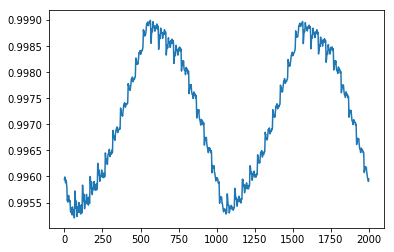

In [26]:
plt.plot(range(len(arr)),arr)